# STEP 1: Import The Following Relevant Scientific and Computational Libraries for Data Manipulation, Modelling, Interpretation, Visualization ETC.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.layers import Lambda, Input, Dense, Embedding, multiply, Flatten, Concatenate
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.losses import mse, binary_crossentropy
from tensorflow.keras.optimizers import Adam
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras import backend as K
import tensorflow as tf
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import StandardScaler

# STEP 2A: DATA EXPLORATORY

In [2]:
# Assuming your DataFrame is named lowerBackPains_df
# print(cardio_df.describe())

# Load your dataset
# lowerBackPains_df = pd.read_csv('path_to_your_dataset.csv')

# Plotting histograms for each feature
# cardio_df.hist(bins=15, figsize=(15, 10))
# plt.show()

# Count plot for the target variable
# sns.countplot(x='cardio', data=cardio_df)
# plt.title('Distribution of Target Variable')
# plt.show()

# Heatmap of correlations
# plt.figure(figsize=(12, 8))
# sns.heatmap(cardio_df.corr(), annot=True, fmt=".2f")
# plt.title('Correlation Heatmap')
# plt.show()

# Pairplot to visualize relationships between features
# Note: This can be resource-intensive for large datasets
# sns.pairplot(cardio_df, hue='cardio')
# plt.show()



In [3]:
# Assuming you have loaded your dataset into a DataFrame named lowerBackPains_df
# lowerBackPains_df = pd.read_csv('path_to_your_dataset.csv')

# Separate the features and the target variable
# X = lowerBackPains_df.drop('cardio', axis=1)
# y = lowerBackPains_df['cardio']

# It's a good practice to scale your features, especially when using algorithms that are distance-based
# scaler = StandardScaler()
# X_scaled = scaler.fit_transform(X)

# Split the data into training and testing sets
# X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

# Apply SMOTE only to training data to avoid information leakage into the test set
# smote = SMOTE(random_state=42)
# X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

# Check the class distribution after applying SMOTE
# print("Class distribution after SMOTE:")
# print(pd.Series(y_train_smote).value_counts())


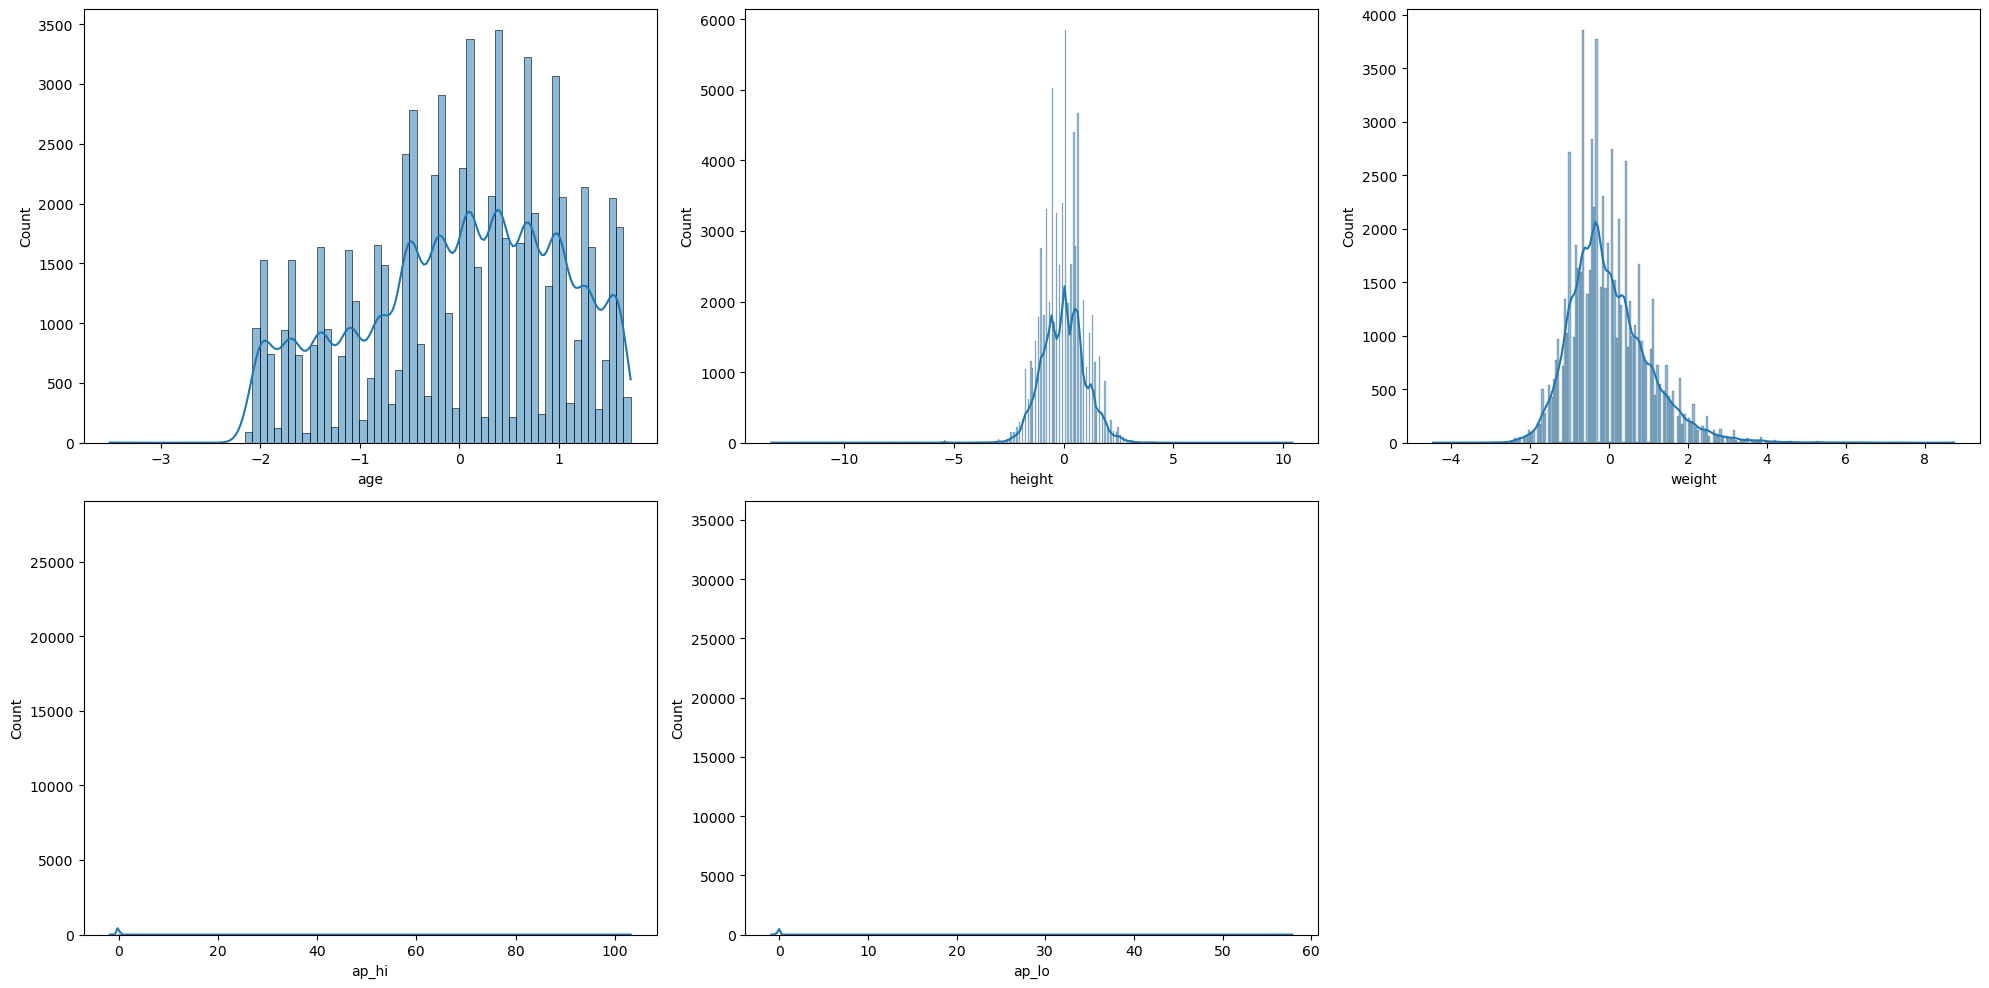

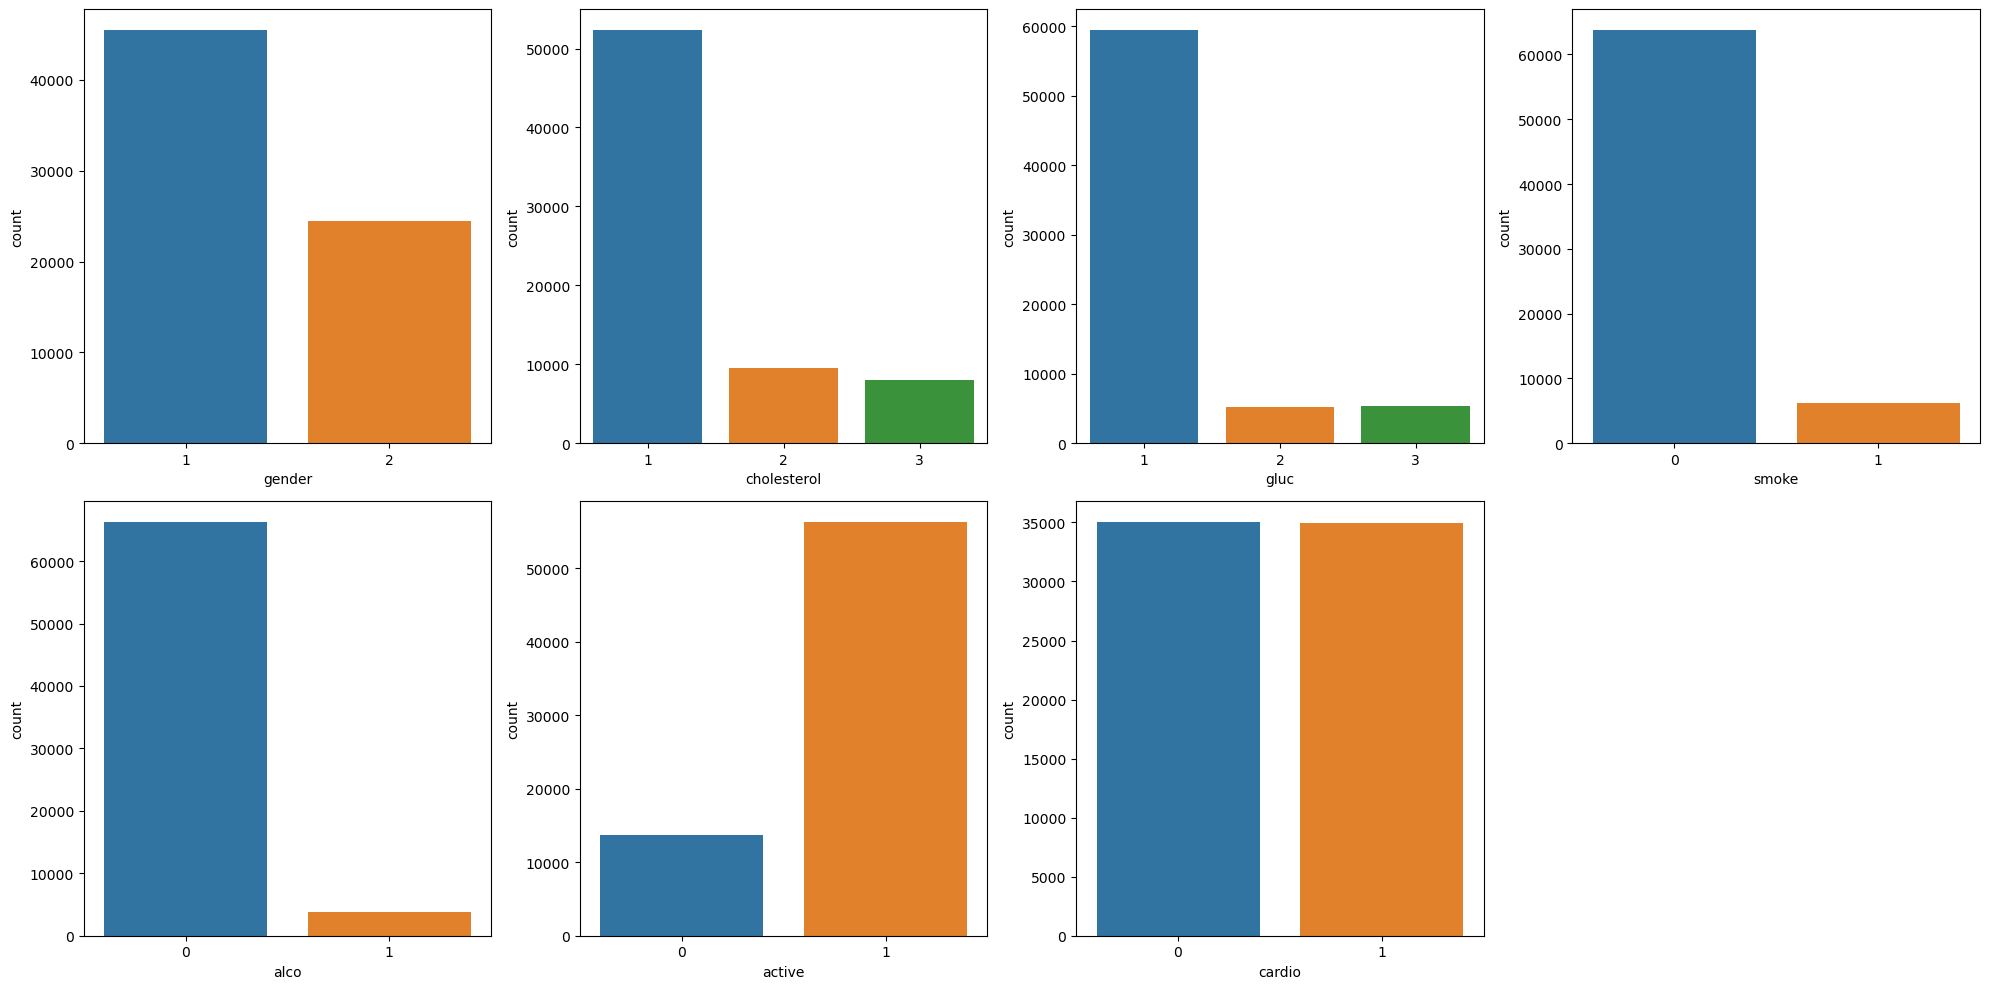

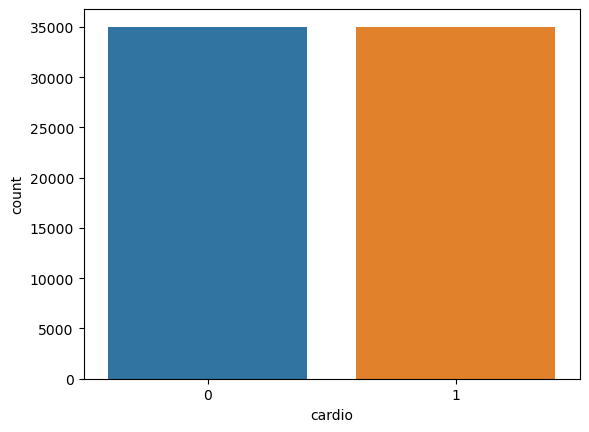

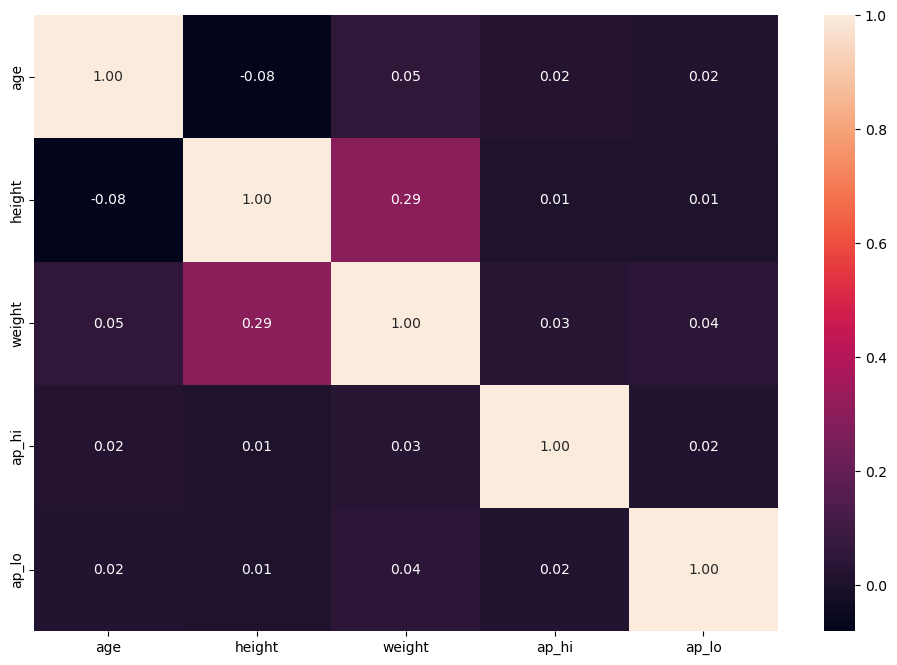

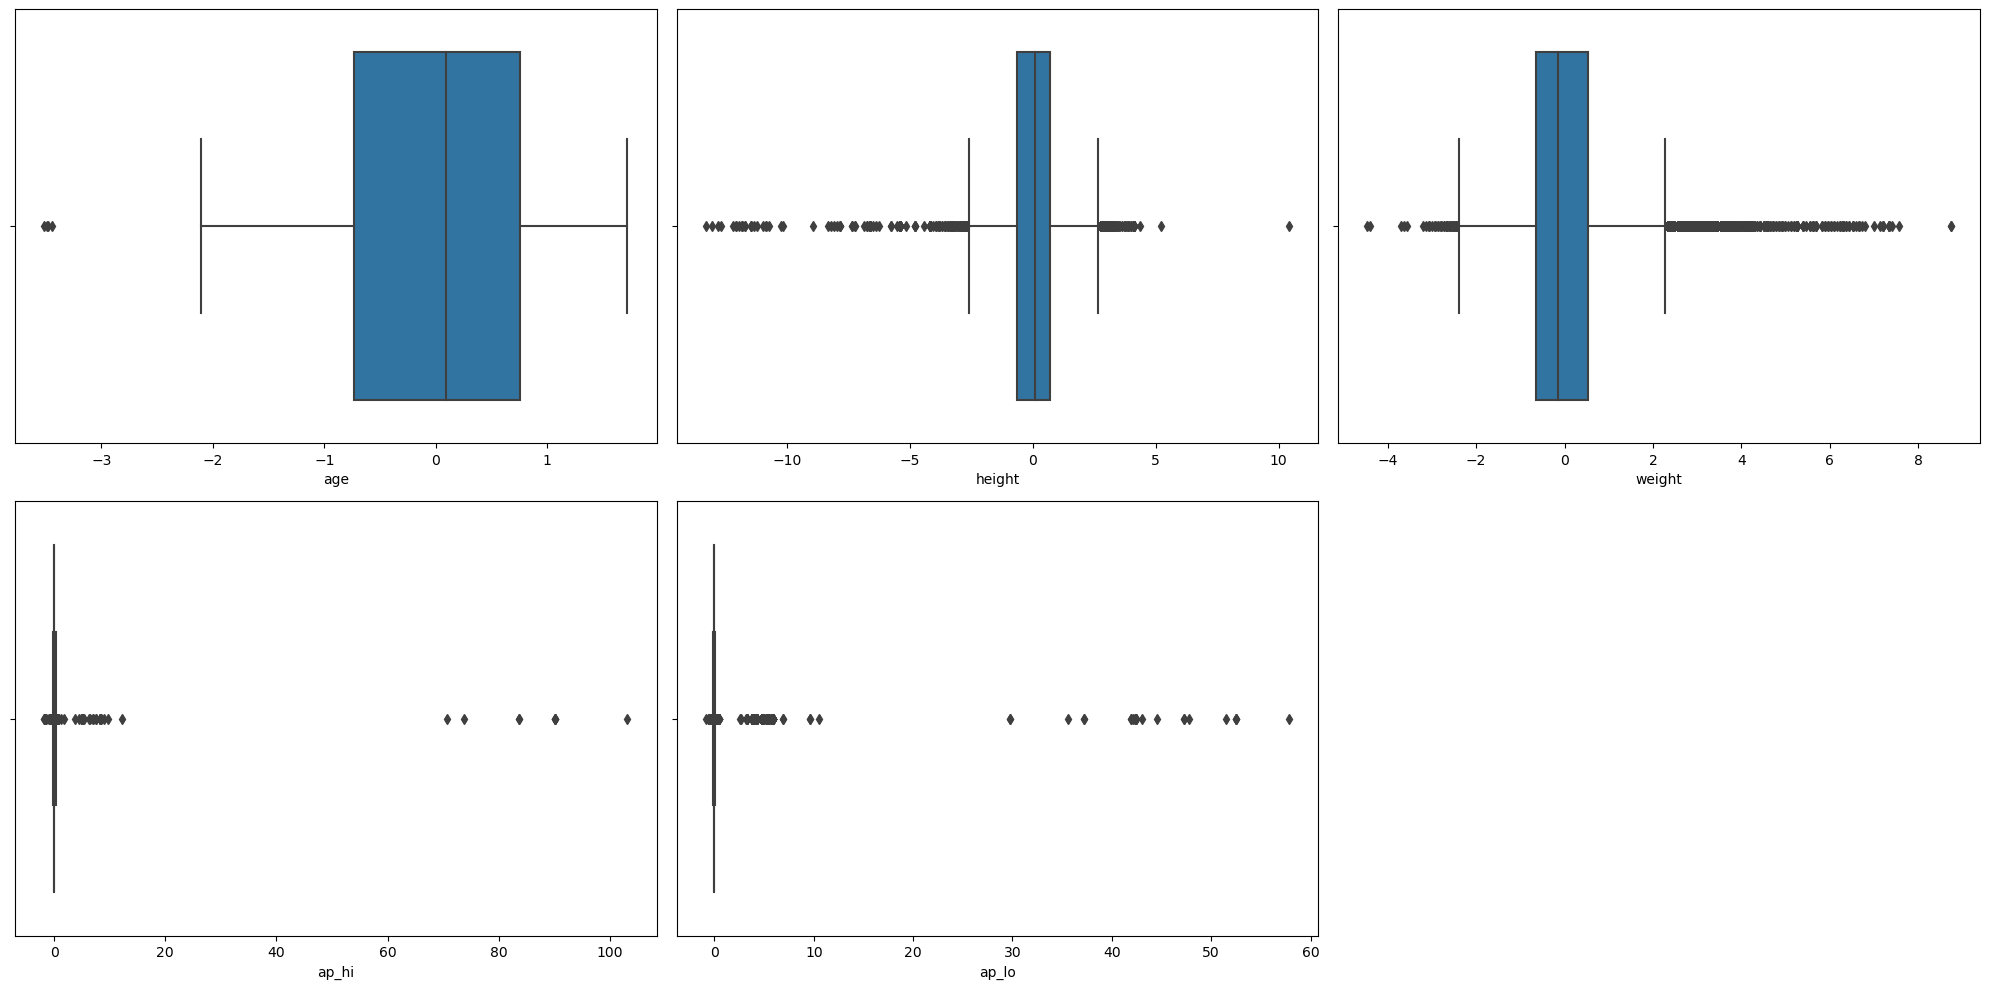

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
cardio_df = pd.read_csv('C:\\Users\\Ede\\Desktop\\Synthetic_Real_Data_Using_AE_VAE_Techniques\\master_thesis2024\\cardio.csv')
# lowerBackPains_Data_Path = 'C:\\Users\\Ede\\Desktop\\Synthetic_Real_Data_Using_AE_VAE_Techniques\\cardio.csv'
# Data Preprocessing

## Convert age from days to years
cardio_df['age'] = cardio_df['age'] / 365

## Convert certain features to categorical types if necessary
categorical_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
cardio_df[categorical_cols] = cardio_df[categorical_cols].astype('category')

## Feature Scaling
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
cardio_df[scaled_cols] = scaler.fit_transform(cardio_df[scaled_cols])

# Exploratory Data Analysis

## Distribution of each feature
plt.figure(figsize=(20, 10))
for i, col in enumerate(scaled_cols):
    plt.subplot(2, 3, i+1)
    sns.histplot(cardio_df[col], kde=True)
plt.tight_layout()
plt.show()

## Distribution of categorical features
plt.figure(figsize=(20, 10))
for i, col in enumerate(categorical_cols):
    plt.subplot(2, 4, i+1)
    sns.countplot(x=col, data=cardio_df)
plt.tight_layout()
plt.show()

## Target variable analysis
sns.countplot(x='cardio', data=cardio_df)
plt.show()

## Correlation analysis
plt.figure(figsize=(12, 8))
sns.heatmap(cardio_df.corr(), annot=True, fmt=".2f")
plt.show()

## Outliers identification
plt.figure(figsize=(20, 10))
for i, col in enumerate(scaled_cols):
    plt.subplot(2, 3, i+1)
    sns.boxplot(x=cardio_df[col])
plt.tight_layout()
plt.show()


Statistical Summary for ap_hi and ap_lo:
              ap_hi         ap_lo
count  7.000000e+04  7.000000e+04
mean  -1.518658e-15 -7.473280e-16
std    1.000007e+00  1.000007e+00
min   -1.810381e+00 -8.841161e-01
25%   -5.725127e-02 -8.823850e-02
50%   -5.725127e-02 -8.823850e-02
75%    7.261016e-02 -3.517999e-02
max    1.031826e+02  5.785165e+01
Unique values in ap_hi: [-1.22181980e-01  7.26101623e-02  7.67944830e-03  1.37540876e-01
 -1.87112694e-01 -5.72512657e-02  1.05075519e-01  2.67402304e-01
  4.01448053e-02 -2.47859087e-02 -2.52043408e-01  3.32333018e-01
  2.02471590e-01  2.71586625e-02  3.97263732e-01 -3.16974122e-01
 -4.42651229e-02  2.60909233e-01 -1.82928373e-02  1.89485448e-01
  4.62194446e-01 -7.45516834e-01 -3.77720515e-02 -3.81904836e-01
  2.08964662e-01  1.18061662e-01 -8.97166227e-02  5.31309481e-02
  1.57020091e-01 -7.64996048e-01  1.24554734e-01 -1.54647337e-01
  5.92055874e-01 -6.37443371e-02  7.91032337e-02  2.34936947e-01
  2.28443876e-01 -7.58502977e-01 -3.12789801

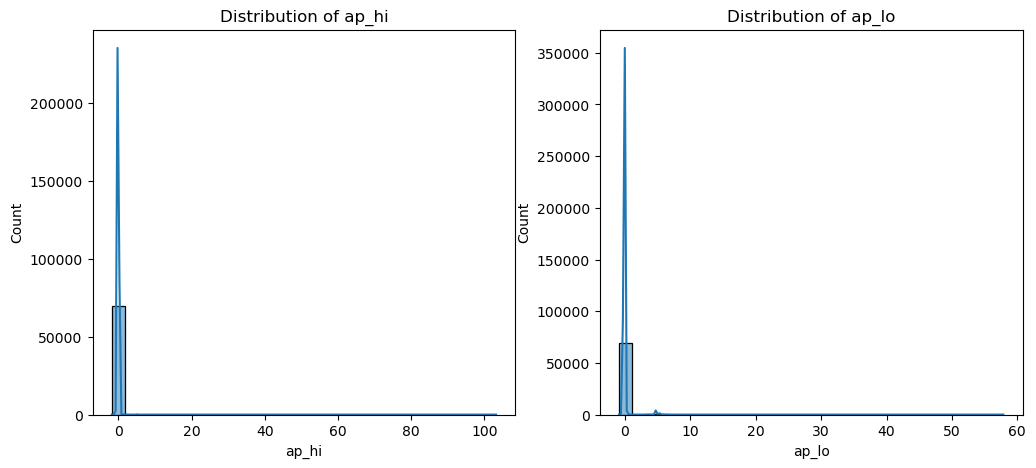

C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


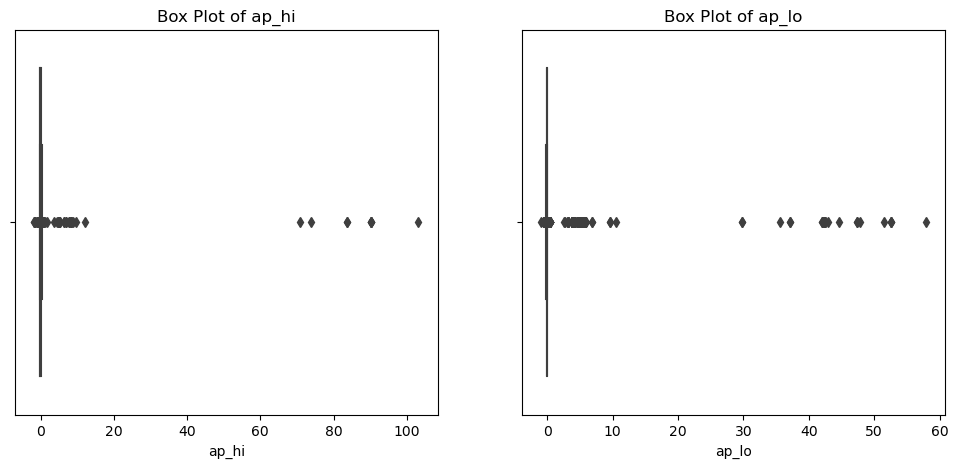

Value counts for ap_hi:
-0.057251    27699
 0.072610     9506
 0.007679     8961
-0.122182     8644
 0.137541     4450
 0.202472     3036
-0.187113     2581
-0.252043      982
 0.267402      717
 0.332333      695
Name: ap_hi, dtype: int64

Value counts for ap_lo:
-0.088238    34847
-0.035180    14316
-0.141297    10245
 0.017879     4082
-0.194356     2727
 4.793144      666
 0.070937      401
-0.093544      357
-0.061709      290
-0.114768      211
Name: ap_lo, dtype: int64


In [3]:
# Step 1: Basic Statistical Summary
# First, let's look at the basic statistical summary of these features to understand their range, mean, standard deviation, etc.
print("Statistical Summary for ap_hi and ap_lo:")
print(cardio_df[['ap_hi', 'ap_lo']].describe())

# Step 2: Checking for Unique Values
# It's helpful to see the unique values these features hold. This can give us insights into any potential erroneous data entries.
print("Unique values in ap_hi:", cardio_df['ap_hi'].unique())
print("Unique values in ap_lo:", cardio_df['ap_lo'].unique())

# Step 3: Visualizing Distribution
# Visualizing the distribution of these features can help us understand their spread and detect any anomalies.
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting histograms for ap_hi and ap_lo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(cardio_df['ap_hi'], kde=True, bins=30)
plt.title('Distribution of ap_hi')

plt.subplot(1, 2, 2)
sns.histplot(cardio_df['ap_lo'], kde=True, bins=30)
plt.title('Distribution of ap_lo')
plt.show()

# Step 4: Identifying Outliers
# Box plots can be effective in visualizing outliers.

# Box plots for ap_hi and ap_lo
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(cardio_df['ap_hi'])
plt.title('Box Plot of ap_hi')

plt.subplot(1, 2, 2)
sns.boxplot(cardio_df['ap_lo'])
plt.title('Box Plot of ap_lo')
plt.show()

# Step 5: Checking Value Counts
# Understanding the frequency of different values can reveal any data entry issues.
print("Value counts for ap_hi:")
print(cardio_df['ap_hi'].value_counts().head(10)) # Displaying top 10 most frequent values

print("\nValue counts for ap_lo:")
print(cardio_df['ap_lo'].value_counts().head(10)) # Displaying top 10 most frequent values

# These steps will provide a comprehensive overview of the ap_hi and ap_lo features,
# allowing us to decide if any data cleaning, transformation, or scaling is necessary.
# Keep in mind that the range of normal blood pressure values is well established in medical literature,
# and any significant deviation might indicate data quality issues.

Extreme values in ap_hi: []
Extreme values in ap_lo: []


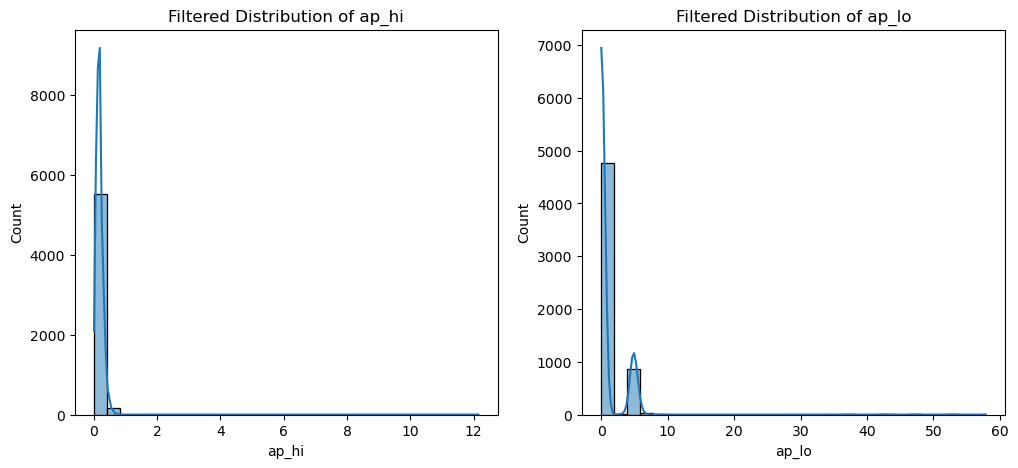

C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


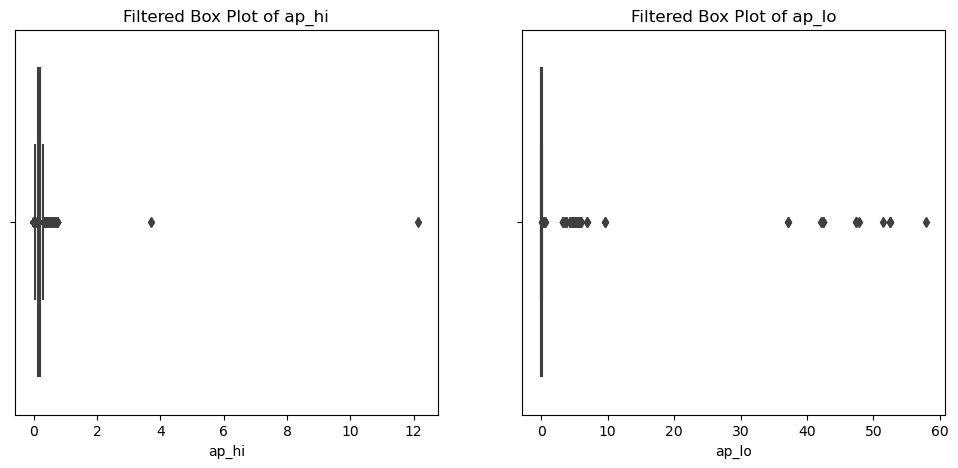

Statistical Summary for Filtered ap_hi and ap_lo:
             ap_hi        ap_lo
count  5681.000000  5681.000000
mean      0.184894     0.928102
std       0.196201     2.964357
min       0.007679     0.001961
25%       0.137541     0.017879
50%       0.202472     0.017879
75%       0.202472     0.070937
max      12.149723    57.851653


In [4]:
# Step 1: Identifying Extreme Values
# First, identify extreme values that are biologically implausible for blood pressure readings.
print("Extreme values in ap_hi:", cardio_df[cardio_df['ap_hi'] > 200]['ap_hi'].unique())
print("Extreme values in ap_lo:", cardio_df[cardio_df['ap_lo'] > 200]['ap_lo'].unique())

# Step 2: Filtering the Data
# Consider removing values that are physiologically impossible (e.g., systolic blood pressure above 200 mmHg or diastolic blood pressure above 120 mmHg).
filtered_df = cardio_df[(cardio_df['ap_hi'] > 0) & (cardio_df['ap_hi'] <= 200) & 
                        (cardio_df['ap_lo'] > 0) & (cardio_df['ap_lo'] <= 120)]

# Step 3: Re-evaluating the Distribution
# After filtering, re-examine the distribution of these features.
# Plotting histograms for ap_hi and ap_lo after filtering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.histplot(filtered_df['ap_hi'], kde=True, bins=30)
plt.title('Filtered Distribution of ap_hi')

plt.subplot(1, 2, 2)
sns.histplot(filtered_df['ap_lo'], kde=True, bins=30)
plt.title('Filtered Distribution of ap_lo')
plt.show()

# Step 4: Re-visualizing Outliers
# Check the box plots again after filtering to see if the distribution appears more normal.
# Box plots for ap_hi and ap_lo after filtering
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
sns.boxplot(filtered_df['ap_hi'])
plt.title('Filtered Box Plot of ap_hi')

plt.subplot(1, 2, 2)
sns.boxplot(filtered_df['ap_lo'])
plt.title('Filtered Box Plot of ap_lo')
plt.show()

# Step 5: Re-assessing the Statistical Summary
# Finally, look at the statistical summary of the filtered data.
print("Statistical Summary for Filtered ap_hi and ap_lo:")
print(filtered_df[['ap_hi', 'ap_lo']].describe())

# These steps should help in understanding the distribution of ap_hi and ap_lo better and ensuring that the values are within a reasonable range for blood pressure readings.
# It's crucial in data preprocessing to ensure that the data you're working with is accurate and reflective of real-world measurements, especially in healthcare-related datasets.
#
#

Extreme values in ap_hi: [  5.02033057   5.04630285   5.06578207  73.83390127   8.38374155
   3.71522322   8.90318727   5.05279593  90.19644119   8.25388013
   9.68235583   6.50075085 103.18258399   6.96825199   4.39699571
   7.60457299   8.31231777  70.71722699   5.39692871  83.63843908
   6.37088942   6.9877312   12.14972297]
Extreme values in ap_lo: [ 5.32372941  4.79314432  3.73197414  4.9682374   4.79845017  5.8543145
 52.54580235 42.167558    5.02660176 47.77053654  4.27317093  4.83559113
 10.56591009  3.74258585 41.93410056  4.90987304  3.99726669  3.24383586
 47.29831582  4.85150868  4.83028528  5.73227993 37.15883476  3.24914171
 44.58702601  5.37678792 42.4593798   5.2600592   5.20169484  5.42984643
  5.45637568 42.46468565  3.25444756 29.73064351 42.35326278  5.38209377
  4.80906187  9.56841012  3.7797268   3.73727999  4.80375602  3.78503265
 37.15352891 57.85165324 51.48463217 42.99527074  5.5306576   3.83809116
  6.91548468  4.26255923 35.56707949  3.20138905  5.32903526  

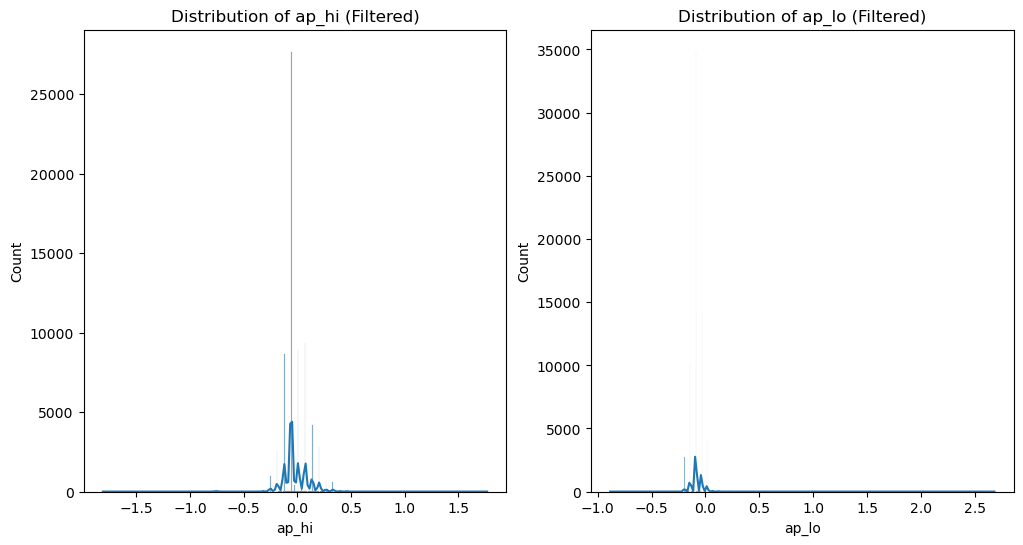

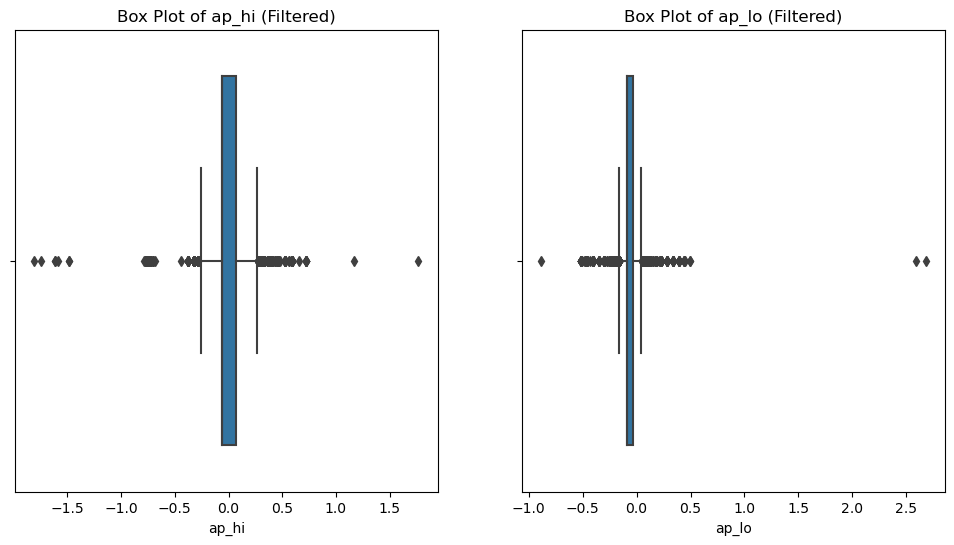

Statistical Summary for Filtered ap_hi and ap_lo:
              ap_hi         ap_lo
count  69011.000000  69011.000000
mean      -0.016340     -0.081101
std        0.116459      0.054497
min       -1.810381     -0.884116
25%       -0.057251     -0.088238
50%       -0.057251     -0.088238
75%        0.072610     -0.035180
max        1.767302      2.681416


In [5]:
# Step 3: Investigate Extreme Values
# Examine the extreme values more closely to understand their impact on the data. 
# Look for values that are several standard deviations away from the mean.
# Identifying extreme values in ap_hi and ap_lo
extreme_values_ap_hi = cardio_df[cardio_df['ap_hi'] > 3]['ap_hi']
extreme_values_ap_lo = cardio_df[cardio_df['ap_lo'] > 3]['ap_lo']

print("Extreme values in ap_hi:", extreme_values_ap_hi.unique())
print("Extreme values in ap_lo:", extreme_values_ap_lo.unique())


# Step 4: Visualizing Distributions with Extreme Values Removed
# If the extreme values are not biologically plausible, 
# consider removing them and re-plotting the distributions.
# Filter out extreme values
filtered_cardio_df = cardio_df[(cardio_df['ap_hi'] <= 3) & (cardio_df['ap_lo'] <= 3)]

# Re-plot histograms
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.histplot(filtered_cardio_df['ap_hi'], kde=True)
plt.title('Distribution of ap_hi (Filtered)')

plt.subplot(1, 2, 2)
sns.histplot(filtered_cardio_df['ap_lo'], kde=True)
plt.title('Distribution of ap_lo (Filtered)')
plt.show()

# Step 5: Box Plot Analysis (Post-filtering)
# After filtering, re-examine the box plots to check for outliers.
# Box plots after filtering
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x=filtered_cardio_df['ap_hi'])
plt.title('Box Plot of ap_hi (Filtered)')

plt.subplot(1, 2, 2)
sns.boxplot(x=filtered_cardio_df['ap_lo'])
plt.title('Box Plot of ap_lo (Filtered)')
plt.show()

# Step 6: Reassess Statistical Summary
# Finally, reassess the statistical summary of these features after the adjustments.
print("Statistical Summary for Filtered ap_hi and ap_lo:")
print(filtered_cardio_df[['ap_hi', 'ap_lo']].describe())

# These steps should provide a clearer understanding of the ap_hi and ap_lo features, ensuring that their distributions are more representative of typical blood pressure readings.
# This analysis is crucial, especially in a healthcare context, where accurate and realistic data are vital for meaningful insights.
#

# RE-DATA VISUALIZING AFTER REMOVING OUTLIERS

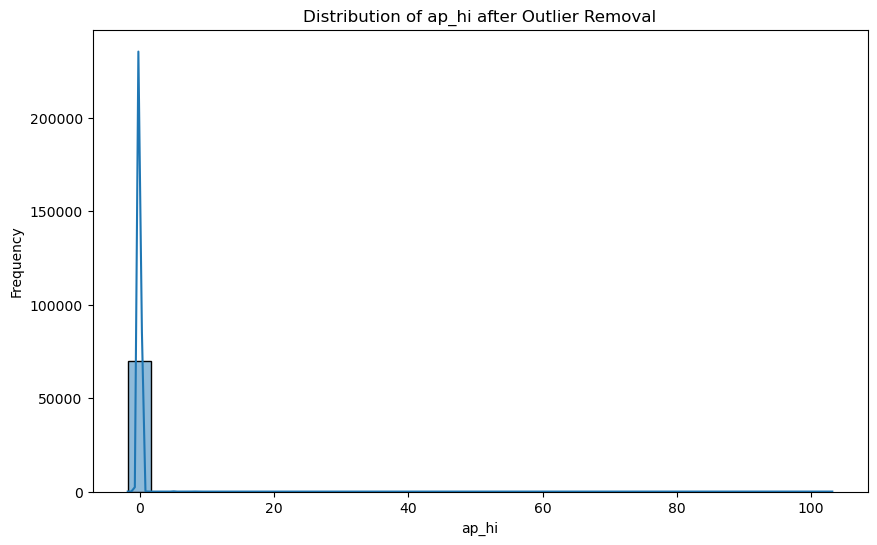

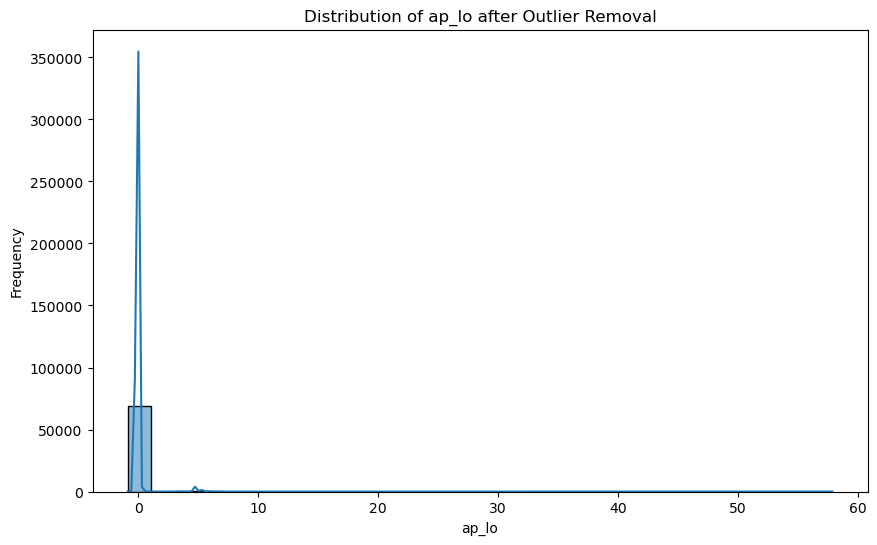

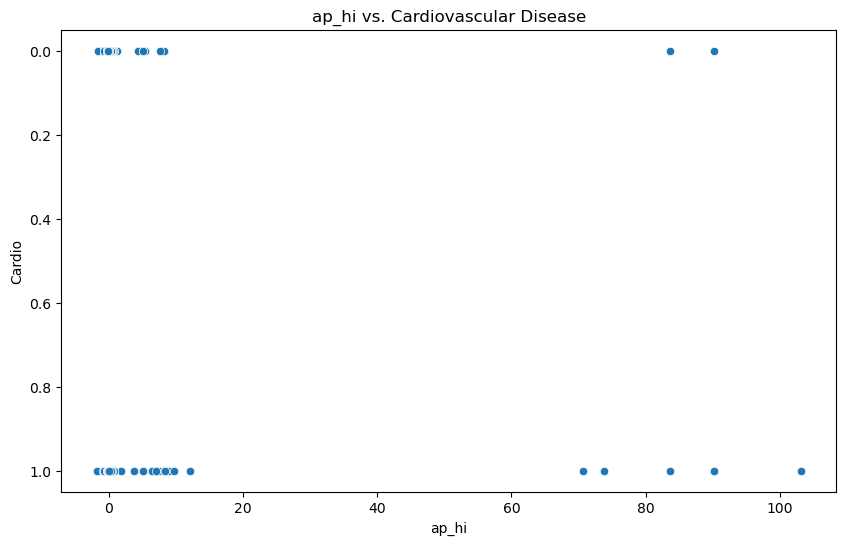

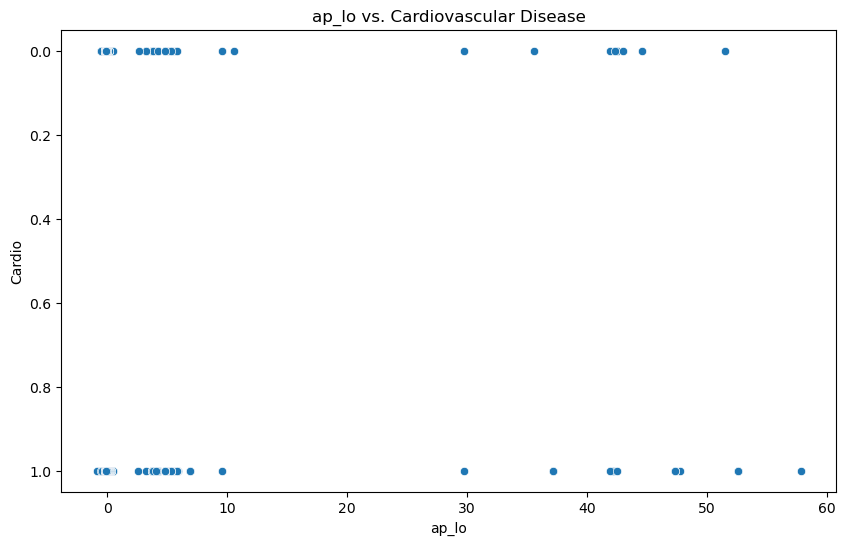

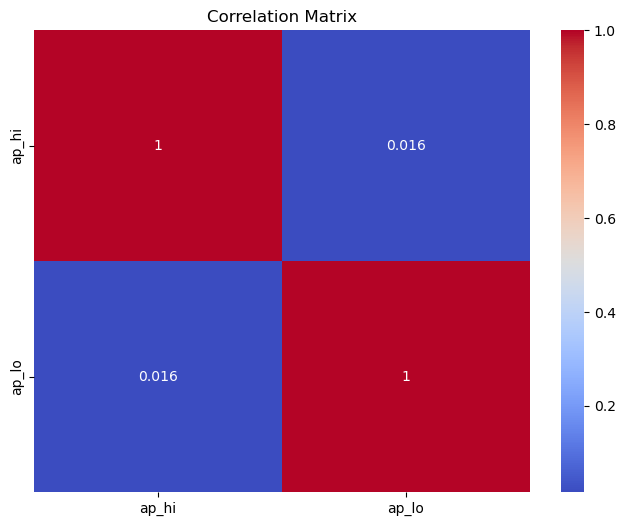

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming cardio_df is your DataFrame after outlier removal

# 1. Data Visualization

# Histogram for ap_hi
plt.figure(figsize=(10, 6))
sns.histplot(cardio_df['ap_hi'], bins=30, kde=True)
plt.title('Distribution of ap_hi after Outlier Removal')
plt.xlabel('ap_hi')
plt.ylabel('Frequency')
plt.show()

# Histogram for ap_lo
plt.figure(figsize=(10, 6))
sns.histplot(cardio_df['ap_lo'], bins=30, kde=True)
plt.title('Distribution of ap_lo after Outlier Removal')
plt.xlabel('ap_lo')
plt.ylabel('Frequency')
plt.show()

# 2. Relationship Analysis

# Scatter plot for ap_hi vs. cardio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_hi', y='cardio', data=cardio_df)
plt.title('ap_hi vs. Cardiovascular Disease')
plt.xlabel('ap_hi')
plt.ylabel('Cardio')
plt.show()

# Scatter plot for ap_lo vs. cardio
plt.figure(figsize=(10, 6))
sns.scatterplot(x='ap_lo', y='cardio', data=cardio_df)
plt.title('ap_lo vs. Cardiovascular Disease')
plt.xlabel('ap_lo')
plt.ylabel('Cardio')
plt.show()

# Correlation analysis
correlation_matrix = cardio_df[['ap_hi', 'ap_lo', 'cardio']].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


# STEP 2B: DATA  PREPARATION AND PREPROCESSING

In [9]:
# Data Normalization
# from sklearn.preprocessing import StandardScaler

# Columns to normalize
# columns_to_normalize = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']

# Standard Scaler for normalization
# scaler = StandardScaler()

# Apply normalization on the dataset
# cardio_df[columns_to_normalize] = scaler.fit_transform(cardio_df[columns_to_normalize])

#  Splitting the Dataset
# We'll split the dataset into a training set and a testing set.
# from sklearn.model_selection import train_test_split

# Splitting the dataset into training and testing sets
# X_train2, X_test2 = train_test_split(cardio_df, test_size=0.2, random_state=42)

# Confirm the shape of X_train and X_test
# print("Shape of X_train2:", X_train2.shape)  # Should be (samples, 12)
# print("Shape of X_test2:", X_test2.shape)  # Should be (samples, 12)

In [7]:
cardio_df.head()

age gender    height    weight     ap_hi     ap_lo cholesterol gluc  \
0 -0.436062      2  0.443452 -0.847873 -0.122182 -0.088238           1    1   
1  0.307686      1 -1.018168  0.749831  0.072610 -0.035180           3    1   
2 -0.247997      1  0.078047 -0.708942  0.007679 -0.141297           3    1   
3 -0.748152      2  0.565254  0.541435  0.137541  0.017879           1    1   
4 -0.808543      1 -1.018168 -1.264666 -0.187113 -0.194356           1    1   

  smoke alco active cardio  
0     0    0      1      0  
1     0    0      1      1  
2     0    0      0      1  
3     0    0      1      1  
4     0    0      0      0

In [8]:
cardio_df.tail()

age gender    height    weight     ap_hi     ap_lo cholesterol  \
69995 -0.092762      2  0.443452  0.124642 -0.057251 -0.088238           1   
69996  1.269492      1 -0.774565  3.597913  0.072610 -0.035180           2   
69997 -0.163286      2  2.270477  2.139139  0.332333 -0.035180           3   
69998  1.200589      1 -0.165556 -0.153219  0.040145 -0.088238           1   
69999  0.434144      1  0.687055 -0.153219 -0.057251 -0.088238           2   

      gluc smoke alco active cardio  
69995    1     1    0      1      0  
69996    2     0    0      1      1  
69997    1     0    1      0      1  
69998    2     0    0      0      1  
69999    1     0    0      1      0

In [9]:
# Check for missing values
cardio_df.isnull().sum()

age            0
gender         0
height         0
weight         0
ap_hi          0
ap_lo          0
cholesterol    0
gluc           0
smoke          0
alco           0
active         0
cardio         0
dtype: int64

In [10]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = cardio_df['cardio'].value_counts()
total_counts = len(cardio_df)

# Calculate class percentages
class_percentages = (class_counts / total_counts) * 100

# Print class percentages
print("Class Percentages:")
print(class_percentages)

# Check if the data is imbalanced
if abs(class_percentages[0] - class_percentages[1]) > 20:  # You can adjust this threshold
    print("\nThe dataset is imbalanced.")
else:
    print("\nThe dataset is balanced.")

Class Percentages:
0    50.03
1    49.97
Name: cardio, dtype: float64

The dataset is balanced.


In [11]:
print('==============100% of Cardiovascular Disease (Original Dataset)===========')
cardio_df.info()

==============100% of Cardiovascular Disease (Original Dataset)===========
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          70000 non-null  float64 
 1   gender       70000 non-null  category
 2   height       70000 non-null  float64 
 3   weight       70000 non-null  float64 
 4   ap_hi        70000 non-null  float64 
 5   ap_lo        70000 non-null  float64 
 6   cholesterol  70000 non-null  category
 7   gluc         70000 non-null  category
 8   smoke        70000 non-null  category
 9   alco         70000 non-null  category
 10  active       70000 non-null  category
 11  cardio       70000 non-null  category
dtypes: category(7), float64(5)
memory usage: 3.1 MB


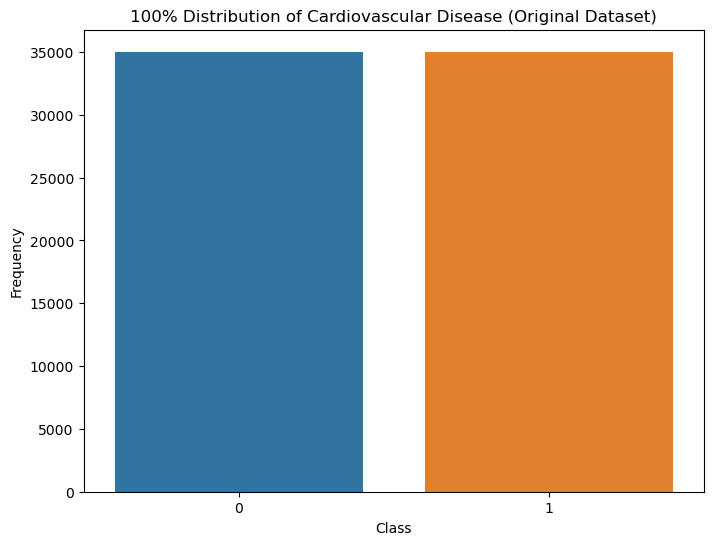

In [13]:
# Assuming 'Class_att' is your target column
class_counts = cardio_df['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('100% Distribution of Cardiovascular Disease (Original Dataset)')
plt.show()

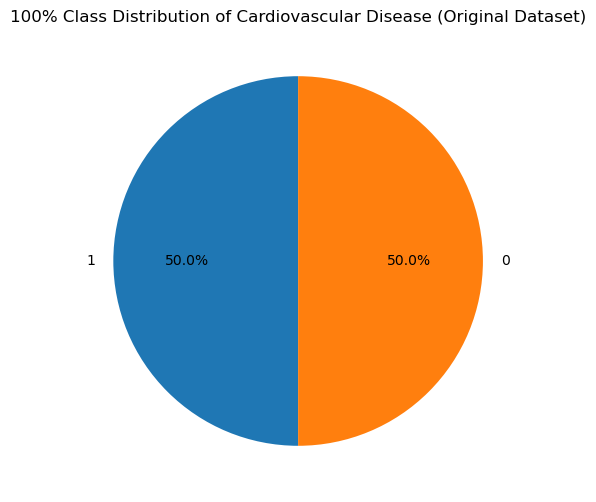

In [67]:
import matplotlib.pyplot as plt

# Assuming 'cardio' is your target column and we have these counts
class_counts = {"1": 35000, "0": 35000}

# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts.values(), labels=class_counts.keys(), autopct='%1.1f%%', startangle=90)
plt.title('100% Class Distribution of Cardiovascular Disease (Original Dataset)')
plt.show()


# Preamble

Prior to synthetic data generation, data preprocessing steps were meticulously applied to each dataset, ensuring data cleanliness, normalization, and partitioning into the said two main component data. The original dataset, comprising 80% of the total data, served as the foundation for generating synthetic data. In contrast, the remaining 20%, referred to as control data, was reserved for evaluating both the privacy risks associated with the synthetic dataset and the utility as well.

# Ensuring Privacy Preservation and Data Utility
1. Privacy Preservation: By using an autoencoder to generate synthetic data, we minimize the risk of exposing original data entries. The classifier's role is solely to provide labels for synthetic instances, further abstracting the process from direct data duplication.

2. Data Utility: The utility of the synthetic data is maintained through the autoencoder's ability to capture and replicate the complex relationships in the original data. The trained classifier ensures that synthetic data receives labels that are consistent with the learned patterns, making the synthetic dataset useful for downstream tasks.


# Purpose of the Control Dataset
1. Benchmarking Privacy Leakage: The control dataset (control_data_df) is used to differentiate what an attacker learns purely from the synthetic dataset's utility versus what constitutes an actual privacy leak. By comparing the success of attacks on the control dataset against those on the original dataset, one can more accurately assess the extent of privacy risk.

2. Ensuring Fair Evaluation: It ensures that the assessment accounts for the possibility that the synthetic dataset might inadvertently reveal specific patterns or information that could lead to re-identification or information inference not due to the inherent utility of the synthetic data but due to direct data leakage.

# Creating a Control Dataset
The control dataset should consist of records that are not included in the synthetic dataset's generation process. Here's how to create or obtain a control dataset:

1. Splitting Original Data: Before generating your synthetic dataset, split your original dataset into two parts. One part is used to generate the synthetic dataset (original_data_df), and the other part serves as the control dataset (control_data_df). This way, the control dataset contains real data points that were not used to train the model creating the synthetic data, ensuring they share similar distributions without direct overlaps.



# Anonymeter Tool
Anonymeter’s development as an open-source tool underlines Anonos’s commitment to enhancing privacy technologies’ accessibility. It is crafted to be adaptable, ensuring it remains relevant amid evolving privacy regulations and research advancements. The Anonymeter framework plays a pivotal role in the field of synthetic data by providing a structured approach to evaluate and mitigate privacy risks. By assessing singling-out, linkability, and inference risks, Anonymeter helps researchers and practitioners balance the trade-offs between maintaining data utility and ensuring privacy. This is particularly relevant in the era of big data and machine learning, where the use of synthetic data is becoming increasingly prevalent. For more information on this tool, including its installation and configurations, do visit their website and github via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter


# Partioning the Original Data into 80% and 20% respectiively as shown below

In [12]:
cardiovascular_train_dataframe, control_cardio_dataframe = train_test_split(cardio_df, test_size=0.2, random_state=42)

In [13]:
cardiovascular_train_dataframe.head()

age gender    height    weight     ap_hi     ap_lo cholesterol  \
47339  0.975641      1 -1.261771  0.402504  0.007679 -0.035180           2   
67456 -1.115365      2 -0.287358 -0.292150  0.072610 -0.035180           1   
12308  0.672467      2  1.174262  1.236089  0.137541  0.017879           1   
32557  1.579556      2  1.052460  0.124642 -0.057251 -0.077627           1   
664    0.329168      1 -0.530961 -0.986804 -0.057251 -0.088238           1   

      gluc smoke alco active cardio  
47339    1     0    0      1      1  
67456    1     0    0      0      1  
12308    1     0    0      1      1  
32557    1     0    0      1      1  
664      1     0    0      1      0

In [14]:
cardiovascular_train_dataframe.tail()

age gender    height    weight     ap_hi     ap_lo cholesterol  \
37194 -1.405568      2  0.687055  0.055177  0.137541 -0.088238           1   
6265   1.515922      2 -0.287358 -0.083754  0.202472 -0.035180           1   
54886  1.669941      1  0.565254 -0.014288 -0.057251 -0.088238           1   
860   -0.503343      1  0.321650 -0.292150 -0.057251 -0.088238           1   
15795 -1.765080      2  1.539667 -0.708942 -0.057251 -0.088238           1   

      gluc smoke alco active cardio  
37194    1     1    0      1      1  
6265     1     0    0      1      1  
54886    1     0    0      1      0  
860      1     0    0      0      0  
15795    1     0    0      1      0

In [15]:
control_cardio_dataframe.head()

age gender    height    weight     ap_hi     ap_lo cholesterol  \
46730  0.932678      1 -1.018168 -0.708942  0.072610 -0.088238           2   
48393  0.975641      1  0.687055  0.749831  0.202472 -0.035180           1   
41416  1.540646      1 -1.627176  1.097158  0.007679 -0.088238           1   
34506  0.110299      1 -0.652763  1.583416 -0.057251 -0.088238           1   
43725 -0.435251      1 -0.043755 -0.431081 -0.057251 -0.088238           1   

      gluc smoke alco active cardio  
46730    1     0    0      1      1  
48393    1     0    0      1      1  
41416    1     0    0      1      1  
34506    1     0    0      1      1  
43725    1     0    0      1      0

In [16]:
# Assuming 'Class_att' is your target column with binary classes 0 and 1
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()
total_counts = len(cardiovascular_train_dataframe)
print(total_counts) 

56000


In [17]:
# Verify encoding
cardiovascular_train_dataframe['cardio'].head()

47339    1
67456    1
12308    1
32557    1
664      0
Name: cardio, dtype: category
Categories (2, int64): [0, 1]

In [18]:
cardiovascular_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 2.9 MB


In [19]:
control_cardio_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46730 to 63452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          14000 non-null  float64 
 1   gender       14000 non-null  category
 2   height       14000 non-null  float64 
 3   weight       14000 non-null  float64 
 4   ap_hi        14000 non-null  float64 
 5   ap_lo        14000 non-null  float64 
 6   cholesterol  14000 non-null  category
 7   gluc         14000 non-null  category
 8   smoke        14000 non-null  category
 9   alco         14000 non-null  category
 10  active       14000 non-null  category
 11  cardio       14000 non-null  category
dtypes: category(7), float64(5)
memory usage: 752.8 KB


In [20]:
# Verify encoding
control_cardio_dataframe['cardio'].head()

46730    1
48393    1
41416    1
34506    1
43725    0
Name: cardio, dtype: category
Categories (2, int64): [0, 1]

# SAVING THE PARTITIONED DATASETS TO CSV FOR FUTURE USE

In [21]:
control_cardio_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\control_cardio_dataframe.csv', index=False)

In [22]:
cardiovascular_train_dataframe.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\cardiovascular_train_dataframe.csv', index=False)

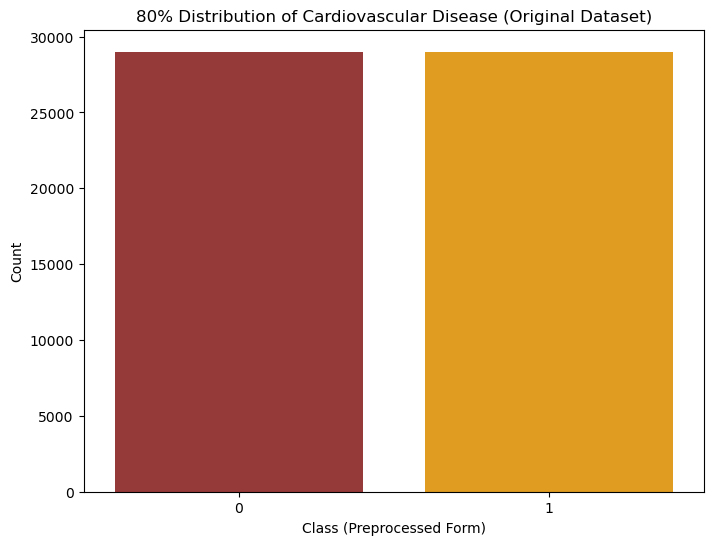

In [74]:
# Re-importing necessary libraries and recreating the plot with custom colors after code execution state reset
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'Class_att' is your target column and using custom colors for the bar graph
class_counts1 = {'0': 29000, '1': 29000}  # Example class counts for cardiovascular disease

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_counts1.keys()), y=list(class_counts1.values()), palette=['brown', 'orange'])
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('80% Distribution of Cardiovascular Disease (Original Dataset)')
plt.show()


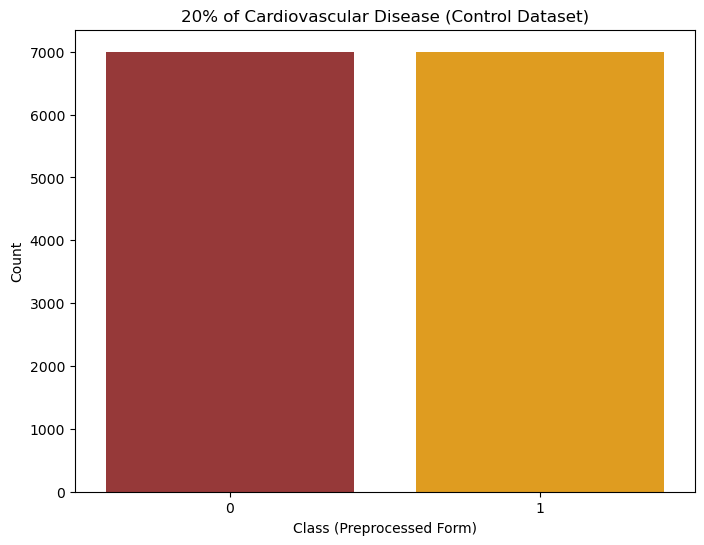

In [75]:
# Re-importing necessary libraries and recreating the plot with custom colors after code execution state reset
import matplotlib.pyplot as plt
import seaborn as sns

# Sample data for demonstration purposes
class_counts3 = {"0": 7000, "1": 7000}

# Create a bar plot with custom colors
plt.figure(figsize=(8, 6))
sns.barplot(x=list(class_counts3.keys()), y=list(class_counts3.values()), palette=['brown', 'orange'])
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('20% of Cardiovascular Disease (Control Dataset)')
plt.show()


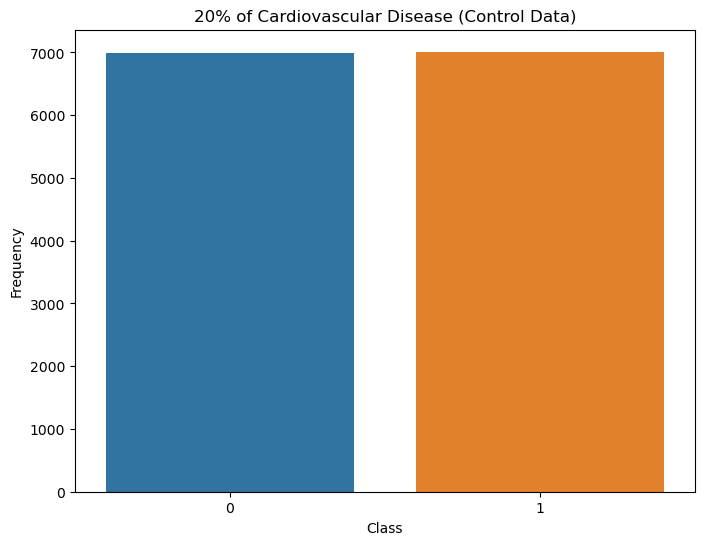

In [61]:
# Assuming 'Class_att' is your target column
class_counts1 = cardiovascular_train_dataframe['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts1.index, y=class_counts1.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('80% of Cardiovascular Disease (Original Dataset)')
plt.show()

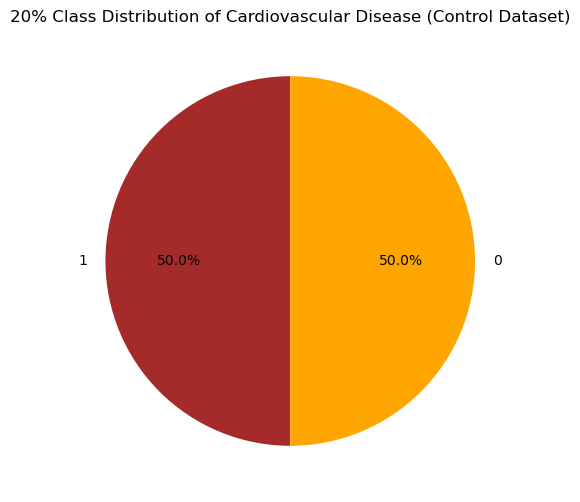

In [65]:
import matplotlib.pyplot as plt

# Assuming 'cardio' is your target column and we have these counts
class_counts3 = {"1": 7000, "0": 7000}
color = ['brown', 'orange']
# Create a pie chart
plt.figure(figsize=(8, 6))
plt.pie(class_counts3.values(), labels=class_counts3.keys(), colors = color, autopct='%1.1f%%', startangle=90)
plt.title('20% Class Distribution of Cardiovascular Disease (Control Dataset)')
plt.show()


In [55]:
print('==============20% of Cardiovascular Disease (Control Dataset)===========')
control_cardio_dataframe.info()
cardiovascular_train_dataframe

==============20% of Cardiovascular Disease (Control Dataset)===========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46730 to 63452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          14000 non-null  float64 
 1   gender       14000 non-null  category
 2   height       14000 non-null  float64 
 3   weight       14000 non-null  float64 
 4   ap_hi        14000 non-null  float64 
 5   ap_lo        14000 non-null  float64 
 6   cholesterol  14000 non-null  category
 7   gluc         14000 non-null  category
 8   smoke        14000 non-null  category
 9   alco         14000 non-null  category
 10  active       14000 non-null  category
 11  cardio       14000 non-null  category
dtypes: category(7), float64(5)
memory usage: 752.8 KB


In [57]:
print('==============80% of Cardiovascular Disease (Original Dataset)===========')
cardiovascular_train_dataframe.info()

==============80% of Cardiovascular Disease (Original Dataset)===========
<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 2.9 MB


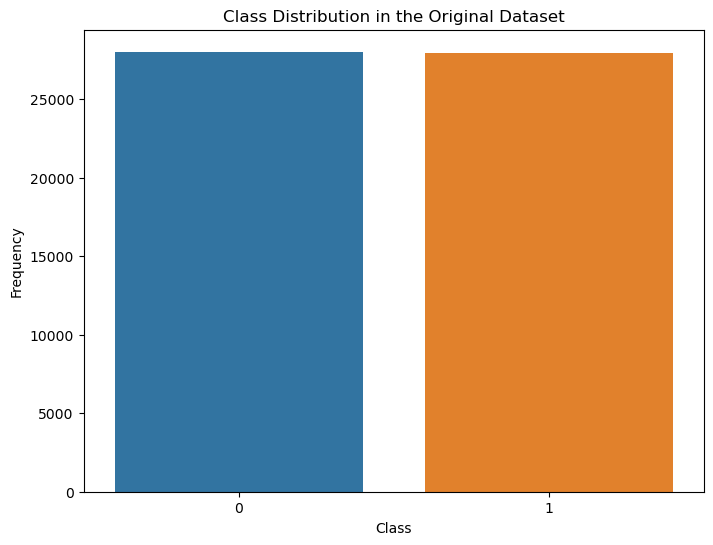

In [25]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class')
plt.ylabel('Frequency')
plt.title('Class Distribution in the Original Dataset')
plt.show()

# STEP 3: DEFINING AND TRAINING VARIATIONAL AUTO-ENCODER MODEL, AND GENERATE THE RELEVANT SYNTHETIC DATASET THAT MIMICS ORIGINAL DATA

In [22]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


from sklearn.ensemble import RandomForestClassifier

# Separate features and target
features = cardiovascular_train_dataframe.drop('cardio', axis=1)
labels = cardiovascular_train_dataframe['cardio']

# Split the balanced dataset into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(features, labels, test_size=0.2, random_state=42)

# We Normalize features 
scaler = MinMaxScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_orig_scaled = scaler.transform(X_test_orig)

# Add noise for autoencoder training
noise_factor = 0.05
X_train_noisy = X_train_orig_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_orig_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

# Assuming features and labels have been prepared and scaled
input_dim = X_train_orig_scaled.shape[1]
num_classes = len(np.unique(y_train_orig))

latent_dim = 12  # Latent space dimension

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Encoder network
inputs = Input(shape=(input_dim, ))
labels_input = Input(shape=(1,), dtype='int32')
labels_embedding = Flatten()(Embedding(num_classes, input_dim)(labels_input))
inputs_cond = Concatenate(axis=-1)([inputs, labels_embedding])
x = Dense(64, activation='relu')(inputs_cond)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
latent_inputs = Input(shape=(latent_dim,))
labels_embedding_dec = Flatten()(Embedding(num_classes, latent_dim)(labels_input))
latent_cond = Concatenate(axis=-1)([latent_inputs, labels_embedding_dec])
x_decoded = Dense(64, activation='relu')(latent_cond)
outputs = Dense(input_dim, activation='sigmoid')(x_decoded)

# Instantiate encoder and decoder models
encoder = Model([inputs, labels_input], [z_mean, z_log_var, z], name='encoder')
decoder = Model([latent_inputs, labels_input], outputs, name='decoder')

# VAE model
outputs_vae = decoder([encoder([inputs, labels_input])[2], labels_input])
vae_cardiovascular = Model([inputs, labels_input], outputs_vae, name='vae_cardiovascular')

# Define VAE loss
reconstruction_loss = K.sum(K.binary_crossentropy(inputs, outputs_vae), axis=-1)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_cardiovascular.add_loss(vae_loss)
vae_cardiovascular.compile(optimizer='adam')

# Training the VAE
vae_cardiovascular.fit([X_train_orig_scaled, y_train_orig], features, epochs=1000, batch_size=256, validation_split=0.2)

# Generating synthetic data
def generate_synthetic_data(num_samples, num_classes):
    latent_samples = np.random.normal(size=(num_samples, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, num_samples)
    synthetic_data = decoder.predict([latent_samples, sampled_labels])
    return synthetic_data, sampled_labels

synthetic_data, synthetic_labels = generate_synthetic_data(56000, num_classes)

# Transform synthetic data back to original space (if features were scaled)
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)

# Convert to DataFrame and Series for ease of use
vae_synthetic_data_df = pd.DataFrame(synthetic_data_rescaled, columns=features.columns)
vae_synthetic_labels_series = pd.Series(synthetic_labels, name='cardio')

print(vae_synthetic_data_df.head())
print(vae_synthetic_labels_series.head())




Epoch 1/1000
140/140 [==============================] - 2s 5ms/step - loss: 5.4914 - val_loss: 4.6223
Epoch 2/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.5789 - val_loss: 4.5458
Epoch 3/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.5375 - val_loss: 4.5280
Epoch 4/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.5104 - val_loss: 4.5086
Epoch 5/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.5051 - val_loss: 4.5017
Epoch 6/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4957 - val_loss: 4.4912
Epoch 7/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4837 - val_loss: 4.4999
Epoch 8/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4737 - val_loss: 4.4808
Epoch 9/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4751 - val_loss: 4.4641
Epoch 10/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.

140/140 [==============================] - 0s 3ms/step - loss: 4.4317 - val_loss: 4.4401
Epoch 154/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4331 - val_loss: 4.4452
Epoch 155/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4396 - val_loss: 4.4479
Epoch 156/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4310 - val_loss: 4.4296
Epoch 157/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4305 - val_loss: 4.4287
Epoch 158/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4253 - val_loss: 4.4360
Epoch 159/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4338 - val_loss: 4.4314
Epoch 160/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4358
Epoch 161/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4373 - val_loss: 4.4417
Epoch 162/1000
140/140 [==============================] - 0s 3ms/step - loss: 4

Epoch 232/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4193
Epoch 233/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4266 - val_loss: 4.4313
Epoch 234/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4359 - val_loss: 4.4291
Epoch 235/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4314 - val_loss: 4.4392
Epoch 236/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4360 - val_loss: 4.4420
Epoch 237/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4271
Epoch 238/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4333
Epoch 239/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4332
Epoch 240/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4354
Epoch 241/1000
140/140 [==============================] - 0s 3ms

Epoch 311/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4250
Epoch 312/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4310
Epoch 313/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4282
Epoch 314/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4317 - val_loss: 4.4152
Epoch 315/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4292
Epoch 316/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4260 - val_loss: 4.4213
Epoch 317/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4285 - val_loss: 4.4350
Epoch 318/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4337 - val_loss: 4.4148
Epoch 319/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4279 - val_loss: 4.4206
Epoch 320/1000
140/140 [==============================] - 0s 3ms

Epoch 390/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4221
Epoch 391/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4207
Epoch 392/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4329 - val_loss: 4.4439
Epoch 393/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4329 - val_loss: 4.4377
Epoch 394/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4352 - val_loss: 4.4239
Epoch 395/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4336 - val_loss: 4.4337
Epoch 396/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4331 - val_loss: 4.4306
Epoch 397/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4296
Epoch 398/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4268 - val_loss: 4.4390
Epoch 399/1000
140/140 [==============================] - 0s 3ms

Epoch 469/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4258
Epoch 470/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4324
Epoch 471/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4252 - val_loss: 4.4173
Epoch 472/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4517
Epoch 473/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4223 - val_loss: 4.4346
Epoch 474/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4295
Epoch 475/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4127
Epoch 476/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4237
Epoch 477/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4237
Epoch 478/1000
140/140 [==============================] - 0s 3ms

Epoch 548/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4265 - val_loss: 4.4463
Epoch 549/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4350 - val_loss: 4.4394
Epoch 550/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4274
Epoch 551/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4245
Epoch 552/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4356 - val_loss: 4.4367
Epoch 553/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4231 - val_loss: 4.4282
Epoch 554/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4372
Epoch 555/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4340 - val_loss: 4.4220
Epoch 556/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4304 - val_loss: 4.4309
Epoch 557/1000
140/140 [==============================] - 0s 3ms

Epoch 627/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4469
Epoch 628/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4296 - val_loss: 4.4149
Epoch 629/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4273 - val_loss: 4.4291
Epoch 630/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4186 - val_loss: 4.4236
Epoch 631/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4255
Epoch 632/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4244 - val_loss: 4.4278
Epoch 633/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4267
Epoch 634/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.4300 - val_loss: 4.4281
Epoch 635/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4276 - val_loss: 4.4218
Epoch 636/1000
140/140 [==============================] - 1s 4ms

Epoch 706/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4244 - val_loss: 4.4207
Epoch 707/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4237
Epoch 708/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4362
Epoch 709/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4331 - val_loss: 4.4206
Epoch 710/1000
140/140 [==============================] - 1s 4ms/step - loss: 4.4318 - val_loss: 4.4319
Epoch 711/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4346 - val_loss: 4.4304
Epoch 712/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4337 - val_loss: 4.4168
Epoch 713/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4360 - val_loss: 4.4325
Epoch 714/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4290 - val_loss: 4.4336
Epoch 715/1000
140/140 [==============================] - 1s 4ms

Epoch 785/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4229
Epoch 786/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4225 - val_loss: 4.4268
Epoch 787/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4327 - val_loss: 4.4330
Epoch 788/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4171 - val_loss: 4.4330
Epoch 789/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4259 - val_loss: 4.4397
Epoch 790/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4090
Epoch 791/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4271
Epoch 792/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4194
Epoch 793/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4311
Epoch 794/1000
140/140 [==============================] - 0s 3ms

Epoch 864/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4313 - val_loss: 4.4317
Epoch 865/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4238
Epoch 866/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4164
Epoch 867/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4310 - val_loss: 4.4288
Epoch 868/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4269 - val_loss: 4.4281
Epoch 869/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4308 - val_loss: 4.4308
Epoch 870/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4347 - val_loss: 4.4329
Epoch 871/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4218 - val_loss: 4.4358
Epoch 872/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4314 - val_loss: 4.4345
Epoch 873/1000
140/140 [==============================] - 0s 3ms

Epoch 943/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4361 - val_loss: 4.4147
Epoch 944/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4337 - val_loss: 4.4277
Epoch 945/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4259 - val_loss: 4.4273
Epoch 946/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4312 - val_loss: 4.4448
Epoch 947/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4272
Epoch 948/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4375
Epoch 949/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4338 - val_loss: 4.4347
Epoch 950/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4332 - val_loss: 4.4388
Epoch 951/1000
140/140 [==============================] - 0s 3ms/step - loss: 4.4324 - val_loss: 4.4353
Epoch 952/1000
140/140 [==============================] - 0s 3ms

In [ ]:
import numpy as np
import pandas as pd
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Lambda, Embedding, Flatten, Concatenate
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import backend as K
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE


from sklearn.ensemble import RandomForestClassifier

# Separate features and target
features = cardiovascular_train_dataframe.drop('cardio', axis=1)
labels = cardiovascular_train_dataframe['cardio']

# Split the balanced dataset into training and testing sets
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(features, labels, test_size=0.2, random_state=42)

# We Normalize features 
scaler = MinMaxScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_orig_scaled = scaler.transform(X_test_orig)

# Add noise for autoencoder training
noise_factor = 0.05
X_train_noisy = X_train_orig_scaled + noise_factor * np.random.normal(loc=0.0, scale=1.0, size=X_train_orig_scaled.shape)
X_train_noisy = np.clip(X_train_noisy, 0., 1.)

# Assuming features and labels have been prepared and scaled
input_dim = X_train_orig_scaled.shape[1]
num_classes = len(np.unique(y_train_orig))

latent_dim = 12  # Latent space dimension

def sampling(args):
    z_mean, z_log_var = args
    batch = K.shape(z_mean)[0]
    dim = K.int_shape(z_mean)[1]
    epsilon = K.random_normal(shape=(batch, dim))
    return z_mean + K.exp(0.5 * z_log_var) * epsilon

# Encoder network
inputs = Input(shape=(input_dim, ))
labels_input = Input(shape=(1,), dtype='int32')
labels_embedding = Flatten()(Embedding(num_classes, input_dim)(labels_input))
inputs_cond = Concatenate(axis=-1)([inputs, labels_embedding])
x = Dense(64, activation='relu')(inputs_cond)
z_mean = Dense(latent_dim)(x)
z_log_var = Dense(latent_dim)(x)
z = Lambda(sampling, output_shape=(latent_dim,))([z_mean, z_log_var])

# Decoder network
latent_inputs = Input(shape=(latent_dim,))
labels_embedding_dec = Flatten()(Embedding(num_classes, latent_dim)(labels_input))
latent_cond = Concatenate(axis=-1)([latent_inputs, labels_embedding_dec])
x_decoded = Dense(64, activation='relu')(latent_cond)
outputs = Dense(input_dim, activation='sigmoid')(x_decoded)

# Instantiate encoder and decoder models
encoder = Model([inputs, labels_input], [z_mean, z_log_var, z], name='encoder')
decoder = Model([latent_inputs, labels_input], outputs, name='decoder')

# VAE model
outputs_vae = decoder([encoder([inputs, labels_input])[2], labels_input])
vae_cardiovascular = Model([inputs, labels_input], outputs_vae, name='vae_cardiovascular')

# Define VAE loss
reconstruction_loss = K.sum(K.binary_crossentropy(inputs, outputs_vae), axis=-1)
kl_loss = -0.5 * K.sum(1 + z_log_var - K.square(z_mean) - K.exp(z_log_var), axis=-1)
vae_loss = K.mean(reconstruction_loss + kl_loss)
vae_cardiovascular.add_loss(vae_loss)
vae_cardiovascular.compile(optimizer='adam')

# Training the VAE
vae_cardiovascular.fit([X_train_orig_scaled, y_train_orig], features, epochs=20000, batch_size=256, validation_split=0.2)

# Generating synthetic data
def generate_synthetic_data(num_samples, num_classes):
    latent_samples = np.random.normal(size=(num_samples, latent_dim))
    sampled_labels = np.random.randint(0, num_classes, num_samples)
    synthetic_data = decoder.predict([latent_samples, sampled_labels])
    return synthetic_data, sampled_labels

synthetic_data, synthetic_labels = generate_synthetic_data(56000, num_classes)

# Transform synthetic data back to original space (if features were scaled)
synthetic_data_rescaled = scaler.inverse_transform(synthetic_data)

# Convert to DataFrame and Series for ease of use
vae_synthetic_data_dfNEW = pd.DataFrame(synthetic_data_rescaled, columns=features.columns)
vae_synthetic_labels_seriesNEW = pd.Series(synthetic_labels, name='cardio')

print(vae_synthetic_data_dfNEW.head())
print(vae_synthetic_labels_seriesNEW.head())




Epoch 1/20000
140/140 [==============================] - 2s 5ms/step - loss: 5.6602 - val_loss: 4.6424
Epoch 2/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.5856 - val_loss: 4.5636
Epoch 3/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.5410 - val_loss: 4.5386
Epoch 4/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.5180 - val_loss: 4.5064
Epoch 5/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.5017 - val_loss: 4.5009
Epoch 6/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4982 - val_loss: 4.5109
Epoch 7/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4937 - val_loss: 4.4940
Epoch 8/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4822 - val_loss: 4.4733
Epoch 9/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4725 - val_loss: 4.4672
Epoch 10/20000
140/140 [==============================] - 1s 4ms/step 

140/140 [==============================] - 0s 3ms/step - loss: 4.4369 - val_loss: 4.4393
Epoch 152/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4359
Epoch 153/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4362
Epoch 154/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4282 - val_loss: 4.4291
Epoch 155/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4361 - val_loss: 4.4312
Epoch 156/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4355 - val_loss: 4.4413
Epoch 157/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4321 - val_loss: 4.4351
Epoch 158/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4204 - val_loss: 4.4375
Epoch 159/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4319 - val_loss: 4.4138
Epoch 160/20000
140/140 [==============================] - 1s 4ms/step 

140/140 [==============================] - 0s 3ms/step - loss: 4.4352 - val_loss: 4.4352
Epoch 308/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4344
Epoch 309/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4354
Epoch 310/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4338
Epoch 311/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4305 - val_loss: 4.4218
Epoch 312/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4229 - val_loss: 4.4306
Epoch 313/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4352
Epoch 314/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4431
Epoch 315/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4267 - val_loss: 4.4385
Epoch 316/20000
140/140 [==============================] - 0s 3ms/step 

140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4463
Epoch 464/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4238 - val_loss: 4.4468
Epoch 465/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4315 - val_loss: 4.4354
Epoch 466/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4343 - val_loss: 4.4312
Epoch 467/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4299 - val_loss: 4.4243
Epoch 468/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4302 - val_loss: 4.4365
Epoch 469/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4380
Epoch 470/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4322
Epoch 471/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4265
Epoch 472/20000
140/140 [==============================] - 0s 3ms/step 

140/140 [==============================] - 0s 3ms/step - loss: 4.4220 - val_loss: 4.4156
Epoch 620/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4257 - val_loss: 4.4312
Epoch 621/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4265 - val_loss: 4.4313
Epoch 622/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4389
Epoch 623/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4277 - val_loss: 4.4288
Epoch 624/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4236 - val_loss: 4.4256
Epoch 625/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4253 - val_loss: 4.4460
Epoch 626/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4297
Epoch 627/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4290 - val_loss: 4.4335
Epoch 628/20000
140/140 [==============================] - 0s 3ms/step 

140/140 [==============================] - 0s 3ms/step - loss: 4.4235 - val_loss: 4.4339
Epoch 776/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4279 - val_loss: 4.4362
Epoch 777/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4327 - val_loss: 4.4426
Epoch 778/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4237
Epoch 779/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4326 - val_loss: 4.4266
Epoch 780/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4217
Epoch 781/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4397
Epoch 782/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4314 - val_loss: 4.4376
Epoch 783/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4192
Epoch 784/20000
140/140 [==============================] - 0s 3ms/step 

140/140 [==============================] - 0s 2ms/step - loss: 4.4272 - val_loss: 4.4476
Epoch 932/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4221
Epoch 933/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4384
Epoch 934/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4290 - val_loss: 4.4278
Epoch 935/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4314 - val_loss: 4.4299
Epoch 936/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4333
Epoch 937/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4251 - val_loss: 4.4400
Epoch 938/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4342 - val_loss: 4.4408
Epoch 939/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4210
Epoch 940/20000
140/140 [==============================] - 0s 3ms/step 

140/140 [==============================] - 0s 3ms/step - loss: 4.4231 - val_loss: 4.4172
Epoch 1010/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4279 - val_loss: 4.4340
Epoch 1011/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4416
Epoch 1012/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4248 - val_loss: 4.4331
Epoch 1013/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4331
Epoch 1014/20000
140/140 [==============================] - 0s 2ms/step - loss: 4.4323 - val_loss: 4.4276
Epoch 1015/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4282
Epoch 1016/20000
140/140 [==============================] - 0s 2ms/step - loss: 4.4225 - val_loss: 4.4278
Epoch 1017/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4344
Epoch 1018/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 1s 4ms/step - loss: 4.4280 - val_loss: 4.4341
Epoch 1164/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4246 - val_loss: 4.4274
Epoch 1165/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4314 - val_loss: 4.4329
Epoch 1166/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4331 - val_loss: 4.4310
Epoch 1167/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4273 - val_loss: 4.4403
Epoch 1168/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4227 - val_loss: 4.4185
Epoch 1169/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4320
Epoch 1170/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4312 - val_loss: 4.4311
Epoch 1171/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4327 - val_loss: 4.4317
Epoch 1172/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4303 - val_loss: 4.4238
Epoch 1318/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4321 - val_loss: 4.4297
Epoch 1319/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4324 - val_loss: 4.4226
Epoch 1320/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4505
Epoch 1321/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4308
Epoch 1322/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4305 - val_loss: 4.4250
Epoch 1323/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4329 - val_loss: 4.4092
Epoch 1324/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4380
Epoch 1325/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4243
Epoch 1326/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4255
Epoch 1472/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4134
Epoch 1473/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4310
Epoch 1474/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4229
Epoch 1475/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4277 - val_loss: 4.4351
Epoch 1476/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4305
Epoch 1477/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4362 - val_loss: 4.4245
Epoch 1478/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4289
Epoch 1479/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4392 - val_loss: 4.4356
Epoch 1480/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4262 - val_loss: 4.4328
Epoch 1626/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4359
Epoch 1627/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4314
Epoch 1628/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4219 - val_loss: 4.4400
Epoch 1629/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4334 - val_loss: 4.4224
Epoch 1630/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4318 - val_loss: 4.4439
Epoch 1631/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4201
Epoch 1632/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4245 - val_loss: 4.4275
Epoch 1633/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4277 - val_loss: 4.4227
Epoch 1634/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4236
Epoch 1780/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4285 - val_loss: 4.4291
Epoch 1781/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4283
Epoch 1782/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4336 - val_loss: 4.4262
Epoch 1783/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4323 - val_loss: 4.4304
Epoch 1784/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4349 - val_loss: 4.4304
Epoch 1785/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4276
Epoch 1786/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4361
Epoch 1787/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4220 - val_loss: 4.4318
Epoch 1788/20000
140/140 [==============================] - 1s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4354 - val_loss: 4.4396
Epoch 1934/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4308 - val_loss: 4.4331
Epoch 1935/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4415 - val_loss: 4.4169
Epoch 1936/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4115
Epoch 1937/20000
140/140 [==============================] - 1s 5ms/step - loss: 4.4276 - val_loss: 4.4272
Epoch 1938/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4276 - val_loss: 4.4418
Epoch 1939/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4247 - val_loss: 4.4308
Epoch 1940/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4303 - val_loss: 4.4482
Epoch 1941/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4167 - val_loss: 4.4254
Epoch 1942/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4393 - val_loss: 4.4276
Epoch 2088/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4236 - val_loss: 4.4235
Epoch 2089/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4216
Epoch 2090/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4369
Epoch 2091/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4228
Epoch 2092/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4259
Epoch 2093/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4317 - val_loss: 4.4401
Epoch 2094/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4231 - val_loss: 4.4384
Epoch 2095/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4269 - val_loss: 4.4302
Epoch 2096/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 1s 4ms/step - loss: 4.4281 - val_loss: 4.4267
Epoch 2242/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4257 - val_loss: 4.4179
Epoch 2243/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4392
Epoch 2244/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4313
Epoch 2245/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4291 - val_loss: 4.4286
Epoch 2246/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4285 - val_loss: 4.4254
Epoch 2247/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4276
Epoch 2248/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4341 - val_loss: 4.4301
Epoch 2249/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4480
Epoch 2250/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4262 - val_loss: 4.4359
Epoch 2396/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4333 - val_loss: 4.4308
Epoch 2397/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4278
Epoch 2398/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4227 - val_loss: 4.4322
Epoch 2399/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4328 - val_loss: 4.4348
Epoch 2400/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4314 - val_loss: 4.4249
Epoch 2401/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4246 - val_loss: 4.4254
Epoch 2402/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4297 - val_loss: 4.4382
Epoch 2403/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4392
Epoch 2404/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4340 - val_loss: 4.4407
Epoch 2550/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4302 - val_loss: 4.4277
Epoch 2551/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4350 - val_loss: 4.4272
Epoch 2552/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4191
Epoch 2553/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4260 - val_loss: 4.4274
Epoch 2554/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4389
Epoch 2555/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4333 - val_loss: 4.4322
Epoch 2556/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4319 - val_loss: 4.4240
Epoch 2557/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4393
Epoch 2558/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4235 - val_loss: 4.4404
Epoch 2704/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4269 - val_loss: 4.4439
Epoch 2705/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4219
Epoch 2706/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4213 - val_loss: 4.4233
Epoch 2707/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4358
Epoch 2708/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4282
Epoch 2709/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4260 - val_loss: 4.4360
Epoch 2710/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4313
Epoch 2711/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4387
Epoch 2712/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4267 - val_loss: 4.4373
Epoch 2858/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4205
Epoch 2859/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4247 - val_loss: 4.4194
Epoch 2860/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4285 - val_loss: 4.4421
Epoch 2861/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4250 - val_loss: 4.4235
Epoch 2862/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4325 - val_loss: 4.4342
Epoch 2863/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4370 - val_loss: 4.4254
Epoch 2864/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4314 - val_loss: 4.4340
Epoch 2865/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4209 - val_loss: 4.4499
Epoch 2866/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4300
Epoch 3012/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4290 - val_loss: 4.4435
Epoch 3013/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4211
Epoch 3014/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4364 - val_loss: 4.4471
Epoch 3015/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4346 - val_loss: 4.4234
Epoch 3016/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4204 - val_loss: 4.4243
Epoch 3017/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4368 - val_loss: 4.4380
Epoch 3018/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4326 - val_loss: 4.4268
Epoch 3019/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4430
Epoch 3020/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4243 - val_loss: 4.4255
Epoch 3166/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4272 - val_loss: 4.4387
Epoch 3167/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4269
Epoch 3168/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4367
Epoch 3169/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4303 - val_loss: 4.4238
Epoch 3170/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4226 - val_loss: 4.4228
Epoch 3171/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4312
Epoch 3172/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4225
Epoch 3173/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4362
Epoch 3174/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 4ms/step - loss: 4.4317 - val_loss: 4.4362
Epoch 3320/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4340 - val_loss: 4.4259
Epoch 3321/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4255
Epoch 3322/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4407
Epoch 3323/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4208
Epoch 3324/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4305
Epoch 3325/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4143
Epoch 3326/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4254 - val_loss: 4.4282
Epoch 3327/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4219
Epoch 3328/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4305 - val_loss: 4.4314
Epoch 3474/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4304 - val_loss: 4.4360
Epoch 3475/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4313 - val_loss: 4.4400
Epoch 3476/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4314 - val_loss: 4.4263
Epoch 3477/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4234
Epoch 3478/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4206 - val_loss: 4.4253
Epoch 3479/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4385
Epoch 3480/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4285
Epoch 3481/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4225 - val_loss: 4.4224
Epoch 3482/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 1s 4ms/step - loss: 4.4243 - val_loss: 4.4297
Epoch 3628/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4183
Epoch 3629/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4301 - val_loss: 4.4219
Epoch 3630/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4279 - val_loss: 4.4406
Epoch 3631/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4341
Epoch 3632/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4277 - val_loss: 4.4274
Epoch 3633/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4211 - val_loss: 4.4234
Epoch 3634/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4306 - val_loss: 4.4255
Epoch 3635/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4258
Epoch 3636/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4081
Epoch 3782/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4296 - val_loss: 4.4497
Epoch 3783/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4302 - val_loss: 4.4265
Epoch 3784/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4291 - val_loss: 4.4367
Epoch 3785/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4266 - val_loss: 4.4157
Epoch 3786/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4319 - val_loss: 4.4253
Epoch 3787/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4245 - val_loss: 4.4280
Epoch 3788/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4288 - val_loss: 4.4289
Epoch 3789/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4291
Epoch 3790/20000
140/140 [==============================] - 1s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4277 - val_loss: 4.4189
Epoch 3936/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4175 - val_loss: 4.4459
Epoch 3937/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4334 - val_loss: 4.4368
Epoch 3938/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4329 - val_loss: 4.4309
Epoch 3939/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4312
Epoch 3940/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4370
Epoch 3941/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4212 - val_loss: 4.4388
Epoch 3942/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4341
Epoch 3943/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4372
Epoch 3944/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4304 - val_loss: 4.4301
Epoch 4090/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4462
Epoch 4091/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4270 - val_loss: 4.4269
Epoch 4092/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4375 - val_loss: 4.4264
Epoch 4093/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4099
Epoch 4094/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4300 - val_loss: 4.4267
Epoch 4095/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4223
Epoch 4096/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4254 - val_loss: 4.4236
Epoch 4097/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4317 - val_loss: 4.4320
Epoch 4098/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4285
Epoch 4244/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4254 - val_loss: 4.4310
Epoch 4245/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4195
Epoch 4246/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4229 - val_loss: 4.4277
Epoch 4247/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4273 - val_loss: 4.4292
Epoch 4248/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4363 - val_loss: 4.4236
Epoch 4249/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4312 - val_loss: 4.4382
Epoch 4250/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4244 - val_loss: 4.4264
Epoch 4251/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4322
Epoch 4252/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4382
Epoch 4398/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4364 - val_loss: 4.4158
Epoch 4399/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4347 - val_loss: 4.4256
Epoch 4400/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4277 - val_loss: 4.4219
Epoch 4401/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4411
Epoch 4402/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4321
Epoch 4403/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4285 - val_loss: 4.4131
Epoch 4404/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4329
Epoch 4405/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4239 - val_loss: 4.4346
Epoch 4406/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4395
Epoch 4552/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4232 - val_loss: 4.4220
Epoch 4553/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4260 - val_loss: 4.4294
Epoch 4554/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4300 - val_loss: 4.4167
Epoch 4555/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4361 - val_loss: 4.4279
Epoch 4556/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4307 - val_loss: 4.4281
Epoch 4557/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4260 - val_loss: 4.4252
Epoch 4558/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4200
Epoch 4559/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4244 - val_loss: 4.4429
Epoch 4560/20000
140/140 [==============================] - 1s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4348 - val_loss: 4.4219
Epoch 4706/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4321 - val_loss: 4.4281
Epoch 4707/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4236 - val_loss: 4.4365
Epoch 4708/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4327 - val_loss: 4.4313
Epoch 4709/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4254 - val_loss: 4.4288
Epoch 4710/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4191 - val_loss: 4.4248
Epoch 4711/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4305 - val_loss: 4.4250
Epoch 4712/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4322
Epoch 4713/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4318 - val_loss: 4.4274
Epoch 4714/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4201 - val_loss: 4.4353
Epoch 4860/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4363
Epoch 4861/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4227 - val_loss: 4.4455
Epoch 4862/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4421
Epoch 4863/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4231 - val_loss: 4.4389
Epoch 4864/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4330
Epoch 4865/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4287 - val_loss: 4.4226
Epoch 4866/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4223
Epoch 4867/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4266 - val_loss: 4.4377
Epoch 4868/20000
140/140 [==============================] - 1s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4281
Epoch 5014/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4338
Epoch 5015/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4284 - val_loss: 4.4325
Epoch 5016/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4066
Epoch 5017/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4247 - val_loss: 4.4416
Epoch 5018/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4359
Epoch 5019/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4204 - val_loss: 4.4373
Epoch 5020/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4265 - val_loss: 4.4316
Epoch 5021/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4219
Epoch 5022/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4449
Epoch 5168/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4252 - val_loss: 4.4251
Epoch 5169/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4230 - val_loss: 4.4379
Epoch 5170/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4201
Epoch 5171/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4405
Epoch 5172/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4281
Epoch 5173/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4115
Epoch 5174/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4201 - val_loss: 4.4349
Epoch 5175/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4249 - val_loss: 4.4184
Epoch 5176/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4315 - val_loss: 4.4292
Epoch 5322/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4172
Epoch 5323/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4345 - val_loss: 4.4208
Epoch 5324/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4318
Epoch 5325/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4210 - val_loss: 4.4455
Epoch 5326/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4216 - val_loss: 4.4201
Epoch 5327/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4229 - val_loss: 4.4350
Epoch 5328/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4396
Epoch 5329/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4268 - val_loss: 4.4152
Epoch 5330/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4265 - val_loss: 4.4360
Epoch 5476/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4357 - val_loss: 4.4309
Epoch 5477/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4376
Epoch 5478/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4379
Epoch 5479/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4270 - val_loss: 4.4458
Epoch 5480/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4232 - val_loss: 4.4359
Epoch 5481/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4269 - val_loss: 4.4237
Epoch 5482/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4287
Epoch 5483/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4230 - val_loss: 4.4445
Epoch 5484/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4341 - val_loss: 4.4317
Epoch 5630/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4303
Epoch 5631/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4304 - val_loss: 4.4289
Epoch 5632/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4439
Epoch 5633/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4301
Epoch 5634/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4306 - val_loss: 4.4400
Epoch 5635/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4266 - val_loss: 4.4509
Epoch 5636/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4231 - val_loss: 4.4302
Epoch 5637/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4254
Epoch 5638/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4285 - val_loss: 4.4348
Epoch 5784/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4334 - val_loss: 4.4341
Epoch 5785/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4215 - val_loss: 4.4259
Epoch 5786/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4232
Epoch 5787/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4262 - val_loss: 4.4422
Epoch 5788/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4357
Epoch 5789/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4217 - val_loss: 4.4321
Epoch 5790/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4282
Epoch 5791/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4335 - val_loss: 4.4188
Epoch 5792/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4295
Epoch 5938/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4371 - val_loss: 4.4370
Epoch 5939/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4270 - val_loss: 4.4328
Epoch 5940/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4319 - val_loss: 4.4482
Epoch 5941/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4349 - val_loss: 4.4405
Epoch 5942/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4276 - val_loss: 4.4238
Epoch 5943/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4141
Epoch 5944/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4227
Epoch 5945/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4305 - val_loss: 4.4300
Epoch 5946/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4249 - val_loss: 4.4255
Epoch 6092/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4325 - val_loss: 4.4311
Epoch 6093/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4253 - val_loss: 4.4319
Epoch 6094/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4197 - val_loss: 4.4265
Epoch 6095/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4222 - val_loss: 4.4278
Epoch 6096/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4225 - val_loss: 4.4180
Epoch 6097/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4301 - val_loss: 4.4159
Epoch 6098/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4269 - val_loss: 4.4305
Epoch 6099/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4259 - val_loss: 4.4349
Epoch 6100/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4260
Epoch 6246/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4331
Epoch 6247/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4224 - val_loss: 4.4235
Epoch 6248/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4267 - val_loss: 4.4227
Epoch 6249/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4253
Epoch 6250/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4306
Epoch 6251/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4371
Epoch 6252/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4251 - val_loss: 4.4210
Epoch 6253/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4295
Epoch 6254/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4388
Epoch 6400/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4333 - val_loss: 4.4273
Epoch 6401/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4266 - val_loss: 4.4334
Epoch 6402/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4279 - val_loss: 4.4074
Epoch 6403/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4362 - val_loss: 4.4345
Epoch 6404/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4146
Epoch 6405/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4285 - val_loss: 4.4264
Epoch 6406/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4337
Epoch 6407/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4321
Epoch 6408/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4351
Epoch 6554/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4310
Epoch 6555/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4427
Epoch 6556/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4266 - val_loss: 4.4270
Epoch 6557/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4322
Epoch 6558/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4202 - val_loss: 4.4356
Epoch 6559/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4349 - val_loss: 4.4308
Epoch 6560/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4262
Epoch 6561/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4403
Epoch 6562/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4357 - val_loss: 4.4301
Epoch 6708/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4270 - val_loss: 4.4313
Epoch 6709/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4261
Epoch 6710/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4375 - val_loss: 4.4282
Epoch 6711/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4292
Epoch 6712/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4263 - val_loss: 4.4186
Epoch 6713/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4273 - val_loss: 4.4272
Epoch 6714/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4223 - val_loss: 4.4307
Epoch 6715/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4289
Epoch 6716/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4297
Epoch 6862/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4313 - val_loss: 4.4138
Epoch 6863/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4213
Epoch 6864/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4212 - val_loss: 4.4289
Epoch 6865/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4248 - val_loss: 4.4256
Epoch 6866/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4411
Epoch 6867/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4285 - val_loss: 4.4394
Epoch 6868/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4273 - val_loss: 4.4280
Epoch 6869/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4365
Epoch 6870/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4239 - val_loss: 4.4248
Epoch 7016/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4199 - val_loss: 4.4260
Epoch 7017/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4152
Epoch 7018/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4338 - val_loss: 4.4213
Epoch 7019/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4249
Epoch 7020/20000
140/140 [==============================] - 0s 2ms/step - loss: 4.4296 - val_loss: 4.4392
Epoch 7021/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4248 - val_loss: 4.4136
Epoch 7022/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4213
Epoch 7023/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4296 - val_loss: 4.4341
Epoch 7024/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4414 - val_loss: 4.4391
Epoch 7170/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4265 - val_loss: 4.4305
Epoch 7171/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4309
Epoch 7172/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4256
Epoch 7173/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4249 - val_loss: 4.4306
Epoch 7174/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4322 - val_loss: 4.4282
Epoch 7175/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4415
Epoch 7176/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4315
Epoch 7177/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4322 - val_loss: 4.4386
Epoch 7178/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4298 - val_loss: 4.4432
Epoch 7324/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4163
Epoch 7325/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4268 - val_loss: 4.4288
Epoch 7326/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4223
Epoch 7327/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4230
Epoch 7328/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4306 - val_loss: 4.4127
Epoch 7329/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4253 - val_loss: 4.4351
Epoch 7330/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4312
Epoch 7331/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4263 - val_loss: 4.4313
Epoch 7332/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4276 - val_loss: 4.4330
Epoch 7478/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4329 - val_loss: 4.4343
Epoch 7479/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4386 - val_loss: 4.4382
Epoch 7480/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4302 - val_loss: 4.4347
Epoch 7481/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4239 - val_loss: 4.4334
Epoch 7482/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4348
Epoch 7483/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4197 - val_loss: 4.4255
Epoch 7484/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4281
Epoch 7485/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4355 - val_loss: 4.4376
Epoch 7486/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4267 - val_loss: 4.4164
Epoch 7632/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4310 - val_loss: 4.4295
Epoch 7633/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4292
Epoch 7634/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4179
Epoch 7635/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4262 - val_loss: 4.4176
Epoch 7636/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4352
Epoch 7637/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4275
Epoch 7638/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4200 - val_loss: 4.4257
Epoch 7639/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4273
Epoch 7640/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4228 - val_loss: 4.4317
Epoch 7786/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4257
Epoch 7787/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4289
Epoch 7788/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4327
Epoch 7789/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4186 - val_loss: 4.4324
Epoch 7790/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4235 - val_loss: 4.4437
Epoch 7791/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4313 - val_loss: 4.4311
Epoch 7792/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4263 - val_loss: 4.4203
Epoch 7793/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4249 - val_loss: 4.4018
Epoch 7794/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4301 - val_loss: 4.4312
Epoch 7940/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4224
Epoch 7941/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4318 - val_loss: 4.4324
Epoch 7942/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4257
Epoch 7943/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4360
Epoch 7944/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4155
Epoch 7945/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4314 - val_loss: 4.4236
Epoch 7946/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4395 - val_loss: 4.4407
Epoch 7947/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4312 - val_loss: 4.4183
Epoch 7948/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4290
Epoch 8094/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4186 - val_loss: 4.4239
Epoch 8095/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4332
Epoch 8096/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4286
Epoch 8097/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4290 - val_loss: 4.4335
Epoch 8098/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4233 - val_loss: 4.4324
Epoch 8099/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4215
Epoch 8100/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4260 - val_loss: 4.4130
Epoch 8101/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4255 - val_loss: 4.4367
Epoch 8102/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4305
Epoch 8248/20000
140/140 [==============================] - 0s 2ms/step - loss: 4.4226 - val_loss: 4.4286
Epoch 8249/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4330 - val_loss: 4.4356
Epoch 8250/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4354
Epoch 8251/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4298 - val_loss: 4.4315
Epoch 8252/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4267 - val_loss: 4.4397
Epoch 8253/20000
140/140 [==============================] - 0s 2ms/step - loss: 4.4272 - val_loss: 4.4249
Epoch 8254/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4172
Epoch 8255/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4228
Epoch 8256/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4263 - val_loss: 4.4334
Epoch 8402/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4234 - val_loss: 4.4301
Epoch 8403/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4312
Epoch 8404/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4262 - val_loss: 4.4348
Epoch 8405/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4178
Epoch 8406/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4257 - val_loss: 4.4180
Epoch 8407/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4279
Epoch 8408/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4301
Epoch 8409/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4328
Epoch 8410/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4187
Epoch 8556/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4229 - val_loss: 4.4308
Epoch 8557/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4290 - val_loss: 4.4183
Epoch 8558/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4260 - val_loss: 4.4307
Epoch 8559/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4313 - val_loss: 4.4221
Epoch 8560/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4361
Epoch 8561/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4265 - val_loss: 4.4297
Epoch 8562/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4184 - val_loss: 4.4202
Epoch 8563/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4370 - val_loss: 4.4220
Epoch 8564/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 2ms/step - loss: 4.4256 - val_loss: 4.4237
Epoch 8710/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4331
Epoch 8711/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4233
Epoch 8712/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4158
Epoch 8713/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4359 - val_loss: 4.4274
Epoch 8714/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4339
Epoch 8715/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4336 - val_loss: 4.4322
Epoch 8716/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4231 - val_loss: 4.4266
Epoch 8717/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4322
Epoch 8718/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4290 - val_loss: 4.4463
Epoch 8864/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4321 - val_loss: 4.4250
Epoch 8865/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4276 - val_loss: 4.4324
Epoch 8866/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4230 - val_loss: 4.4146
Epoch 8867/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4250 - val_loss: 4.4246
Epoch 8868/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4305 - val_loss: 4.4284
Epoch 8869/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4165
Epoch 8870/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4319 - val_loss: 4.4152
Epoch 8871/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4370 - val_loss: 4.4291
Epoch 8872/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4321 - val_loss: 4.4265
Epoch 9018/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4269 - val_loss: 4.4286
Epoch 9019/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4394
Epoch 9020/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4248 - val_loss: 4.4309
Epoch 9021/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4309
Epoch 9022/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4248 - val_loss: 4.4250
Epoch 9023/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4290 - val_loss: 4.4258
Epoch 9024/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4273 - val_loss: 4.4298
Epoch 9025/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4227 - val_loss: 4.4399
Epoch 9026/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4132
Epoch 9172/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4334 - val_loss: 4.4396
Epoch 9173/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4357
Epoch 9174/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4180
Epoch 9175/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4269 - val_loss: 4.4279
Epoch 9176/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4375
Epoch 9177/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4293
Epoch 9178/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4197 - val_loss: 4.4317
Epoch 9179/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4226 - val_loss: 4.4303
Epoch 9180/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4352
Epoch 9326/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4322
Epoch 9327/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4406
Epoch 9328/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4300
Epoch 9329/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4366
Epoch 9330/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4317 - val_loss: 4.4166
Epoch 9331/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4230 - val_loss: 4.4251
Epoch 9332/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4248 - val_loss: 4.4314
Epoch 9333/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4379
Epoch 9334/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4259 - val_loss: 4.4210
Epoch 9480/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4291 - val_loss: 4.4405
Epoch 9481/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4342
Epoch 9482/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4323
Epoch 9483/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4254 - val_loss: 4.4167
Epoch 9484/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4247 - val_loss: 4.4367
Epoch 9485/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4306
Epoch 9486/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4213 - val_loss: 4.4273
Epoch 9487/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4354
Epoch 9488/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4302 - val_loss: 4.4296
Epoch 9634/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4379
Epoch 9635/20000
140/140 [==============================] - 1s 4ms/step - loss: 4.4261 - val_loss: 4.4323
Epoch 9636/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4319 - val_loss: 4.4288
Epoch 9637/20000
140/140 [==============================] - 0s 4ms/step - loss: 4.4304 - val_loss: 4.4215
Epoch 9638/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4363
Epoch 9639/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4379 - val_loss: 4.4127
Epoch 9640/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4294
Epoch 9641/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4227 - val_loss: 4.4147
Epoch 9642/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4259 - val_loss: 4.4221
Epoch 9788/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4220
Epoch 9789/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4270
Epoch 9790/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4257 - val_loss: 4.4230
Epoch 9791/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4370 - val_loss: 4.4267
Epoch 9792/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4319 - val_loss: 4.4339
Epoch 9793/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4226
Epoch 9794/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4231
Epoch 9795/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4299 - val_loss: 4.4176
Epoch 9796/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4346 - val_loss: 4.4324
Epoch 9942/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4192 - val_loss: 4.4387
Epoch 9943/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4212 - val_loss: 4.4246
Epoch 9944/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4272
Epoch 9945/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4230 - val_loss: 4.4263
Epoch 9946/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4243 - val_loss: 4.4271
Epoch 9947/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4247 - val_loss: 4.4217
Epoch 9948/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4308 - val_loss: 4.4167
Epoch 9949/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4293
Epoch 9950/20000
140/140 [==============================] - 0s 

140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4252
Epoch 10095/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4239 - val_loss: 4.4304
Epoch 10096/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4277 - val_loss: 4.4186
Epoch 10097/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4300 - val_loss: 4.4171
Epoch 10098/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4303 - val_loss: 4.4225
Epoch 10099/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4284
Epoch 10100/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4432
Epoch 10101/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4302
Epoch 10102/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4340
Epoch 10103/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4238 - val_loss: 4.4305
Epoch 10247/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4289
Epoch 10248/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4351 - val_loss: 4.4090
Epoch 10249/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4315 - val_loss: 4.4351
Epoch 10250/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4395
Epoch 10251/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4277 - val_loss: 4.4420
Epoch 10252/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4301 - val_loss: 4.4226
Epoch 10253/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4331 - val_loss: 4.4237
Epoch 10254/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4309 - val_loss: 4.4277
Epoch 10255/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4283 - val_loss: 4.4258
Epoch 10399/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4266 - val_loss: 4.4340
Epoch 10400/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4292 - val_loss: 4.4324
Epoch 10401/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4313 - val_loss: 4.4264
Epoch 10402/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4368 - val_loss: 4.4314
Epoch 10403/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4252 - val_loss: 4.4226
Epoch 10404/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4192 - val_loss: 4.4392
Epoch 10405/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4268 - val_loss: 4.4236
Epoch 10406/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4212 - val_loss: 4.4405
Epoch 10407/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4422
Epoch 10551/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4335
Epoch 10552/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4500
Epoch 10553/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4251 - val_loss: 4.4361
Epoch 10554/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4313 - val_loss: 4.4250
Epoch 10555/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4221
Epoch 10556/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4467
Epoch 10557/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4329 - val_loss: 4.4229
Epoch 10558/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4409
Epoch 10559/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4218 - val_loss: 4.4405
Epoch 10703/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4407
Epoch 10704/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4300 - val_loss: 4.4312
Epoch 10705/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4300
Epoch 10706/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4224
Epoch 10707/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4307 - val_loss: 4.4474
Epoch 10708/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4278 - val_loss: 4.4146
Epoch 10709/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4258
Epoch 10710/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4308
Epoch 10711/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4217 - val_loss: 4.4417
Epoch 10855/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4223 - val_loss: 4.4455
Epoch 10856/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4254 - val_loss: 4.4229
Epoch 10857/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4217 - val_loss: 4.4303
Epoch 10858/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4267 - val_loss: 4.4335
Epoch 10859/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4251 - val_loss: 4.4269
Epoch 10860/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4352
Epoch 10861/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4311 - val_loss: 4.4094
Epoch 10862/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4359
Epoch 10863/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4290 - val_loss: 4.4253
Epoch 11007/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4216
Epoch 11008/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4182
Epoch 11009/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4254 - val_loss: 4.4335
Epoch 11010/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4363
Epoch 11011/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4216 - val_loss: 4.4239
Epoch 11012/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4304 - val_loss: 4.4199
Epoch 11013/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4369 - val_loss: 4.4281
Epoch 11014/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4341 - val_loss: 4.4373
Epoch 11015/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4407
Epoch 11159/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4336 - val_loss: 4.4290
Epoch 11160/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4218 - val_loss: 4.4233
Epoch 11161/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4290
Epoch 11162/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4425
Epoch 11163/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4319 - val_loss: 4.4207
Epoch 11164/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4352 - val_loss: 4.4311
Epoch 11165/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4288
Epoch 11166/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4249
Epoch 11167/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4343 - val_loss: 4.4103
Epoch 11311/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4461
Epoch 11312/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4273
Epoch 11313/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4224 - val_loss: 4.4365
Epoch 11314/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4312 - val_loss: 4.4323
Epoch 11315/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4232 - val_loss: 4.4179
Epoch 11316/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4304 - val_loss: 4.4267
Epoch 11317/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4312 - val_loss: 4.4296
Epoch 11318/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4267 - val_loss: 4.4254
Epoch 11319/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4322 - val_loss: 4.4475
Epoch 11463/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4337 - val_loss: 4.4209
Epoch 11464/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4268 - val_loss: 4.4451
Epoch 11465/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4202 - val_loss: 4.4302
Epoch 11466/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4297
Epoch 11467/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4220 - val_loss: 4.4252
Epoch 11468/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4160
Epoch 11469/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4269 - val_loss: 4.4183
Epoch 11470/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4362
Epoch 11471/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4234 - val_loss: 4.4215
Epoch 11615/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4306 - val_loss: 4.4333
Epoch 11616/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4389
Epoch 11617/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4249 - val_loss: 4.4265
Epoch 11618/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4285
Epoch 11619/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4249 - val_loss: 4.4299
Epoch 11620/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4261 - val_loss: 4.4340
Epoch 11621/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4243 - val_loss: 4.4265
Epoch 11622/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4238 - val_loss: 4.4348
Epoch 11623/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4300 - val_loss: 4.4199
Epoch 11767/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4224 - val_loss: 4.4332
Epoch 11768/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4349 - val_loss: 4.4213
Epoch 11769/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4246 - val_loss: 4.4311
Epoch 11770/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4260 - val_loss: 4.4226
Epoch 11771/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4326 - val_loss: 4.4349
Epoch 11772/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4300 - val_loss: 4.4322
Epoch 11773/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4281 - val_loss: 4.4295
Epoch 11774/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4360 - val_loss: 4.4314
Epoch 11775/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4227
Epoch 11919/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4309
Epoch 11920/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4233 - val_loss: 4.4433
Epoch 11921/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4203 - val_loss: 4.4305
Epoch 11922/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4325
Epoch 11923/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4315 - val_loss: 4.4331
Epoch 11924/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4295 - val_loss: 4.4132
Epoch 11925/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4266 - val_loss: 4.4170
Epoch 11926/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4262 - val_loss: 4.4241
Epoch 11927/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4279
Epoch 12071/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4347 - val_loss: 4.4376
Epoch 12072/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4245 - val_loss: 4.4404
Epoch 12073/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4336
Epoch 12074/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4285
Epoch 12075/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4235 - val_loss: 4.4317
Epoch 12076/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4245 - val_loss: 4.4242
Epoch 12077/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4253 - val_loss: 4.4530
Epoch 12078/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4351
Epoch 12079/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4286 - val_loss: 4.4223
Epoch 12223/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4322 - val_loss: 4.4323
Epoch 12224/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4390
Epoch 12225/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4221
Epoch 12226/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4301
Epoch 12227/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4215 - val_loss: 4.4336
Epoch 12228/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4252 - val_loss: 4.4324
Epoch 12229/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4293 - val_loss: 4.4273
Epoch 12230/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4284 - val_loss: 4.4237
Epoch 12231/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4326 - val_loss: 4.4310
Epoch 12375/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4312 - val_loss: 4.4173
Epoch 12376/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4214 - val_loss: 4.4251
Epoch 12377/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4327 - val_loss: 4.4448
Epoch 12378/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4270
Epoch 12379/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4251 - val_loss: 4.4277
Epoch 12380/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4253 - val_loss: 4.4232
Epoch 12381/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4275 - val_loss: 4.4234
Epoch 12382/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4351
Epoch 12383/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4219 - val_loss: 4.4364
Epoch 12527/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4265 - val_loss: 4.4202
Epoch 12528/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4216 - val_loss: 4.4230
Epoch 12529/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4349 - val_loss: 4.4246
Epoch 12530/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4297 - val_loss: 4.4253
Epoch 12531/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4257 - val_loss: 4.4271
Epoch 12532/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4264 - val_loss: 4.4362
Epoch 12533/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4359 - val_loss: 4.4281
Epoch 12534/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4280 - val_loss: 4.4445
Epoch 12535/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4236 - val_loss: 4.4472
Epoch 12679/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4364 - val_loss: 4.4334
Epoch 12680/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4298 - val_loss: 4.4230
Epoch 12681/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4270 - val_loss: 4.4363
Epoch 12682/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4287 - val_loss: 4.4157
Epoch 12683/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4323 - val_loss: 4.4366
Epoch 12684/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4265 - val_loss: 4.4251
Epoch 12685/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4294 - val_loss: 4.4248
Epoch 12686/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4238 - val_loss: 4.4226
Epoch 12687/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4263
Epoch 12831/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4163
Epoch 12832/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4255 - val_loss: 4.4401
Epoch 12833/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4282 - val_loss: 4.4345
Epoch 12834/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4245 - val_loss: 4.4177
Epoch 12835/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4196 - val_loss: 4.4391
Epoch 12836/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4318 - val_loss: 4.4312
Epoch 12837/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4316 - val_loss: 4.4384
Epoch 12838/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4324 - val_loss: 4.4354
Epoch 12839/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4272 - val_loss: 4.4222
Epoch 12983/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4202
Epoch 12984/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4256 - val_loss: 4.4238
Epoch 12985/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4341 - val_loss: 4.4225
Epoch 12986/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4288 - val_loss: 4.4230
Epoch 12987/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4231 - val_loss: 4.4180
Epoch 12988/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4242 - val_loss: 4.4182
Epoch 12989/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4258 - val_loss: 4.4524
Epoch 12990/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4327 - val_loss: 4.4181
Epoch 12991/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4339 - val_loss: 4.4089
Epoch 13135/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4271 - val_loss: 4.4357
Epoch 13136/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4237 - val_loss: 4.4513
Epoch 13137/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4241 - val_loss: 4.4251
Epoch 13138/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4289 - val_loss: 4.4379
Epoch 13139/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4274 - val_loss: 4.4406
Epoch 13140/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4265 - val_loss: 4.4398
Epoch 13141/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4270 - val_loss: 4.4233
Epoch 13142/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4303 - val_loss: 4.4301
Epoch 13143/20000
140/140 [============================

140/140 [==============================] - 0s 3ms/step - loss: 4.4227 - val_loss: 4.4252
Epoch 13287/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4270 - val_loss: 4.4272
Epoch 13288/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4240 - val_loss: 4.4474
Epoch 13289/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4345 - val_loss: 4.4391
Epoch 13290/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4279 - val_loss: 4.4108
Epoch 13291/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4314
Epoch 13292/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4251 - val_loss: 4.4219
Epoch 13293/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4320 - val_loss: 4.4263
Epoch 13294/20000
140/140 [==============================] - 0s 3ms/step - loss: 4.4240 - val_loss: 4.4214
Epoch 13295/20000
140/140 [============================

# SAVE THE ABOVE CREATED GENERATIVE VARIATIONAL AUTOENCODER MODEL
You can use the save method provided by Keras to save the entire model or the individual components (encoder and decoder) to a file. This method will save the architecture, weights, and training configuration in a single file.

In [18]:
# Save the entire VAE
vae_cardiovascular.save('vae_cardiovascular_model.h5')

# Optionally, save just the encoder or decoder if you need to use them separately
encoder.save('vae_encoder_cardiovascular_model.h5')
decoder.save('vae_decoder_cardiovascular_model.h5')


C:\Users\Ede\anaconda3\lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [19]:
# Save the entire VAE using .keras extension 
vae_cardiovascular.save('vae_cardiovascular_model.keras') # Saves the model to an HDF5 file

# Optionally, save just the encoder or decoder if you need to use them separately
encoder.save('vae_encoder_cardiovascular_model.keras')
decoder.save('vae_decoder_cardiovascular_model.keras')


# LOAD THE ABOVE SAVED GENERATIVE AUTOENCODER MODEL

In [ ]:
from tensorflow.keras.models import load_model

# Load the VAE, encoder, and decoder
loaded_vae = load_model('vae_cardiovascular_model.h5')
loaded_encoder = load_model('vae_encoder_model.h5')
loaded_decoder = load_model('vae_decoder_model.h5')

# Join the Generated Synthetic Data and labels

In [24]:
import pandas as pd

# Join the labels with the synthetic data
vae_synthetic_cardio_data_labels_df = vae_synthetic_data_df.assign(cardio=vae_synthetic_labels_series.values)

In [30]:
vae_synthetic_cardio_data_labels_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          56000 non-null  float32
 1   gender       56000 non-null  float32
 2   height       56000 non-null  float32
 3   weight       56000 non-null  float32
 4   ap_hi        56000 non-null  float32
 5   ap_lo        56000 non-null  float32
 6   cholesterol  56000 non-null  float32
 7   gluc         56000 non-null  float32
 8   smoke        56000 non-null  float32
 9   alco         56000 non-null  float32
 10  active       56000 non-null  float32
 11  cardio       56000 non-null  int32  
dtypes: float32(11), int32(1)
memory usage: 2.6 MB


In [180]:
control_cardio_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14000 entries, 46730 to 63452
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          14000 non-null  float64 
 1   gender       14000 non-null  category
 2   height       14000 non-null  float64 
 3   weight       14000 non-null  float64 
 4   ap_hi        14000 non-null  float64 
 5   ap_lo        14000 non-null  float64 
 6   cholesterol  14000 non-null  category
 7   gluc         14000 non-null  category
 8   smoke        14000 non-null  category
 9   alco         14000 non-null  category
 10  active       14000 non-null  category
 11  cardio       14000 non-null  category
dtypes: category(7), float64(5)
memory usage: 752.8 KB


In [29]:
cardiovascular_train_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56000 entries, 47339 to 15795
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 2.9 MB


In [1]:
vae_synthetic_data_df.head()

NameError: name 'vae_synthetic_data_df' is not defined

In [22]:
vae_synthetic_data_df.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          56000 non-null  float32
 1   gender       56000 non-null  float32
 2   height       56000 non-null  float32
 3   weight       56000 non-null  float32
 4   ap_hi        56000 non-null  float32
 5   ap_lo        56000 non-null  float32
 6   cholesterol  56000 non-null  float32
 7   gluc         56000 non-null  float32
 8   smoke        56000 non-null  float32
 9   alco         56000 non-null  float32
 10  active       56000 non-null  float32
dtypes: float32(11)
memory usage: 2.3 MB


# SAVING THE GENERATED VAE SYNTHETIC DATASET TO CSV

In [23]:
# Save the generated synthetic data to a CSV file

vae_synthetic_cardio_data_labels_df.to_csv(r'C:\Users\Ede\Desktop\Synthetic_Real_Data_Using_AE_VAE_Techniques\master_thesis2024\vae_synthetic_cardio_data_labels_df.csv', index=False)

In [23]:
# Split the dataset into training and testing sets
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_series, test_size=0.2, random_state=42)

# vae_synthetic_cardio_data_labels_df

# Confirm the shapes
print("X_train_syn shape:", X_train_syn.shape)
print("X_test_syn shape:", X_test_syn.shape)
print("y_train_syn shape:", y_train_syn.shape)
print("y_test_syn shape:", y_test_syn.shape)

X_train_syn shape: (44800, 11)
X_test_syn shape: (11200, 11)
y_train_syn shape: (44800,)
y_test_syn shape: (11200,)


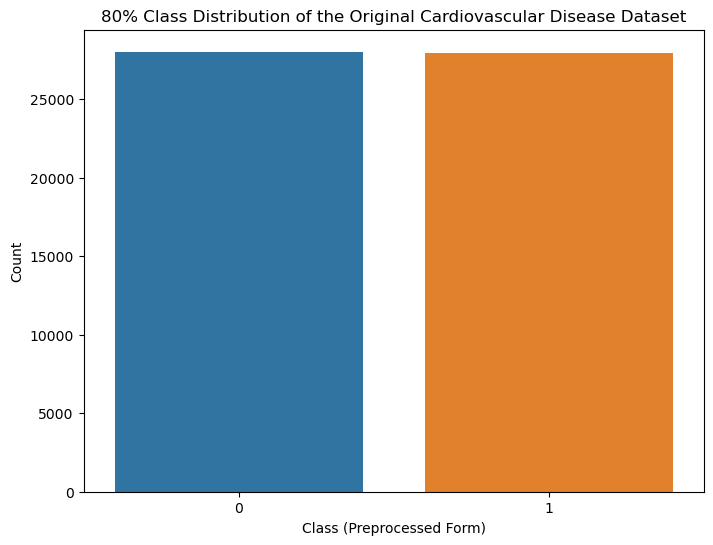

In [154]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = cardiovascular_train_dataframe['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class (Preprocessed Form)')
plt.ylabel('Count')
plt.title('80% Class Distribution of the Original Cardiovascular Disease Dataset')
plt.show()

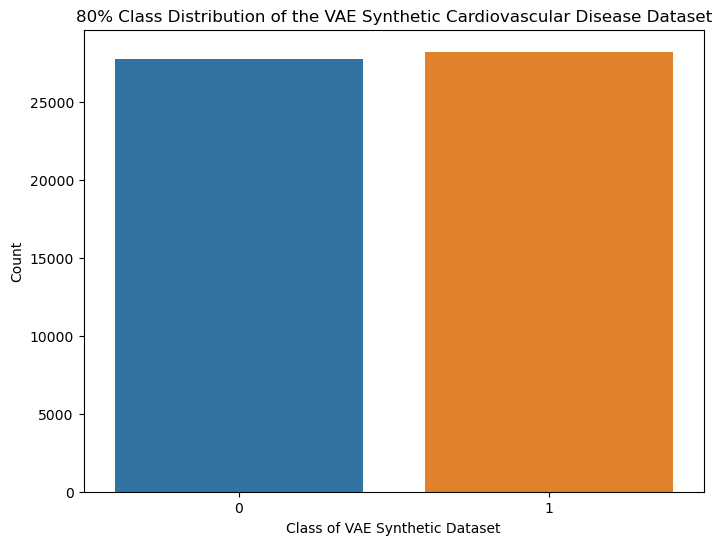

In [153]:
import matplotlib.pyplot as plt
# Assuming 'Class_att' is your target column
class_counts = vae_synthetic_cardio_data_labels_df_newest['cardio'].value_counts()

# Create a bar plot
plt.figure(figsize=(8, 6))
sns.barplot(x=class_counts.index, y=class_counts.values)
plt.xlabel('Class of VAE Synthetic Dataset')
plt.ylabel('Count')
plt.title('80% Class Distribution of the VAE Synthetic Cardiovascular Disease Dataset')
plt.show()

In [27]:
from sklearn.model_selection import train_test_split

featuresORIG = cardiovascular_train_dataframe.drop('cardio', axis=1)
labelsORIG = cardiovascular_train_dataframe['cardio']

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_orig shape:", X_train_orig.shape)
print("X_test_orig shape:", X_test_orig.shape)
print("y_train_orig shape:", y_train_orig.shape)
print("y_test_orig shape:", y_test_orig.shape)

X_train_orig shape: (44800, 11)
X_test_orig shape: (11200, 11)
y_train_orig shape: (44800,)
y_test_orig shape: (11200,)


In [29]:
#control_cardio_dataframe

from sklearn.model_selection import train_test_split

featuresCONT = control_cardio_dataframe.drop('cardio', axis=1)
labelsCONT = control_cardio_dataframe['cardio']

# Split the original dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_cont shape:", X_train_cont.shape)
print("X_test_cont shape:", X_test_cont.shape)
print("y_train_cont shape:", y_train_cont.shape)
print("y_test_cont shape:", y_test_cont.shape)

X_train_cont shape: (11200, 11)
X_test_cont shape: (2800, 11)
y_train_cont shape: (11200,)
y_test_cont shape: (2800,)


In [24]:
featuresVAE = vae_synthetic_cardio_data_labels_df.drop('cardio', axis=1)
labelsVAE = vae_synthetic_cardio_data_labels_df['cardio']


# Split the dataset into training and testing sets
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)

# vae_synthetic_cardio_data_labels_df

# Confirm the shapes
print("X_train_syn_vae shape:", X_train_syn_vae.shape)
print("X_test_syn_vae shape:", X_test_syn_vae.shape)
print("y_train_syn_vae shape:", y_train_syn_vae.shape)
print("y_test_syn_vae shape:", y_test_syn_vae.shape)

X_train_syn_vae shape: (44800, 11)
X_test_syn_vae shape: (11200, 11)
y_train_syn_vae shape: (44800,)
y_test_syn_vae shape: (11200,)


In [33]:
# Split the synthetic dataset
X_train_syn, X_test_syn, y_train_syn, y_test_syn = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_series, test_size=0.2, random_state=42)

# Confirm the shapes
print("X_train_syn shape:", X_train_syn.shape)
print("X_test_syn shape:", X_test_syn.shape)
print("y_train_syn shape:", y_train_syn.shape)
print("y_test_syn shape:", y_test_syn.shape)

X_train_syn shape: (44800, 11)
X_test_syn shape: (11200, 11)
y_train_syn shape: (44800,)
y_test_syn shape: (11200,)


# MICRO-AVERAGE ROC CURVES

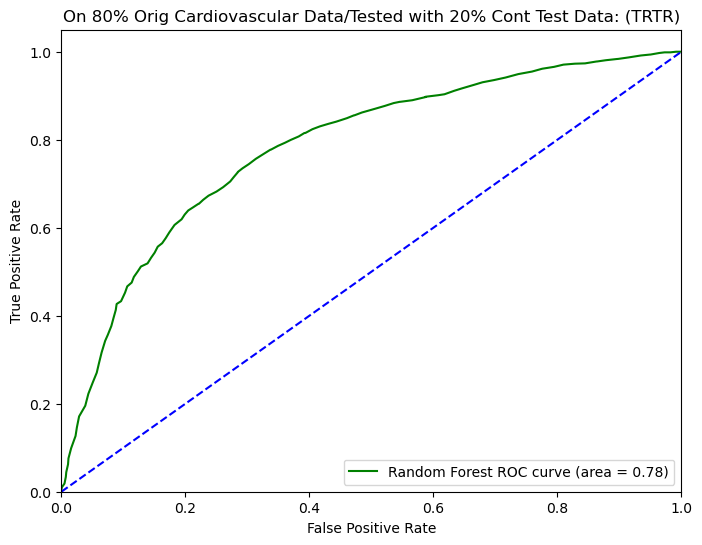

In [30]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Sample data preparation steps (replace with your actual DataFrame names)
# Recall 'featuresORIG' and 'labelsORIG' are our original dataset features and labels above
# Recall 'featuresCONT' and 'labelsCONT' are our control (or synthetic) dataset features and labels above

# Split the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)

# Split the control dataset
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)

# Initialize and train the RandomForestClassifier on the original dataset
classifier = RandomForestClassifier(random_state=42)
classifier.fit(X_train_orig, y_train_orig)

# Predict probabilities on the control dataset
y_score = classifier.predict_proba(X_test_cont)

# Compute ROC curve and ROC area for the positive class
fpr, tpr, _ = roc_curve(y_test_cont, y_score[:, 1])  # Assuming the positive class is labeled as '1'
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='green', label='Random Forest ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='blue', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('On 80% Orig Cardiovascular Data/Tested with 20% Cont Test Data: (TRTR)')
plt.legend(loc="lower right")
plt.show()


# Computational and Graphical Representations of AUC-ROC Curves by Classifiers

In [ ]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# 2. Define Data Splits for Original and Control Datasets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)

# 3. Scale the Data
scaler = StandardScaler()
X_train_syn_vae_scaled = scaler.fit_transform(X_train_syn_vae)
X_test_syn_vae_scaled = scaler.transform(X_test_syn_vae)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)

# Assuming featuresCONT and labelsCONT are your control dataset and its corresponding labels
X_original_scaled = scaler.transform(featuresORIG)

# 4. Split and Scale the Synthetic Dataset
X_train_orig_scaled, X_test_orig_scaled, y_train_orig, y_test_orig = train_test_split(X_original_scaled, labelsORIG, test_size=0.2, random_state=42)



# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

# 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# 7. Plot AUC-ROC Curves for Models Trained on Synthetic and Real Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_syn_vae_scaled, y_train_syn_vae, X_test_cont_scaled, y_test_cont, "VAE-Synthetic Cardiovascular Disease") #TSTR
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Cardiovascular Disease") #TRTR
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves TSTR')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 22392, number of negative: 22408
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002234 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499821 -> initscore=-0.000714
[LightGBM] [Info] Start training from score -0.000714
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gai

C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


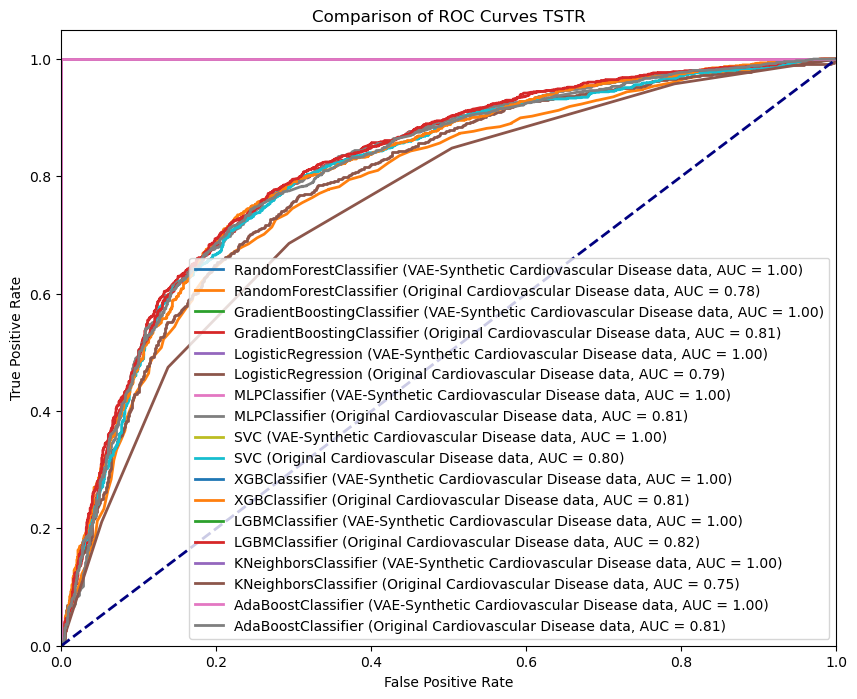

In [31]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier


# 2. Define Data Splits for Original and Control Datasets
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(featuresVAE, labelsVAE, test_size=0.2, random_state=42)

# 3. Scale the Data
scaler = StandardScaler()
X_train_syn_vae_scaled = scaler.fit_transform(X_train_syn_vae)
X_test_syn_vae_scaled = scaler.transform(X_test_syn_vae)
X_train_cont_scaled = scaler.transform(X_train_cont)
X_test_cont_scaled = scaler.transform(X_test_cont)

# Assuming featuresCONT and labelsCONT are your control dataset and its corresponding labels
X_original_scaled = scaler.transform(featuresORIG)

# 4. Split and Scale the Synthetic Dataset
X_train_orig_scaled, X_test_orig_scaled, y_train_orig, y_test_orig = train_test_split(X_original_scaled, labelsORIG, test_size=0.2, random_state=42)



# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

# 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# 7. Plot AUC-ROC Curves for Models Trained on Synthetic and Real Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_syn_vae_scaled, y_train_syn_vae, X_test_cont_scaled, y_test_cont, "VAE-Synthetic Cardiovascular Disease") #TSTR
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Cardiovascular Disease") #TRTR
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Comparison of ROC Curves TSTR')
plt.legend(loc="lower right")
plt.show()


[LightGBM] [Info] Number of positive: 22315, number of negative: 22485
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001352 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 699
[LightGBM] [Info] Number of data points in the train set: 44800, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[LightGBM] [Info] Start training from score -0.007589


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


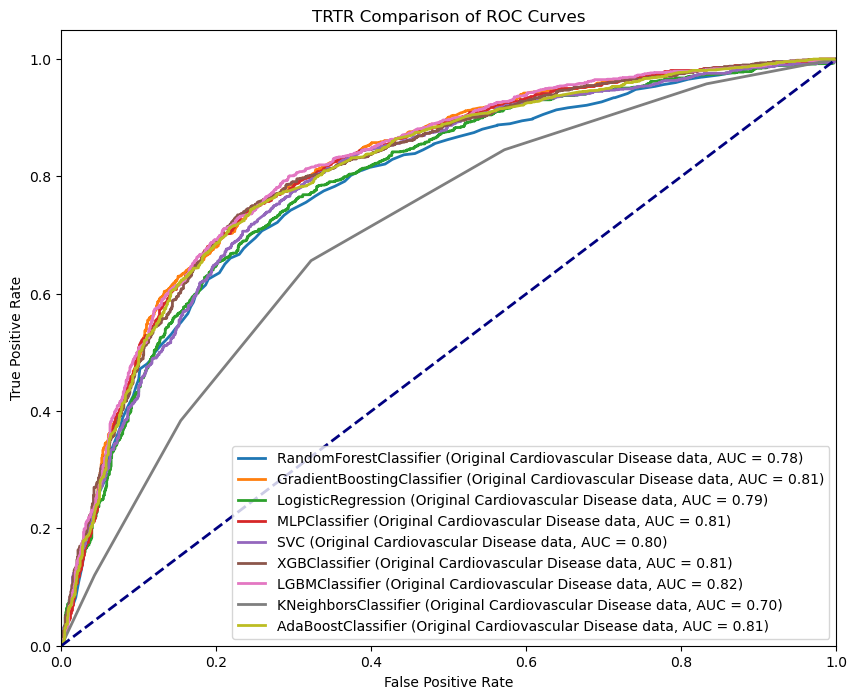

In [32]:
# 1. Import Necessary Libraries
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier

# 2. Define Data Splits for Original Dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG, labelsORIG, test_size=0.2, random_state=42)
X_train_cont, X_test_cont, y_train_cont, y_test_cont = train_test_split(featuresCONT, labelsCONT, test_size=0.2, random_state=42)



# 3. Scale the Data
scaler = StandardScaler()
X_train_orig_scaled = scaler.fit_transform(X_train_orig)
X_test_cont_scaled = scaler.transform(X_test_cont)

# 5. Define the `plot_auc_roc` Function
def plot_auc_roc(model, X_train, y_train, X_test, y_test, data_type):
    model.fit(X_train, y_train)
    if hasattr(model, "predict_proba"):
        y_pred_proba = model.predict_proba(X_test)[:, 1]
    elif hasattr(model, "decision_function"):
        y_pred_proba = model.decision_function(X_test)
    else:
        raise AttributeError(f"{model.__class__.__name__} does not have predict_proba or decision_function.")
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, lw=2, label=f'{model.__class__.__name__} ({data_type} data, AUC = {roc_auc:.2f})')

# 6. Define Models
models = {
    "RandomForestClassifier": RandomForestClassifier(),
    "GradientBoostingClassifier": GradientBoostingClassifier(),
    "LogisticRegression": LogisticRegression(),
    "MLPClassifier": MLPClassifier(),
    "SVC": SVC(probability=True),
    "XGBClassifier": XGBClassifier(),
    "LGBMClassifier": LGBMClassifier(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "AdaBoostClassifier": AdaBoostClassifier()
}

# 7. Plot AUC-ROC Curves for Models Trained on Original Data
plt.figure(figsize=(10, 8))
for name, model in models.items():
    plot_auc_roc(model, X_train_orig_scaled, y_train_orig, X_test_cont_scaled, y_test_cont, "Original Cardiovascular Disease")

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('TRTR Comparison of ROC Curves')
plt.legend(loc="lower right")
plt.show()


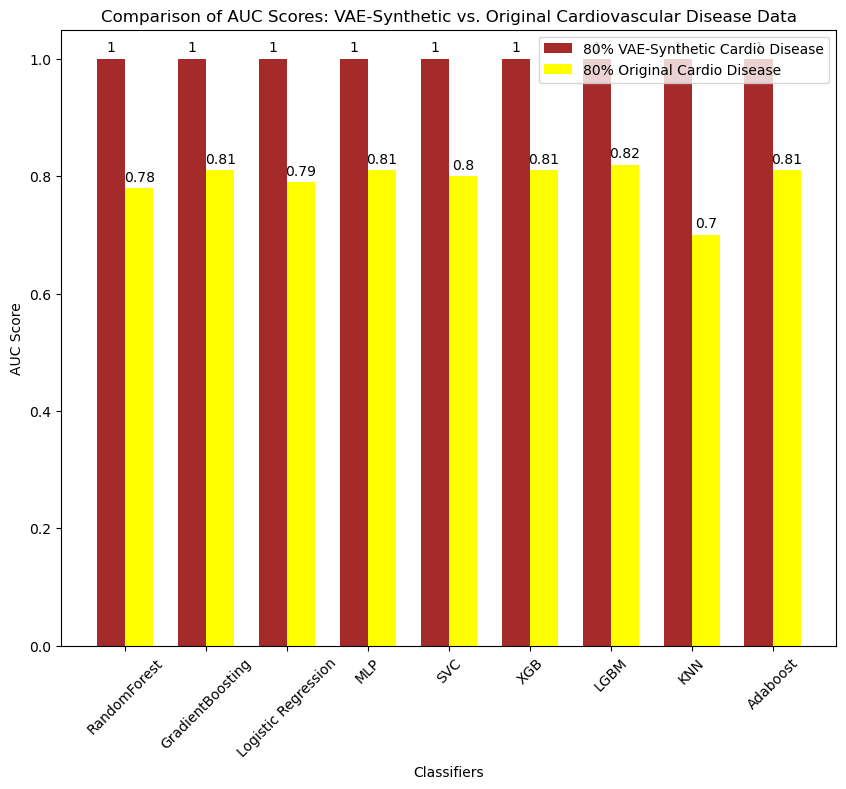

In [157]:
import matplotlib.pyplot as plt
import numpy as np

# Classifiers and their corresponding AUC scores for synthetic and original data
classifiers = ['RandomForest', 'GradientBoosting', 'Logistic Regression', 'MLP', 'SVC', 'XGB', 'LGBM', 'KNN', 'Adaboost']
synth_auc = [1.00] * 9
orig_auc = [0.78, 0.81, 0.79, 0.81, 0.80, 0.81, 0.82, 0.70, 0.81]

x = np.arange(len(classifiers))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, synth_auc, width, label='80% VAE-Synthetic Cardio Disease', color='brown')
rects2 = ax.bar(x + width/2, orig_auc, width, label='80% Original Cardio Disease', color='yellow')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('AUC Score')
ax.set_title('Comparison of AUC Scores: VAE-Synthetic vs. Original Cardiovascular Disease Data')
ax.set_xticks(x)
ax.set_xticklabels(classifiers)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.xticks(rotation=45)
plt.show()


# COMPUTING CROSS-VALIDATION OF ORIGINAL AND VAE-SYNTHETIC CARDIOVASCULAR DISEASE DATASETS

In [34]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# vae_synthetic_data_df
# vae_synthetic_labels_series.


# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
vae_synthetic_labels_ae_encoded = le.fit_transform(vae_synthetic_labels_series)

# Splitting the dataset
X_train_syn_vae, X_test_syn_vae, y_train_syn_vae, y_test_syn_vae = train_test_split(vae_synthetic_data_df, vae_synthetic_labels_ae_encoded, test_size=0.2, random_state=42)

# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_syn_vae, y_train_syn_vae, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = 1.0000, Std = 0.0001
GradientBoostingClassifier: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = 1.0000, Std = 0.0001
RandomForestClassifier: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = 1.0000, Std = 0.0000


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for 80% VAE-Synthetic Cardiovascular Disease = 1.0000, Std = 0.0000
[LightGBM] [Info] Number of positive: 17913, number of negative: 17927
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001427 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499805 -> initscore=-0.000781
[LightGBM] [Info] Start training from score -0.000781
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No fu

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

[LightGBM] [Info] Number of positive: 17914, number of negative: 17926
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.001413 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499833 -> initscore=-0.000670
[LightGBM] [Info] Start training from score -0.000670
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gai

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No f

In [36]:
from sklearn.model_selection import cross_val_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, AdaBoostClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Convert categorical columns to numeric codes for the entire dataset
featuresORIG_num = featuresORIG.copy()
for col in featuresORIG.select_dtypes(include=['category']).columns:
    featuresORIG_num[col] = featuresORIG[col].cat.codes
    
# Assuming final_synthetic_df and final_synthetic_labels are your features and labels DataFrames
# Encoding categorical labels if necessary
le = LabelEncoder()
original_labels_encoded = le.fit_transform(labelsORIG)


# Proceed with your original process by Splitting the original dataset
X_train_orig, X_test_orig, y_train_orig, y_test_orig = train_test_split(featuresORIG_num, original_labels_encoded, test_size=0.2, random_state=42)


# List of classifiers to evaluate
classifiers = [
    DecisionTreeClassifier(random_state=2),
    GradientBoostingClassifier(random_state=2),
    RandomForestClassifier(n_estimators=100, random_state=2),
    AdaBoostClassifier(random_state=2),
    LGBMClassifier(random_state=2),
    XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=2),
    KNeighborsClassifier(),
    LogisticRegression(max_iter=1000, random_state=2),
    SVC(random_state=2),
    MLPClassifier(max_iter=1000, random_state=2)
]

# Evaluate each classifier
for clf in classifiers:
    cv_scores = cross_val_score(clf, X_train_orig, y_train_orig, cv=5, scoring='accuracy')
    mean_cv_score = np.mean(cv_scores)
    std_cv_score = np.std(cv_scores)
    print(f"{clf.__class__.__name__}: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= {mean_cv_score:.4f}, Std = {std_cv_score:.4f}")


DecisionTreeClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.6349, Std = 0.0032
GradientBoostingClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7338, Std = 0.0021
RandomForestClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7143, Std = 0.0020


C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(
C:\Users\Ede\anacond

AdaBoostClassifier: Mean CV Accuracy for 80% Original Cardiovascular Disease Data= 0.7279, Std = 0.0033
[LightGBM] [Info] Number of positive: 17852, number of negative: 17988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001296 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 663
[LightGBM] [Info] Number of data points in the train set: 35840, number of used features: 11
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.498103 -> initscore=-0.007589
[LightGBM] [Info] Start training from score -0.007589
[LightGBM] [Info] Number of positive: 17852, number of negative: 17988
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001178 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 667
[LightGBM

# GRAPHICAL REPRESENTATION OF THE ABOVE MEAN CV OF ORIGINAL AND SYNTHETIC DATASETS

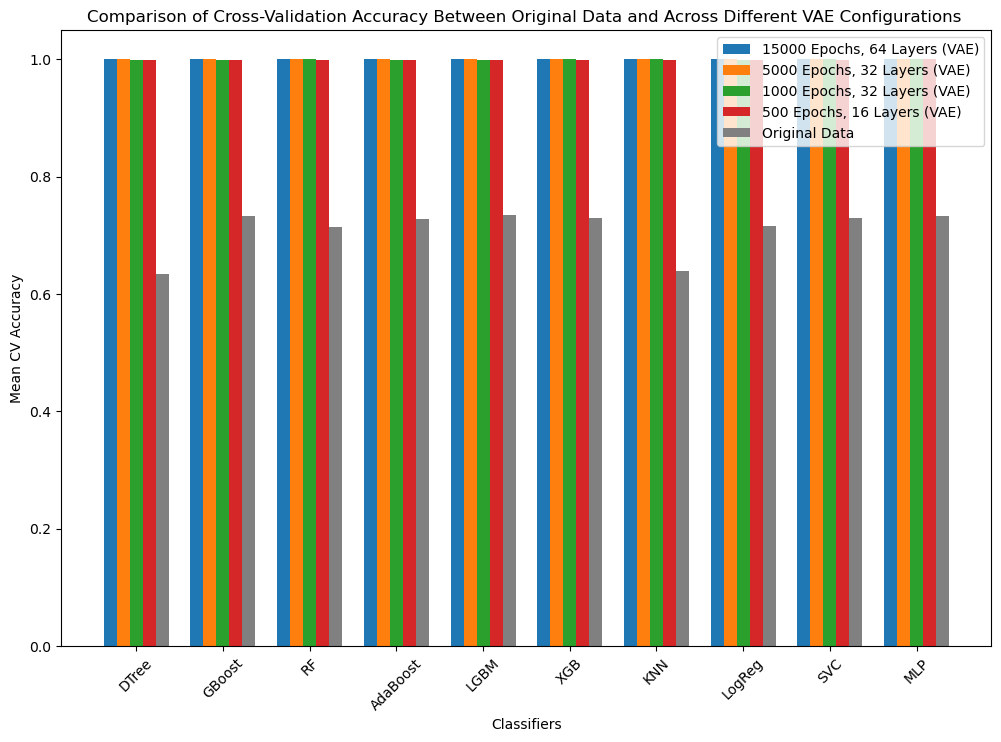

In [63]:
import matplotlib.pyplot as plt
import numpy as np

# Data for synthetic datasets
classifiers = ['DTree', 'GBoost', 'RF', 'AdaBoost', 'LGBM', 'XGB', 'KNN', 'LogReg', 'SVC', 'MLP']
epochs_15000 = [1.0000] * 10
epochs_5000 = [1.0000] * 10
epochs_1000 = [0.9998, 0.9999, 1.0000, 0.9999, 0.9999, 1.0000, 1.0000, 0.9999, 1.0000, 1.0000]
epochs_500 = [0.9996, 0.9997, 0.9997, 0.9999, 0.9998, 0.9998, 0.9999, 0.9998, 0.9999, 1.0000]

# Data for original dataset
original_data = [0.6349, 0.7338, 0.7143, 0.7279, 0.7352, 0.7293, 0.6395, 0.7158, 0.7291, 0.7324]

x = np.arange(len(classifiers))  # the label locations
width = 0.15  # the width of the bars

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - 2*width, epochs_15000, width, label='15000 Epochs, 64 Layers (VAE)')
rects2 = ax.bar(x - width, epochs_5000, width, label='5000 Epochs, 32 Layers (VAE)')
rects3 = ax.bar(x, epochs_1000, width, label='1000 Epochs, 32 Layers (VAE)')
rects4 = ax.bar(x + width, epochs_500, width, label='500 Epochs, 16 Layers (VAE)')
rects5 = ax.bar(x + 2*width, original_data, width, label='Original Data', color='grey')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Classifiers')
ax.set_ylabel('Mean CV Accuracy')
ax.set_title('Comparison of Cross-Validation Accuracy Between Original Data and Across Different VAE Configurations ')
ax.set_xticks(x)
ax.set_xticklabels(classifiers, rotation=45) 
ax.legend()

plt.show() 


# Computing Numerical Statistical Values: KS-Test, P-Value, MSE, RMSE, MAE, F-Test for Variances, T-Test for Means

In [48]:
from scipy.stats import chi2_contingency

# Example for binary data using Chi-Squared Test
for column in categorical_columns:
    contingency_table = pd.crosstab(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    print(f"Chi-Squared Test for {column}: Stat={chi2_stat}, P-value={p_val}")

# RESULT:
Chi-Squared Test for gender: Stat=0.43313009645350575, P-value=0.5104570410398108
Chi-Squared Test for cholesterol: Stat=0.46716413474815704, P-value=0.9766178200635366
Chi-Squared Test for gluc: Stat=4.889720754221271, P-value=0.29880114234940397
Chi-Squared Test for smoke: Stat=8.508480688089334, P-value=0.003534950838062347
Chi-Squared Test for alco: Stat=6.661883760754614, P-value=0.00984967406259217
Chi-Squared Test for active: Stat=0.0, P-value=1.0

Chi-Squared Test for gender: Stat=0.43313009645350575, P-value=0.5104570410398108
Chi-Squared Test for cholesterol: Stat=0.46716413474815704, P-value=0.9766178200635366
Chi-Squared Test for gluc: Stat=4.889720754221271, P-value=0.29880114234940397
Chi-Squared Test for smoke: Stat=8.508480688089334, P-value=0.003534950838062347
Chi-Squared Test for alco: Stat=6.661883760754614, P-value=0.00984967406259217
Chi-Squared Test for active: Stat=0.0, P-value=1.0


In [54]:
# Convert integer columns to categorical for chi-squared tests
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']  # Assuming these are all categorical columns

# Convert these columns to 'category' dtype
for column in categorical_columns:
    cardiovascular_train_dataframe[column] = cardiovascular_train_dataframe[column].astype('category')
    vae_synthetic_cardio_data_labels_df[column] = vae_synthetic_cardio_data_labels_df[column].astype('category')

# Perform Chi-Squared Test for each categorical feature
results = []
for column in categorical_columns:
    # Create contingency table
    contingency_table = pd.crosstab(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
    # Perform Chi-Squared test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)
    # Store the results
    results.append({
        'Feature': column,
        'Chi-Squared Stat': chi2_stat,
        'P-value': p_val,
        'Degrees of Freedom': dof
    })

# Convert results to a DataFrame for easy viewing or export
results_df = pd.DataFrame(results)
print(results_df)


       Feature  Chi-Squared Stat   P-value  Degrees of Freedom
0       gender          0.433130  0.510457                   1
1  cholesterol          0.467164  0.976618                   4
2         gluc          4.889721  0.298801                   4
3        smoke          8.508481  0.003535                   1
4         alco          6.661884  0.009850                   1
5       active          0.000000  1.000000                   0
6       cardio          0.064688  0.799234                   1


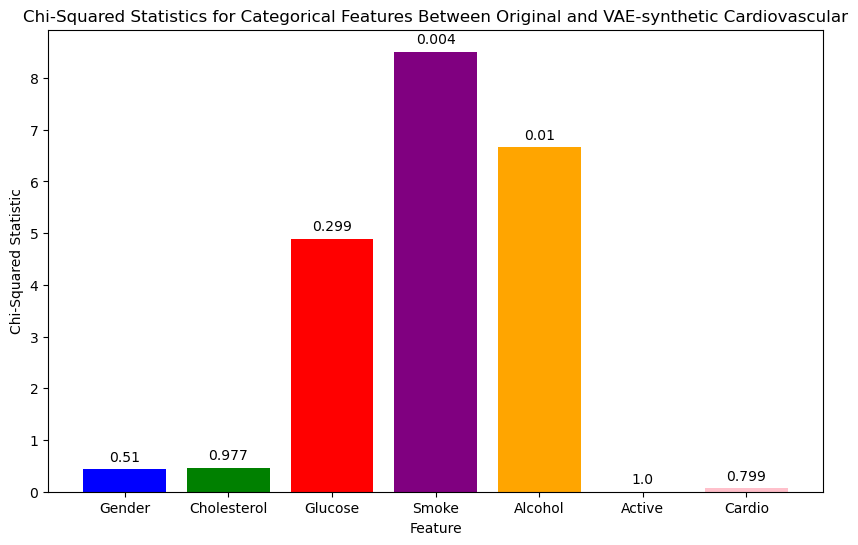

In [57]:
import matplotlib.pyplot as plt
import pandas as pd

# Data for plotting
data = {
    "Feature": ["Gender", "Cholesterol", "Glucose", "Smoke", "Alcohol", "Active", "Cardio"],
    "Chi-Squared Stat": [0.433, 0.467, 4.890, 8.508, 6.662, 0.000, 0.065],
    "P-value": [0.510, 0.977, 0.299, 0.004, 0.010, 1.000, 0.799],
    "Degrees of Freedom": [1, 4, 4, 1, 1, 0, 1]
}

df = pd.DataFrame(data)

# Plotting
plt.figure(figsize=(10, 6))
bars = plt.bar(df['Feature'], df['Chi-Squared Stat'], color=['blue', 'green', 'red', 'purple', 'orange', 'yellow', 'pink'])
plt.xlabel('Feature')
plt.ylabel('Chi-Squared Statistic')
plt.title('Chi-Squared Statistics for Categorical Features Between Original and VAE-synthetic Cardiovascular')

# Adding the p-values above the bars
for bar, p_value in zip(bars, df['P-value']):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval + 0.1, round(p_value, 3), ha='center', va='bottom')

plt.show()


In [37]:
from sklearn.metrics import accuracy_score

# Results list to hold all metric results
results = []

# Calculate metrics for each feature
for column in vae_synthetic_cardio_data_labels_df.columns.drop('cardio'):  # Exclude target label
    if column in ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']:  # Categorical columns
        # Calculate accuracy and other classification metrics
        accuracy = accuracy_score(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
        results.append({
            'Feature': column,
            'Accuracy': accuracy * 100  # Convert to percentage
        })
    else:  # Continuous columns
        mse = mean_squared_error(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
        rmse = np.sqrt(mse)
        mae = mean_absolute_error(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
        results.append({
            'Feature': column,
            'MSE': mse,
            'RMSE': rmse,
            'MAE': mae
        })

# Convert results to DataFrame and print
results_df = pd.DataFrame(results)
print(results_df)


        Feature       MSE      RMSE       MAE   Accuracy
0           age  0.038765  0.196888  0.163290        NaN
1        gender       NaN       NaN       NaN  54.167857
2        height  0.001936  0.043999  0.034097        NaN
3        weight  0.006796  0.082441  0.063895        NaN
4         ap_hi  0.000110  0.010508  0.001255        NaN
5         ap_lo  0.000325  0.018028  0.002907        NaN
6   cholesterol       NaN       NaN       NaN  60.371429
7          gluc       NaN       NaN       NaN  76.985714
8         smoke       NaN       NaN       NaN  85.994643
9          alco       NaN       NaN       NaN  92.880357
10       active       NaN       NaN       NaN  80.376786


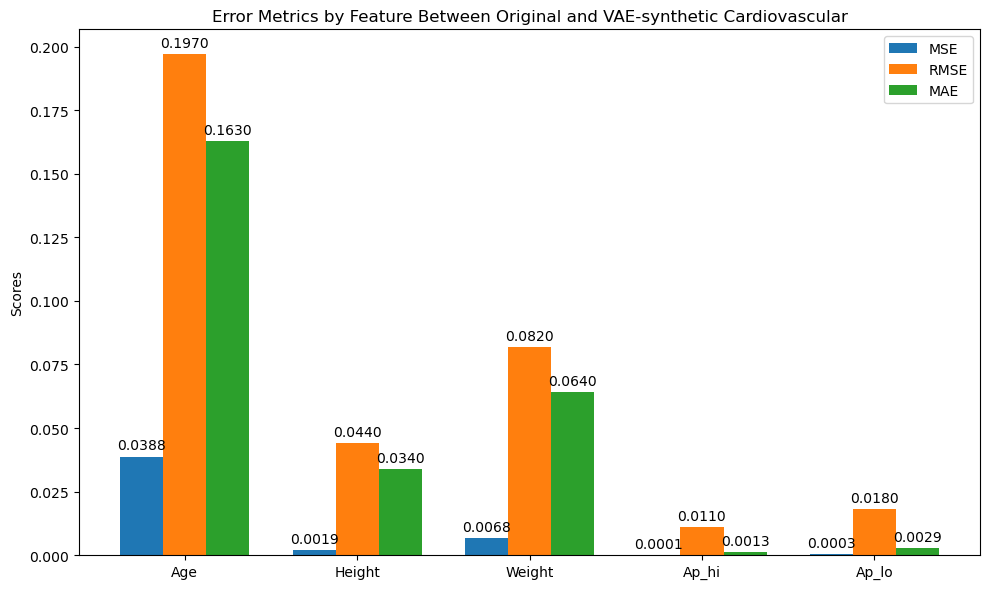

In [59]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
features = ['Age', 'Height', 'Weight', 'Ap_hi', 'Ap_lo']
mse_values = [0.0388, 0.0019, 0.0068, 0.0001, 0.0003]
rmse_values = [0.197, 0.044, 0.082, 0.011, 0.018]
mae_values = [0.163, 0.034, 0.064, 0.0013, 0.0029]

# Setup the bar width and positions
x = np.arange(len(features))  # the label locations
width = 0.25  # the width of the bars

#plt.figure(figsize=(10, 6))
fig, ax = plt.subplots(figsize=(10, 6))
rects1 = ax.bar(x - width, mse_values, width, label='MSE')
rects2 = ax.bar(x, rmse_values, width, label='RMSE')
rects3 = ax.bar(x + width, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Scores')
ax.set_title('Error Metrics by Feature Between Original and VAE-synthetic Cardiovascular')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

# Add a function to display the labels on the bars
def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate(f'{height:.4f}',
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()


In [75]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np


categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Initialize Label Encoder
le = LabelEncoder()

# Apply Label Encoding to each categorical column
for col in categorical_columns:
    combined_data = pd.concat([vae_synthetic_cardio_data_labels_df[col], cardiovascular_train_dataframe[col]], axis=0)
    le.fit(combined_data)  # Fit on combined data to ensure all categories are covered
    vae_synthetic_cardio_data_labels_df[col] = le.transform(vae_synthetic_cardio_data_labels_df[col])
    cardiovascular_train_dataframe[col] = le.transform(cardiovascular_train_dataframe[col])

# Assuming you've already split your datasets into features and labels if necessary
# Now you can proceed with statistical analyses

results = []

for column in vae_synthetic_cardio_data_labels_df.columns.drop('cardio'):  # Assuming 'cardio' is the label column
    # Compute KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])

    # Compute MSE, RMSE, and MAE
    mse = mean_squared_error(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])

    # Compute F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])
    t_stat, t_pvalue = ttest_ind(cardiovascular_train_dataframe[column], vae_synthetic_cardio_data_labels_df[column])

    # Collect results
    results.append({
        'Feature': column,
        'KS Stat': ks_stat,
        'KS P-Value': ks_pvalue,
        'MSE': mse,
        'RMSE': rmse,
        'MAE': mae,
        'F-Test Stat': f_stat,
        'F-Test P-Value': f_pvalue,
        'T-Test Stat': t_stat,
        'T-Test P-Value': t_pvalue,
    })

results_df = pd.DataFrame(results)
print(results_df)

        Feature   KS Stat  KS P-Value           MSE          RMSE  \
0           age  0.423321         0.0  1.058117e+00      1.028648   
1        gender  0.650018         0.0  1.016086e+09  31876.104421   
2        height  0.324554         0.0  1.131754e+00      1.063839   
3        weight  0.395232         0.0  1.043505e+00      1.021521   
4         ap_hi  0.306839         0.0  9.355585e-01      0.967243   
5         ap_lo  0.620357         0.0  1.109565e+00      1.053359   
6   cholesterol  0.748393         0.0  1.032383e+09  32130.711567   
7          gluc  0.850339         0.0  1.026400e+09  32037.471834   
8         smoke  0.911250         0.0  1.041199e+09  32267.620146   
9          alco  0.945161         0.0  1.035659e+09  32181.649285   
10       active  0.803768         0.0  1.013707e+09  31838.764597   

             MAE   F-Test Stat  F-Test P-Value  T-Test Stat  T-Test P-Value  
0       0.854079      2.983396    8.412537e-02     1.727251    8.412537e-02  
1   27541.04189

In [76]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from scipy.stats import ks_2samp, f_oneway, ttest_ind
from sklearn.metrics import mean_squared_error, mean_absolute_error
import numpy as np

# Define datasets
original_data = cardiovascular_train_dataframe
synthetic_data = vae_synthetic_cardio_data_labels_df

# Identify categorical columns
categorical_columns = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

# Initialize Label Encoder and encode categorical columns
le = LabelEncoder()
for col in categorical_columns:
    combined_data = pd.concat([synthetic_data[col], original_data[col]])
    le.fit(combined_data)
    synthetic_data[col] = le.transform(synthetic_data[col])
    original_data[col] = le.transform(original_data[col])

# Initialize the results list
results = []

# Calculate statistical measures for each feature, excluding the 'cardio' label
for column in synthetic_data.columns.drop('cardio'):
    # KS Test and P-Value
    ks_stat, ks_pvalue = ks_2samp(original_data[column], synthetic_data[column])

    # Mean Squared Error, Root Mean Squared Error, and Mean Absolute Error
    mse = mean_squared_error(original_data[column], synthetic_data[column])
    rmse = np.sqrt(mse)
    mae = mean_absolute_error(original_data[column], synthetic_data[column])

    # F-Test and T-Test for comparing variances and means
    f_stat, f_pvalue = f_oneway(original_data[column], synthetic_data[column])
    t_stat, t_pvalue = ttest_ind(original_data[column], synthetic_data[column])

    # Append results
    results.append({
        'Feature': column,
        'Original vs. Synthetic KS Stat': ks_stat,
        'Original vs. Synthetic KS P-Value': ks_pvalue,
        'Original vs. Synthetic MSE': mse,
        'Original vs. Synthetic RMSE': rmse,
        'Original vs. Synthetic MAE': mae,
        'Original vs. Synthetic F-Test Stat': f_stat,
        'Original vs. Synthetic F-Test P-Value': f_pvalue,
        'Original vs. Synthetic T-Test Stat': t_stat,
        'Original vs. Synthetic T-Test P-Value': t_pvalue,
    })

# Create DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)


        Feature  Original vs. Synthetic KS Stat  \
0           age                        0.423321   
1        gender                        0.650018   
2        height                        0.324554   
3        weight                        0.395232   
4         ap_hi                        0.306839   
5         ap_lo                        0.620357   
6   cholesterol                        0.748393   
7          gluc                        0.850339   
8         smoke                        0.911250   
9          alco                        0.945161   
10       active                        0.803768   

    Original vs. Synthetic KS P-Value  Original vs. Synthetic MSE  \
0                                 0.0                1.058117e+00   
1                                 0.0                1.016086e+09   
2                                 0.0                1.131754e+00   
3                                 0.0                1.043505e+00   
4                                 0.0     

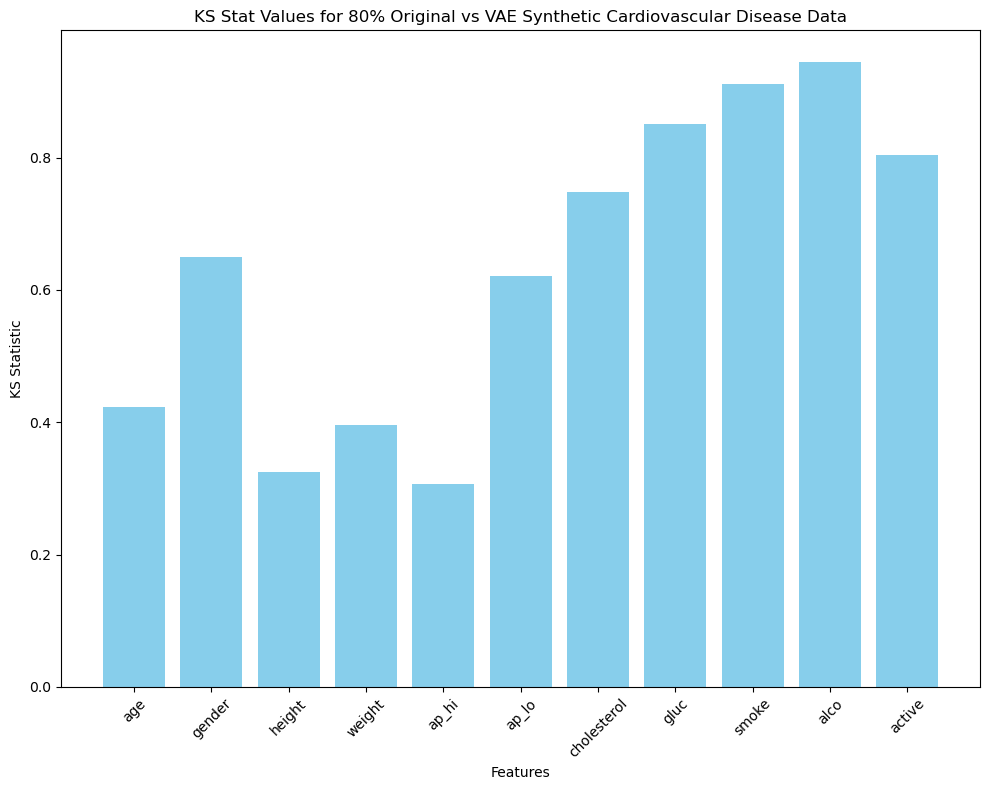

In [151]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
ks_stat = [0.423321, 0.650018, 0.324554, 0.395232, 0.306839, 0.620357, 0.748393, 0.850339, 0.911250, 0.945161, 0.803768]
f_test_stat = [2.983396, 3762.600478, 97.330783, 0.044941, 0.135108, 4.886354, 12646.419133, 32456.658245, 57672.041989, 81915.040224, 21532.619358]
t_test_p_values = [0.08412537, 0.0, 0.0005994006, 0.8321138, 0.7131946, 0.02707181, 0.0, 0.0, 0.0, 0.0, 0.0]
mse_values = [1.058117e+00, 1.016086e+09, 1.131754e+00, 1.043505e+00, 9.355585e-01, 1.109565e+00, 1.032383e+09, 1.026400e+09, 1.041199e+09, 1.035659e+09, 1.013707e+09]
rmse_values = [1.028648, 31876.104421, 1.063839, 1.021521, 0.967243, 1.053359, 32130.711567, 32037.471834, 32267.620146, 32181.649285, 31838.764597]
mae_values = [0.854079, 27541.041893, 0.826334, 0.785830, 0.127901, 0.190647, 27821.195661, 27737.962268, 27935.117554, 27866.575911, 27585.930786]

# Plotting KS Statistic
plt.figure(figsize=(10, 8))
plt.bar(features, ks_stat, color='skyblue')
plt.xlabel('Features')
plt.ylabel('KS Statistic')
plt.title('KS Stat Values for 80% Original vs VAE Synthetic Cardiovascular Disease Data')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


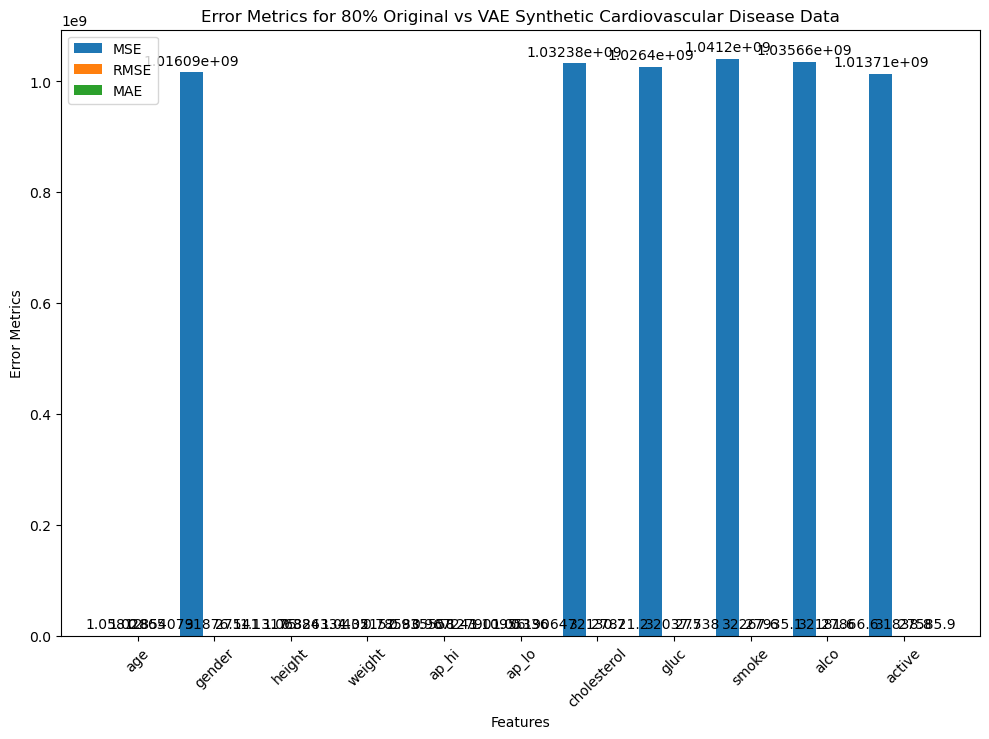

In [150]:
import matplotlib.pyplot as plt
import numpy as np

# Data for plotting
features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
ks_stat = [0.423321, 0.650018, 0.324554, 0.395232, 0.306839, 0.620357, 0.748393, 0.850339, 0.911250, 0.945161, 0.803768]
f_test_stat = [2.983396, 3762.600478, 97.330783, 0.044941, 0.135108, 4.886354, 12646.419133, 32456.658245, 57672.041989, 81915.040224, 21532.619358]
t_test_p_values = [0.08412537, 0.0, 0.0005994006, 0.8321138, 0.7131946, 0.02707181, 0.0, 0.0, 0.0, 0.0, 0.0]
mse_values = [1.058117e+00, 1.016086e+09, 1.131754e+00, 1.043505e+00, 9.355585e-01, 1.109565e+00, 1.032383e+09, 1.026400e+09, 1.041199e+09, 1.035659e+09, 1.013707e+09]
rmse_values = [1.028648, 31876.104421, 1.063839, 1.021521, 0.967243, 1.053359, 32130.711567, 32037.471834, 32267.620146, 32181.649285, 31838.764597]
mae_values = [0.854079, 27541.041893, 0.826334, 0.785830, 0.127901, 0.190647, 27821.195661, 27737.962268, 27935.117554, 27866.575911, 27585.930786]


# Plotting Error Metrics (MSE, RMSE, MAE)
x = np.arange(len(features))  # the label locations
width = 0.3  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 7))
rects1 = ax.bar(x - width, mse_values, width, label='MSE')
rects2 = ax.bar(x, rmse_values, width, label='RMSE')
rects3 = ax.bar(x + width, mae_values, width, label='MAE')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Features')
ax.set_ylabel('Error Metrics')
ax.set_title('Error Metrics for 80% Original vs VAE Synthetic Cardiovascular Disease Data')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)
ax.bar_label(rects3, padding=3)

fig.tight_layout()
plt.xticks(rotation=45)
plt.show()


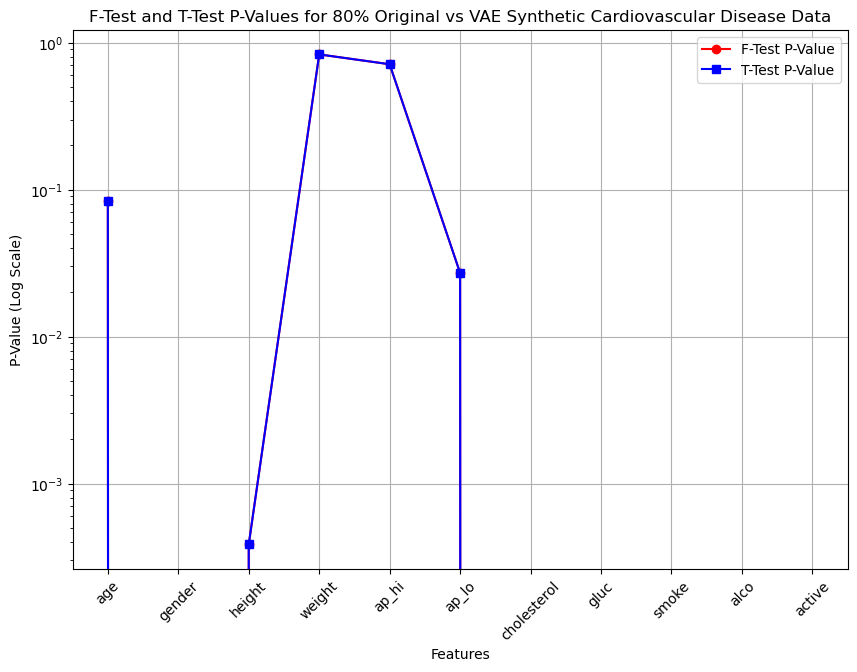

In [77]:
import matplotlib.pyplot as plt

# Extracting the correct values from the given data for the second set of tables
features = ["age", "gender", "height", "weight", "ap_hi", "ap_lo", "cholesterol", "gluc", "smoke", "alco", "active"]
f_test_p_value = [0.08412537, 0.0, 0.0003853312, 0.8321138, 0.7131946, 0.02707181, 0.0, 0.0, 0.0, 0.0, 0.0]
t_test_p_value = [0.08412537, 0.0, 0.0003853312, 0.8321139, 0.7131947, 0.02707181, 0.0, 0.0, 0.0, 0.0, 0.0]

plt.figure(figsize=(10, 7))
plt.plot(features, f_test_p_value, '-o', label='F-Test P-Value', color='red')
plt.plot(features, t_test_p_value, '-s', label='T-Test P-Value', color='blue')
plt.yscale('log')
plt.xticks(rotation=45)
plt.xlabel('Features')
plt.ylabel('P-Value (Log Scale)')
plt.title('F-Test and T-Test P-Values for 80% Original vs VAE Synthetic Cardiovascular Disease Data')
plt.legend()
plt.grid(True)
plt.show()


# CLASSIFICATION REPORT FOR 80% VAE SYNTHETIC AND ORIGINALCARDIOVASCULAR DISEASE DATA

In [86]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import classification_report

# Adjusting model complexity by limiting the depth
classifier_orig = GradientBoostingClassifier(max_depth=1000, n_estimators=1000, random_state=42)
classifier_orig.fit(X_train_orig, y_train_orig)

# Predicting on the test set
y_pred = classifier_orig.predict(X_test_cont) # TRTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred, digits=2)
print("GB on 80% Original Cardio/Tested on 20% Control Data (TRTR):\n", report)


# Adjusting model complexity by limiting the depth
classifier_syn = GradientBoostingClassifier()
classifier_syn.fit(X_train_syn_vae, y_train_syn_vae)


# Predicting on the test set
y_pred1 = classifier_syn.predict(X_test_cont) # TSTR

# Generating the classification report
report = classification_report(y_test_cont, y_pred1, digits=2)
print("GB on 80% VAE SyntheticCardio/Tested on 20% Control Data (TSTR):\n", report)


GB on 80% Original Cardio/Tested on 20% Control Data (TRTR):
               precision    recall  f1-score   support

           0       0.64      0.64      0.64      1403
           1       0.64      0.65      0.64      1397

    accuracy                           0.64      2800
   macro avg       0.64      0.64      0.64      2800
weighted avg       0.64      0.64      0.64      2800

GB on 80% VAE SyntheticCardio/Tested on 20% Control Data (TSTR):
               precision    recall  f1-score   support

           0       0.69      0.42      0.52      1403
           1       0.58      0.82      0.68      1397

    accuracy                           0.62      2800
   macro avg       0.64      0.62      0.60      2800
weighted avg       0.64      0.62      0.60      2800




Random Forest Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for Random Forest:
              precision    recall  f1-score   support

           0       0.72      0.74      0.73      1403
           1       0.73      0.71      0.72      1397

    accuracy                           0.73      2800
   macro avg       0.73      0.73      0.73      2800
weighted avg       0.73      0.73      0.73      2800



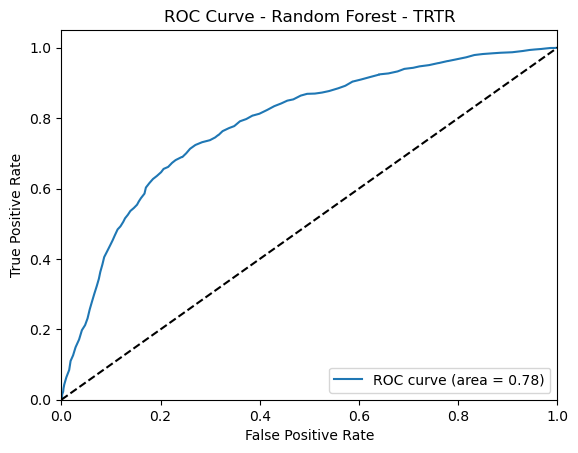

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for Random Forest:
              precision    recall  f1-score   support

           0       0.63      0.55      0.59      1403
           1       0.60      0.67      0.63      1397

    accuracy                           0.61      2800
   macro avg       0.61      0.61      0.61      2800
weighted avg       0.61      0.61      0.61      2800



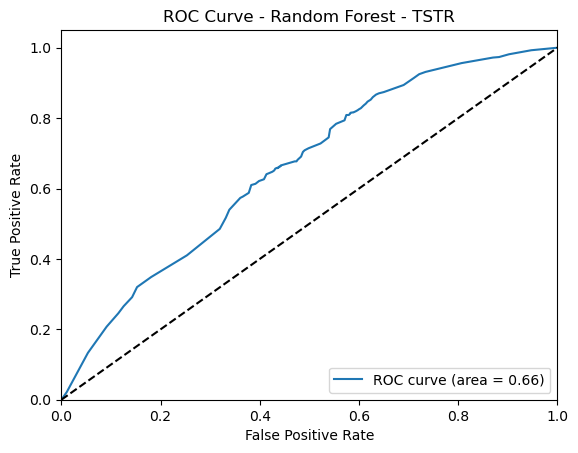


Gradient Boosting Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1403
           1       0.76      0.71      0.74      1397

    accuracy                           0.74      2800
   macro avg       0.74      0.74      0.74      2800
weighted avg       0.74      0.74      0.74      2800



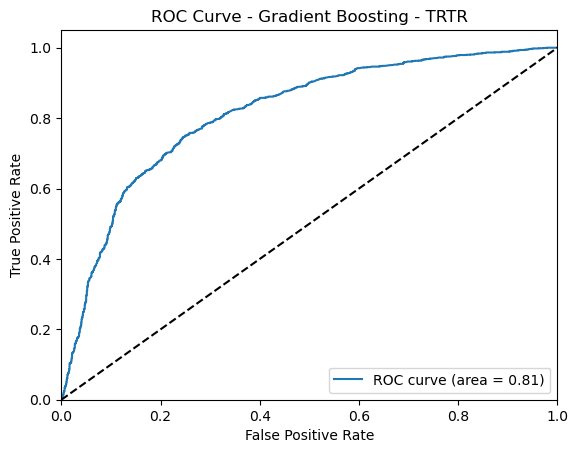

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for Gradient Boosting:
              precision    recall  f1-score   support

           0       0.69      0.42      0.52      1403
           1       0.58      0.82      0.68      1397

    accuracy                           0.62      2800
   macro avg       0.64      0.62      0.60      2800
weighted avg       0.64      0.62      0.60      2800



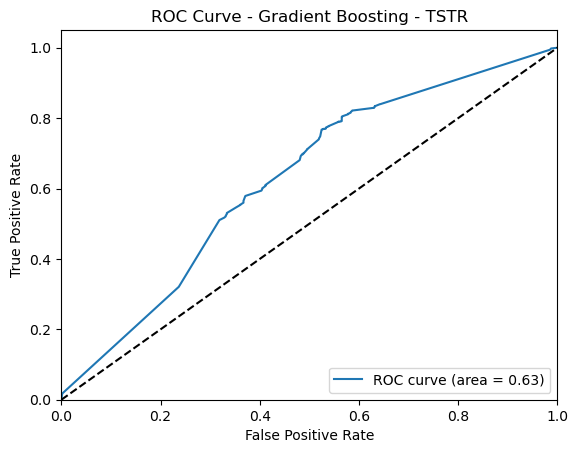


Logistic Regression Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for Logistic Regression:
              precision    recall  f1-score   support

           0       0.71      0.77      0.74      1403
           1       0.75      0.69      0.72      1397

    accuracy                           0.73      2800
   macro avg       0.73      0.73      0.73      2800
weighted avg       0.73      0.73      0.73      2800



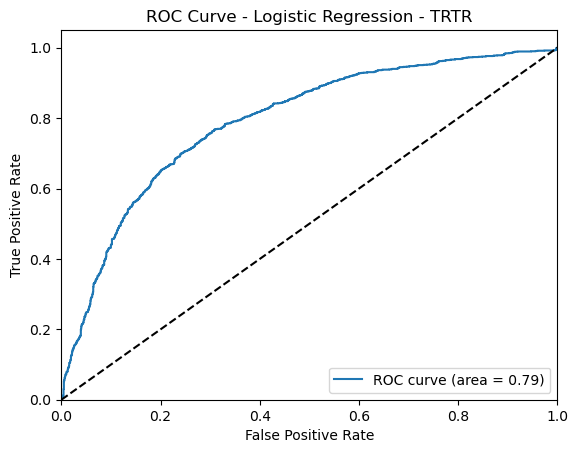

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for Logistic Regression:
              precision    recall  f1-score   support

           0       0.56      0.83      0.67      1403
           1       0.67      0.35      0.45      1397

    accuracy                           0.59      2800
   macro avg       0.61      0.59      0.56      2800
weighted avg       0.61      0.59      0.56      2800



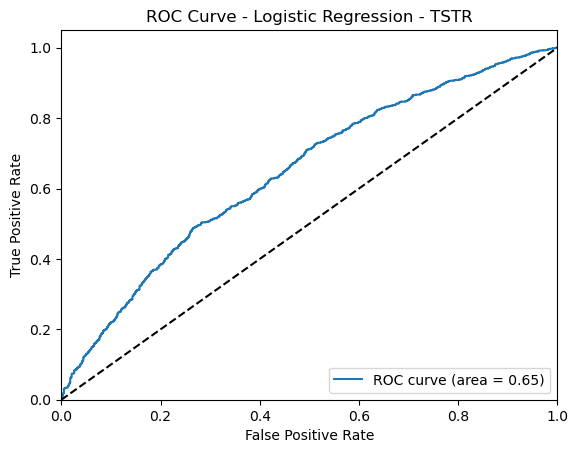


SVC Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for SVC:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1403
           1       0.75      0.71      0.73      1397

    accuracy                           0.74      2800
   macro avg       0.74      0.74      0.74      2800
weighted avg       0.74      0.74      0.74      2800



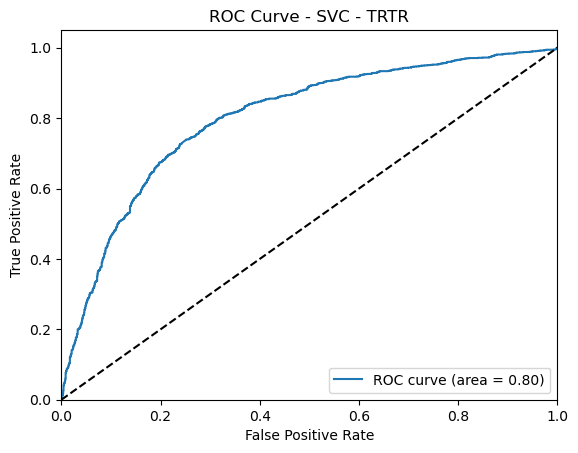

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for SVC:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1403
           1       0.50      1.00      0.67      1397

    accuracy                           0.50      2800
   macro avg       0.25      0.50      0.33      2800
weighted avg       0.25      0.50      0.33      2800



C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


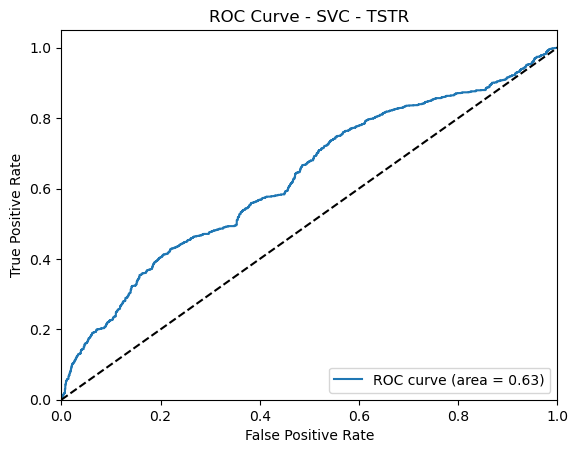


MLPClassifier Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for MLPClassifier:
              precision    recall  f1-score   support

           0       0.73      0.77      0.75      1403
           1       0.76      0.72      0.74      1397

    accuracy                           0.75      2800
   macro avg       0.75      0.75      0.75      2800
weighted avg       0.75      0.75      0.75      2800



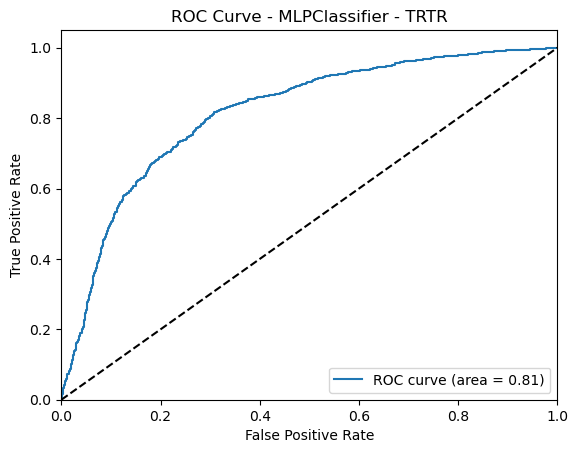

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for MLPClassifier:
              precision    recall  f1-score   support

           0       0.65      0.65      0.65      1403
           1       0.65      0.64      0.64      1397

    accuracy                           0.65      2800
   macro avg       0.65      0.65      0.65      2800
weighted avg       0.65      0.65      0.65      2800



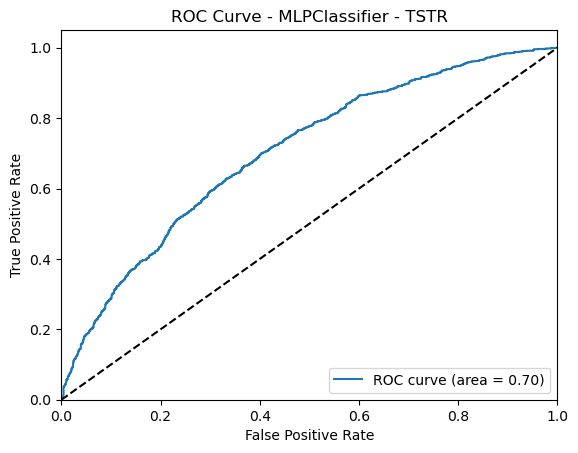


K-Nearest Neighbors Results:
TRTR - on 80% Original Cardio/Tested on 20% Control Data for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.67      0.68      0.68      1403
           1       0.67      0.66      0.67      1397

    accuracy                           0.67      2800
   macro avg       0.67      0.67      0.67      2800
weighted avg       0.67      0.67      0.67      2800



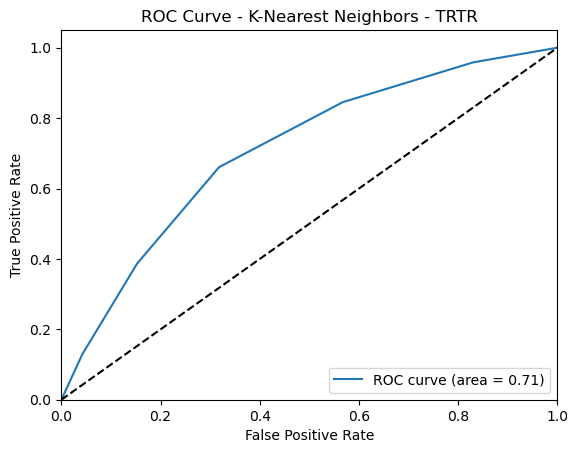

TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1403
           1       0.50      1.00      0.67      1397

    accuracy                           0.50      2800
   macro avg       0.25      0.50      0.33      2800
weighted avg       0.25      0.50      0.33      2800



C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ede\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1509: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


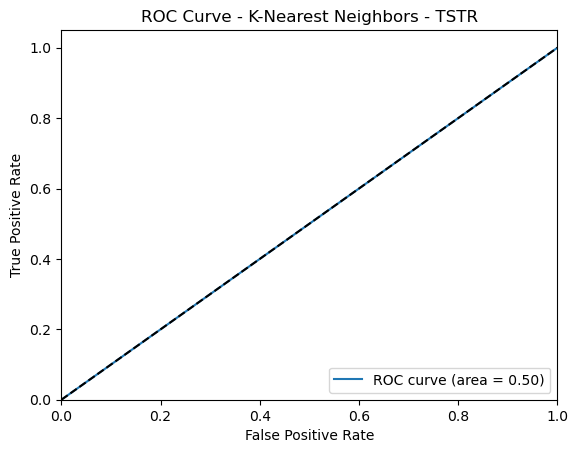


XGBClassifier Results:


ValueError: DataFrame.dtypes for data must be int, float, bool or category. When categorical type is supplied, The experimental DMatrix parameter`enable_categorical` must be set to `True`.  Invalid columns:gender: category, cholesterol: category, gluc: category, smoke: category, alco: category, active: category

In [87]:
from sklearn.metrics import classification_report, roc_auc_score, roc_curve, auc
from sklearn.preprocessing import label_binarize
from scipy import interp
from itertools import cycle
import numpy as np
import matplotlib.pyplot as plt

# Assuming the classes are represented as integers starting from 0
def plot_binary_roc_curve(y_true, y_score, title):
    # Compute ROC curve and ROC area
    fpr, tpr, _ = roc_curve(y_true, y_score)
    roc_auc = auc(fpr, tpr)

    plt.figure()
    plt.plot(fpr, tpr, label=f'ROC curve (area = {roc_auc:.2f})')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title(f'ROC Curve - {title}')
    plt.legend(loc="lower right")
    plt.show()

# Define classifiers
classifiers = {
    "Random Forest": RandomForestClassifier(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "SVC": SVC(probability=True),
    "MLPClassifier": MLPClassifier(max_iter=1000),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "XGBClassifier": XGBClassifier(),
    "ADA Boost": AdaBoostClassifier()
}

for name, clf in classifiers.items():
    print(f"\n{name} Results:")

    # Train on real, test on real
    clf.fit(X_train_orig, y_train_orig)
    y_pred_proba_trtr = clf.predict_proba(X_test_cont)[:, 1]  # Use probabilities of the positive class
    print(f"TRTR - on 80% Original Cardio/Tested on 20% Control Data for {name}:")
    print(classification_report(y_test_cont, clf.predict(X_test_cont)))
    plot_binary_roc_curve(y_test_cont, y_pred_proba_trtr, f"{name} - TRTR")

    # Train on synthetic, test on real
    clf.fit(X_train_syn_vae, y_train_syn_vae)
    y_pred_proba_tstr = clf.predict_proba(X_test_cont)[:, 1]
    print(f"TSTR - on 80% VAE SyntheticCardio/Tested on 20% Control Data for {name}:")
    print(classification_report(y_test_cont, clf.predict(X_test_cont)))
    plot_binary_roc_curve(y_test_cont, y_pred_proba_tstr, f"{name} - TSTR")


# CORRELATION MATRIX FOR ORIGINAL AND VAE SYNTHETIC CARDIOVASCULAR DISEASE

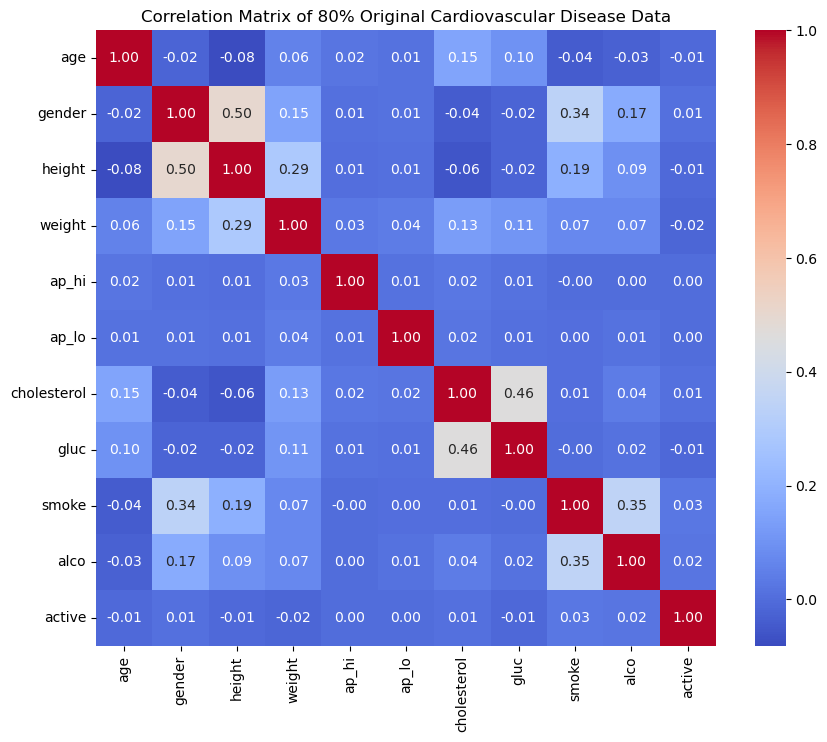

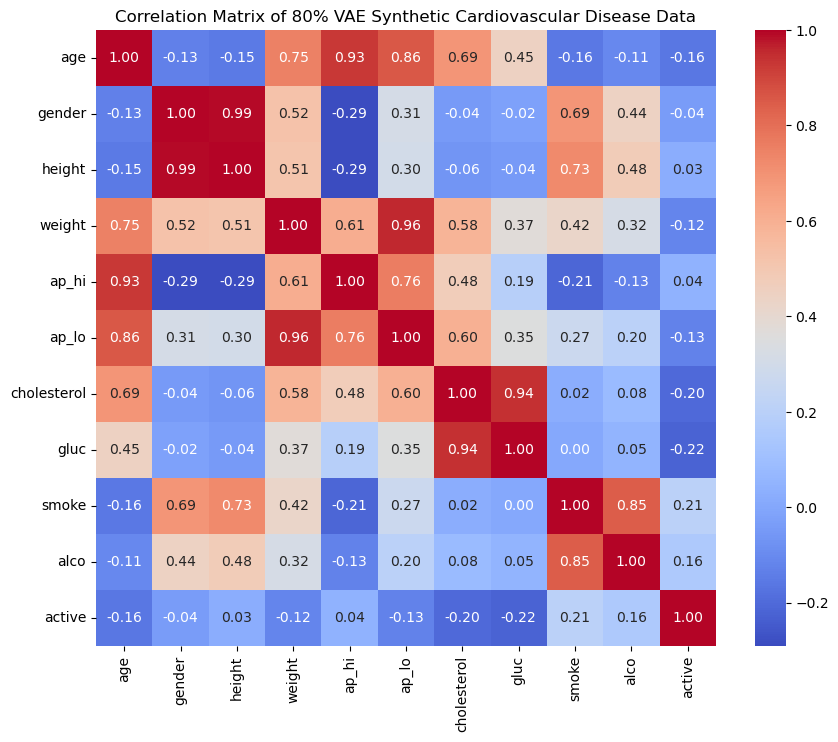

In [129]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

columns = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']

def plot_correlation_matrix(data, title):
    # Calculate the correlation matrix
    corr_matrix = data.corr()

    # Plot the heatmap
    plt.figure(figsize=(10, 8))
    sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title(title)
    plt.show()

    
    
# Assuming 'columns' is a list of column names for your original dataset
X_train_orig_df = pd.DataFrame(X_train_orig_scaled, columns=columns)

# Plot correlation matrix for original data
plot_correlation_matrix(X_train_orig_df, "Correlation Matrix of 80% Original Cardiovascular Disease Data")

# Plot correlation matrix for synthetic data   ae_synthetic_data_df
plot_correlation_matrix(vae_synthetic_data_df, "Correlation Matrix of 80% VAE Synthetic Cardiovascular Disease Data")


# Computing Numerical Correlation Matrices of Original and Synthetic Datasets

In [144]:
# For the original dataset
print('80% Original Cardiovascular Disease Numerical Correlation Matrix:')
print(X_train_orig_df.corr())

# For the AE synthetic dataset
print('80% VAE-Synthetic Cardiovascular Disease Numerical Correlation Matrix:')
print(vae_synthetic_data_df.corr())

80% Original Cardiovascular Disease Numerical Correlation Matrix:
                  age    gender    height    weight     ap_hi     ap_lo  \
age          1.000000 -0.020278 -0.081830  0.056823  0.021680  0.014829   
gender      -0.020278  1.000000  0.499212  0.149952  0.009822  0.013883   
height      -0.081830  0.499212  1.000000  0.288823  0.006378  0.008180   
weight       0.056823  0.149952  0.288823  1.000000  0.031023  0.039502   
ap_hi        0.021680  0.009822  0.006378  0.031023  1.000000  0.014467   
ap_lo        0.014829  0.013883  0.008180  0.039502  0.014467  1.000000   
cholesterol  0.152158 -0.040235 -0.056692  0.133434  0.024208  0.022338   
gluc         0.098642 -0.020276 -0.019545  0.105221  0.012083  0.010565   
smoke       -0.039929  0.339518  0.188967  0.070610 -0.000748  0.003986   
alco        -0.027936  0.174355  0.093014  0.071846  0.001241  0.011548   
active      -0.009441  0.008349 -0.009704 -0.018160  0.001909  0.002647   

             cholesterol      glu

# BAR GRAPH AND SCATTER PLOTS FOR RESULTS FROM CORRELATION MATRIX

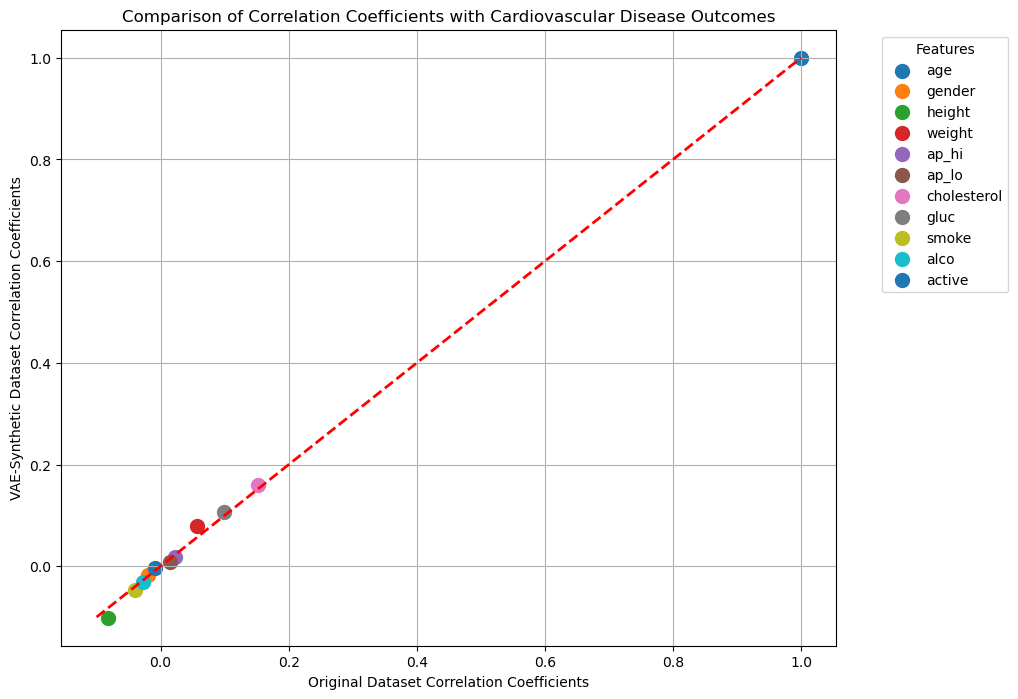

In [146]:
import matplotlib.pyplot as plt

# Data for plotting
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
orig_corrs = [1.000000, -0.020278, -0.081830, 0.056823, 0.021680, 0.014829, 0.152158, 0.098642, -0.039929, -0.027936, -0.009441]
synth_corrs = [1.000000, -0.017644, -0.101292, 0.078357, 0.018710, 0.008929, 0.158945, 0.106886, -0.047740, -0.030279, -0.003264]

# Plotting scatter plot for comparison of correlation coefficients
plt.figure(figsize=(10, 8))
for i, feature in enumerate(features):
    plt.scatter(orig_corrs[i], synth_corrs[i], label=f'{feature}', s=100)

# Plotting a line for perfect agreement
plt.plot([-0.1, 1.0], [-0.1, 1.0], 'r--', lw=2)

plt.title('Comparison of Correlation Coefficients with Cardiovascular Disease Outcomes')
plt.xlabel('Original Dataset Correlation Coefficients')
plt.ylabel('VAE-Synthetic Dataset Correlation Coefficients')
plt.legend(title="Features", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()


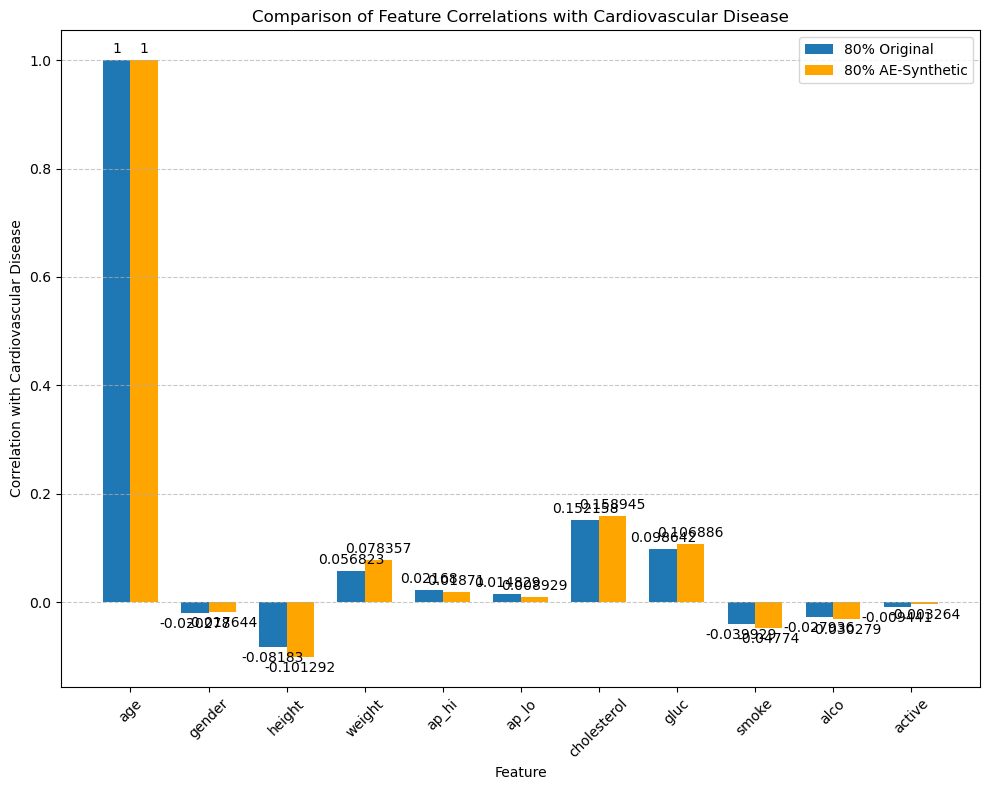

In [149]:
import matplotlib.pyplot as plt
import numpy as np

# Example features to compare
features = ['age', 'gender', 'height', 'weight', 'ap_hi', 'ap_lo', 'cholesterol', 'gluc', 'smoke', 'alco', 'active']
# Original data correlations
orig_corrs = [1.00, -0.020278, -0.081830, 0.056823, 0.021680, 0.014829, 0.152158, 0.098642, -0.039929, -0.027936, -0.009441]
# Synthetic data correlations
synth_corrs = [1.00, -0.017644, -0.101292, 0.078357, 0.018710, 0.008929, 0.158945, 0.106886, -0.047740, -0.030279, -0.003264]

x = np.arange(len(features))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots(figsize=(10, 8))
rects1 = ax.bar(x - width/2, orig_corrs, width, label='80% Original')
rects2 = ax.bar(x + width/2, synth_corrs, width, label='80% AE-Synthetic', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Feature')
ax.set_ylabel('Correlation with Cardiovascular Disease')
ax.set_title('Comparison of Feature Correlations with Cardiovascular Disease')
ax.set_xticks(x)
ax.set_xticklabels(features)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.xticks(rotation=45)
plt.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# INSTALL THE PRIVACY ASSESSMENT TOOL KITS KNOWN AS ANONYMETER AS MENTIONED ABOVE IN STEP 2

In [ ]:
!pip install anonymeter

# IMPORTING THE INSTALLED ANONYMETER'S PRIVACY RISK EVALUATORS FOR PRIVACY PRESERVATION ASSESSMENT ON THE GENERATED SYNTHETIC DATASET
For more detailed information on the usage of this tool do visit the author's website(blogger) via the links below.

https://www.anonos.com/blog/presenting-anonymeter-the-tool-for-assessing-privacy-risks-in-synthetic-datasets

https://github.com/statice/anonymeter

In [183]:
import pandas as pd
from anonymeter.evaluators import SinglingOutEvaluator, LinkabilityEvaluator, InferenceEvaluator

In [182]:
# Convert float32 columns to float64 in the synthetic dataset
float_cols = ['age', 'height', 'weight', 'ap_hi', 'ap_lo']
vae_synthetic_cardio_data_labels_df_newest[float_cols] =vae_synthetic_cardio_data_labels_df_newest[float_cols].astype('float64')

# Convert categorical columns back to category in the synthetic dataset
category_cols = ['gender', 'cholesterol', 'gluc', 'smoke', 'alco', 'active', 'cardio']
for col in category_cols:
    # It's important to ensure the category mappings are consistent across datasets
    vae_synthetic_cardio_data_labels_df_newest[col] = vae_synthetic_cardio_data_labels_df_newest[col].astype('category')

# Now, check the info again to ensure the conversion is successful
vae_synthetic_cardio_data_labels_df_newest.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56000 entries, 0 to 55999
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   age          56000 non-null  float64 
 1   gender       56000 non-null  category
 2   height       56000 non-null  float64 
 3   weight       56000 non-null  float64 
 4   ap_hi        56000 non-null  float64 
 5   ap_lo        56000 non-null  float64 
 6   cholesterol  56000 non-null  category
 7   gluc         56000 non-null  category
 8   smoke        56000 non-null  category
 9   alco         56000 non-null  category
 10  active       56000 non-null  category
 11  cardio       56000 non-null  category
dtypes: category(7), float64(5)
memory usage: 18.1 MB


# STEP 3A: PRIVACY RISK ASSESSMENT VIA UNIVARIATE MODE ON 80% AE-SYNTHETIC CARDIO DISEASE DATASET

In [58]:
singling_outV = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=1500)

try:
    singling_outV.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_outV.risk()
    print("Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.0018085652115795217))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.001277215360090744. Analysis results cannot be trusted.
  self._sanity_check()


In [59]:
res = singling_outV.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=1500 for AE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of baseline attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of control attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)


In [60]:
singling_outV1 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=500)

try:
    singling_outV1.evaluate(mode='univariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_outV1.risk()
    print("Singling Out Risk Type via Univariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Univariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.005411853750198381))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


In [157]:
res = singling_outV1.results()

print("The Singling Out Risk Type via Univariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Univariate Analysis When n_attacks=500 for AE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

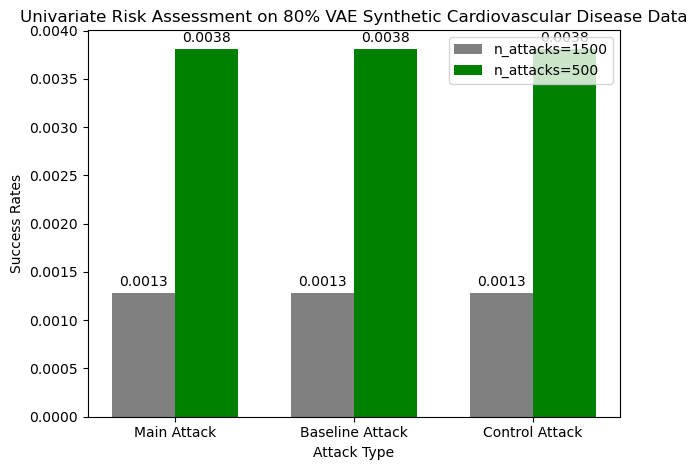

In [165]:
import matplotlib.pyplot as plt

# Data from the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_1500 = [0.001277215, 0.001277215, 0.001277215]
success_rates_500 = [0.003812170, 0.003812170, 0.003812170]

# Bar Chart
fig, ax = plt.subplots()
bar_width = 0.35
index = range(len(attacks))

bar1 = ax.bar(index, success_rates_1500, bar_width, label='n_attacks=1500', color='grey')
bar2 = ax.bar([p + bar_width for p in index], success_rates_500, bar_width, label='n_attacks=500', color='green')

# Success Rates by Attack Type and Number of Attacks
ax.set_xlabel('Attack Type')
ax.set_ylabel('Success Rates')
ax.set_title('Univariate Risk Assessment on 80% VAE Synthetic Cardiovascular Disease Data')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(attacks)
ax.legend()

ax.bar_label(bar1, padding=3, fmt='%.4f')
ax.bar_label(bar2, padding=3, fmt='%.4f')

plt.tight_layout()
plt.show()
# figsize=(10, 6)

Univariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% VAE Synthetic Cardiovascular Disease


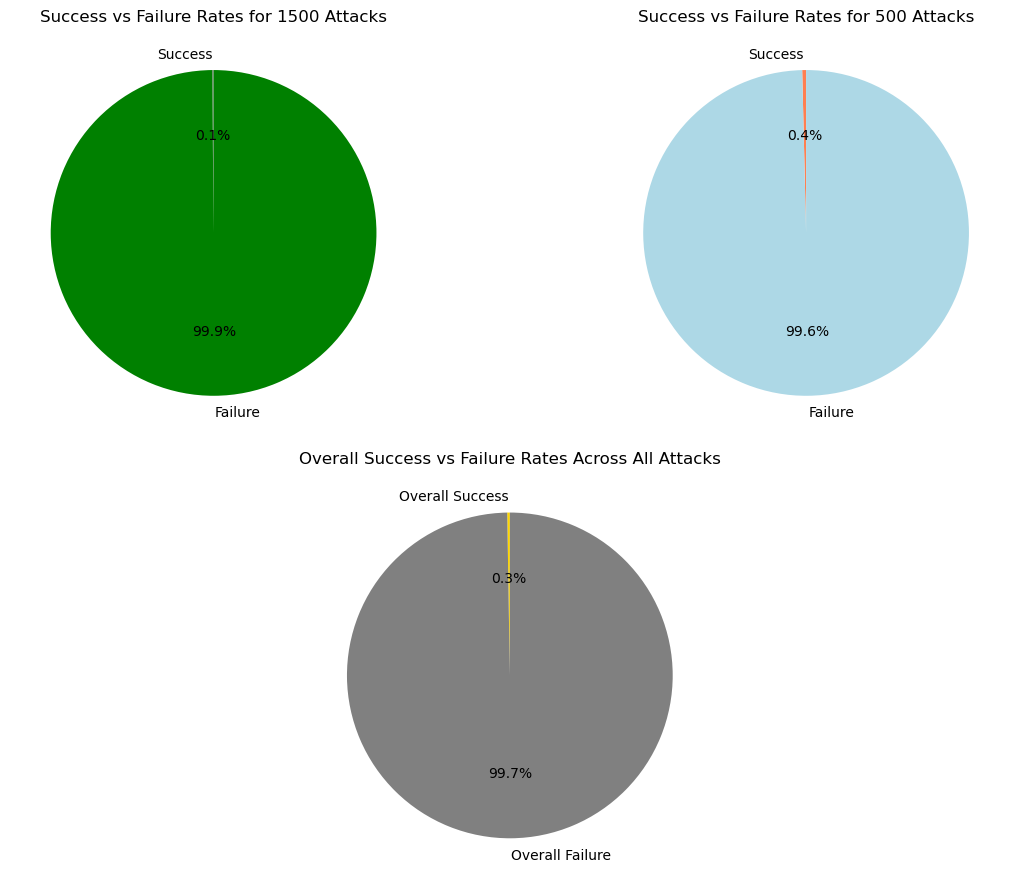

In [170]:
import matplotlib.pyplot as plt

print('Univariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% VAE Synthetic Cardiovascular Disease')

# Data for 1500 attacks
success_rate_1500 = 0.001277215360090744
failure_rate_1500 = 1 - success_rate_1500

# Data for 500 attacks     
success_rate_500 = 0.0038121702307761206
failure_rate_500 = 1 - success_rate_500

# Overall success rate considering all attacks
overall_success_rate = (success_rate_1500 + success_rate_500) / 2
overall_failure_rate = 1 - overall_success_rate

# Custom colors
colors_1500 = ['grey', 'green']  # Custom colors for the 1500 attacks chart
colors_500 = ['coral', 'lightblue']  # Custom colors for the 500 attacks chart
overall_colors = ['gold', 'grey']  # Custom colors for the overall chart

# Pie chart for 1500 attacks
plt.figure(figsize=(12, 9))
plt.subplot(2, 2, 1)
plt.pie([success_rate_1500, failure_rate_1500], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=90, colors=colors_1500)
plt.title('Success vs Failure Rates for 1500 Attacks')

# Pie chart for 500 attacks
plt.subplot(2, 2, 2)
plt.pie([success_rate_500, failure_rate_500], labels=['Success', 'Failure'], autopct='%1.1f%%', startangle=90, colors=colors_500)
plt.title('Success vs Failure Rates for 500 Attacks')

# Overall pie chart
plt.subplot(2, 1, 2)
plt.pie([overall_success_rate, overall_failure_rate], labels=['Overall Success', 'Overall Failure'], autopct='%1.1f%%', startangle=90, colors=overall_colors)
plt.title('Overall Success vs Failure Rates Across All Attacks')

plt.tight_layout()
plt.show()


# STEP 3B: PRIVACY RISK ASSESSMENT VIA MULTIVARIATE MODE ON 80% VAE-SYNTHETIC CARDIO DISEASE DATASET

In [61]:
singling_outV2 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=1500)

try:
    singling_outV2.evaluate(mode='multivariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_outV2.risk()
    print("Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.0018085652115795217))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.001277215360090744, baseline = 0.001277215360090744. Analysis results cannot be trusted.
  self._sanity_check()


In [62]:
res = singling_outV2.results()

print("The Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Multivariate Analysis When n_attacks=1500 for VAE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of baseline attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)
Successs rate of control attack: SuccessRate(value=0.001277215360090744, error=0.001277215360090744)


In [63]:
singling_outV3 = SinglingOutEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df, 
                                              control=control_cardio_dataframe,
                                              n_attacks=500)

try:
    singling_outV3.evaluate(mode='multivariate')  # For univariate analysis
    # For multivariate analysis, you can change mode to 'multivariate'
    singling_out_risk = singling_outV3.risk()
    print("Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data:", singling_out_risk)
except RuntimeError as ex:
    print(f"Singling out evaluation failed: {ex}")

Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data: PrivacyRisk(value=0.0, ci=(0.0, 0.005411853750198381))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0038121702307761206, baseline = 0.0038121702307761206. Analysis results cannot be trusted.
  self._sanity_check()


In [64]:
res = singling_outV3.results()

print("The Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data:")
print("Successs rate of main attack:", res.attack_rate)
print("Successs rate of baseline attack:", res.baseline_rate)
print("Successs rate of control attack:", res.control_rate)

The Singling Out Risk Type via Multivariate Analysis When n_attacks=500 for VAE Synthetc Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of baseline attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)
Successs rate of control attack: SuccessRate(value=0.0038121702307761206, error=0.00381217023077612)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

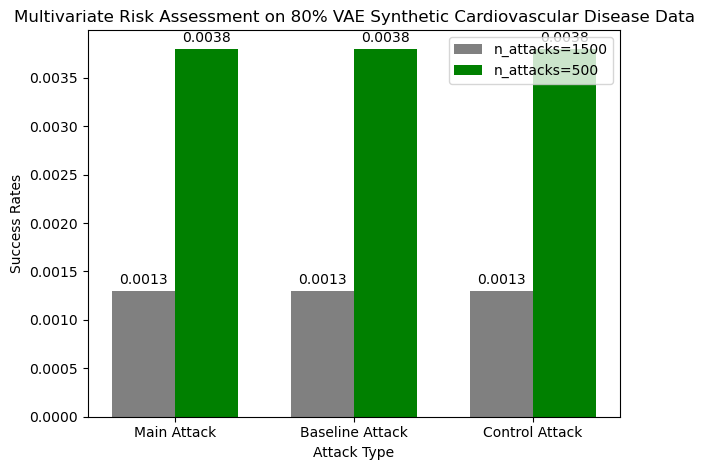

In [174]:
import matplotlib.pyplot as plt

# Data from the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_1500 = [0.0013, 0.0013, 0.0013]
success_rates_500 = [0.0038, 0.0038, 0.0038]

# Pie Chart Data
total_success_1500 = sum(success_rates_1500)
total_failure_1500 = len(success_rates_1500) - total_success_1500
total_success_500 = sum(success_rates_500)
total_failure_500 = len(success_rates_500) - total_success_500

# Bar Chart
fig, ax = plt.subplots() # figsize=(14, 7)
bar_width = 0.35
index = range(len(attacks))

bar1 = ax.bar(index, success_rates_1500, bar_width, label='n_attacks=1500', color='grey')
bar2 = ax.bar([p + bar_width for p in index], success_rates_500, bar_width, label='n_attacks=500', color='green')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_xlabel('Attack Type')
ax.set_ylabel('Success Rates')
ax.set_title('Multivariate Risk Assessment on 80% VAE Synthetic Cardiovascular Disease Data')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(attacks)
ax.legend()

ax.bar_label(bar1, padding=3, fmt='%.4f')
ax.bar_label(bar2, padding=3, fmt='%.4f')

plt.tight_layout()
plt.show()

Multivariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% VAE Synthetic Cardiovascular Disease


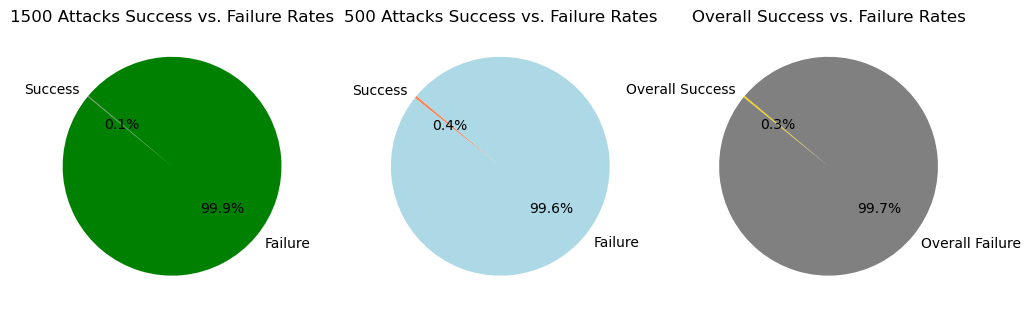

In [173]:
import matplotlib.pyplot as plt

# Data from the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_1500 = [0.0013, 0.0013, 0.0013]
success_rates_500 = [0.0038, 0.0038, 0.0038]

# Pie Chart Data
total_success_1500 = sum(success_rates_1500)
total_failure_1500 = len(success_rates_1500) - total_success_1500
total_success_500 = sum(success_rates_500)
total_failure_500 = len(success_rates_500) - total_success_500

# Defining colors for each pie chart
colors_1500 = ['grey', 'green']  # Custom colors for the 1500 attacks chart
colors_500 = ['coral', 'lightblue']  # Custom colors for the 500 attacks chart
overall_colors = ['gold', 'gray']  # Custom colors for the overall chart

print('Multivariate Risk Assessment Success vs. Failure Rates via 1500 and 500 Attacks on 80% VAE Synthetic Cardiovascular Disease')

# Pie Charts
fig, axs = plt.subplots(1, 3, figsize=(12, 8))

# Pie chart for 1500 attacks
labels = ['Success', 'Failure']
# colors = ['lightblue', 'lightcoral']  # Customizable color variables
axs[0].pie([total_success_1500, total_failure_1500], labels=labels, colors=colors_1500, autopct='%1.1f%%', startangle=140)
axs[0].set_title('1500 Attacks Success vs. Failure Rates')

# Pie chart for 500 attacks
axs[1].pie([total_success_500, total_failure_500], labels=labels, colors=colors_500, autopct='%1.1f%%', startangle=140)
axs[1].set_title('500 Attacks Success vs. Failure Rates')

# Overall success vs failure rates
overall_success = (total_success_1500 + total_success_500) / 2
overall_failure = (total_failure_1500 + total_failure_500) / 2
axs[2].pie([overall_success, overall_failure], labels=['Overall Success', 'Overall Failure'], colors=overall_colors, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Overall Success vs. Failure Rates')

plt.show()


# STEP 4: PRIVACY RISK ASSESSMENT VIA LINKABILITY ON 80% VAE-SYNTHETIC CARDIO DISEASE DATASET

In [184]:
# Dynamically setting n_attacks based on the smallest dataset size
# Assuming you have similar datasets for original and control in the context of cardiovascular data
min_dataset_size = min(len(cardiovascular_train_dataframe), len(vae_synthetic_cardio_data_labels_df_newest), len(control_cardio_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

# Choosing appropriate columns based on your ae_synthetic_cardio_data_labels_df information
aux_cols = [
    ['gender', 'smoke'],  # Attributes in dataset A
    ['age', 'cholesterol']  # Attributes in dataset B
]

linkability_evalat = LinkabilityEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df_newest, 
                                              control=control_cardio_dataframe,
                                              n_attacks=n_attacks,
                                              aux_cols=aux_cols,
                                              n_neighbors=10)

linkability_evalat.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk1 = linkability_evalat.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for VAE Synthetic Cardiovascular Data:", linkability_risk1)


Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for VAE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0003572980079479614, ci=(0.0, 0.0010274981222231036))


In [185]:
link = linkability_evalat.results()

print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for VAE Synthetic Cardiovascular Data:", linkability_risk1)
print("Successs rate of main attack:", link.attack_rate)
print("Successs rate of baseline attack:", link.baseline_rate)
print("Successs rate of control attack:", link.control_rate)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 10 for VAE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0003572980079479614, ci=(0.0, 0.0010274981222231036))
Successs rate of main attack: SuccessRate(value=0.001065474031123713, error=0.0005227107607886889)
Successs rate of baseline attack: SuccessRate(value=0.0008512470985479826, error=0.00046320351640078035)
Successs rate of control attack: SuccessRate(value=0.0007084291434974956, error=0.0004188446146737431)


In [186]:
# Dynamically setting n_attacks based on the smallest dataset size
# Assuming you have similar datasets for original and control in the context of cardiovascular data
min_dataset_size = min(len(cardiovascular_train_dataframe), len(vae_synthetic_cardio_data_labels_df_newest), len(control_cardio_dataframe))
n_attacks = min_dataset_size  # Or some fraction of the smallest size, if desired

# Choosing appropriate columns based on your ae_synthetic_cardio_data_labels_df information
aux_cols = [
    ['gender', 'smoke'],  # Attributes in dataset A
    ['age', 'cholesterol']  # Attributes in dataset B
]

linkability_evalat2 = LinkabilityEvaluator(ori=cardiovascular_train_dataframe, 
                                              syn=vae_synthetic_cardio_data_labels_df_newest, 
                                              control=control_cardio_dataframe,
                                              n_attacks=n_attacks,
                                              aux_cols=aux_cols,
                                              n_neighbors=5)

linkability_evalat2.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
linkability_risk1 = linkability_evalat2.risk()
print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for VAE Synthetic Cardiovascular Data:", linkability_risk1)


Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for VAE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0001428681566714067, ci=(0.0, 0.0005837755734187511))


C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0004942022109217651, baseline = 0.0005656111884470086. Analysis results cannot be trusted.
  self._sanity_check()


In [188]:
link = linkability_evalat2.results()

print("Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for VAE Synthetic Cardiovascular Data:", linkability_risk1)
print("Successs rate of main attack:", link.attack_rate)
print("Successs rate of baseline attack:", link.baseline_rate)
print("Successs rate of control attack:", link.control_rate)

Linkability Risk When the n_attacks = the smallest size of dataset and n_neighbors = 5 for VAE Synthetic Cardiovascular Data: PrivacyRisk(value=0.0001428681566714067, ci=(0.0, 0.0005837755734187511))
Successs rate of main attack: SuccessRate(value=0.0004942022109217651, error=0.0003416427871108698)
Successs rate of baseline attack: SuccessRate(value=0.0005656111884470086, error=0.0003691787255944275)
Successs rate of control attack: SuccessRate(value=0.00035138425587127805, error=0.00027850515975109665)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

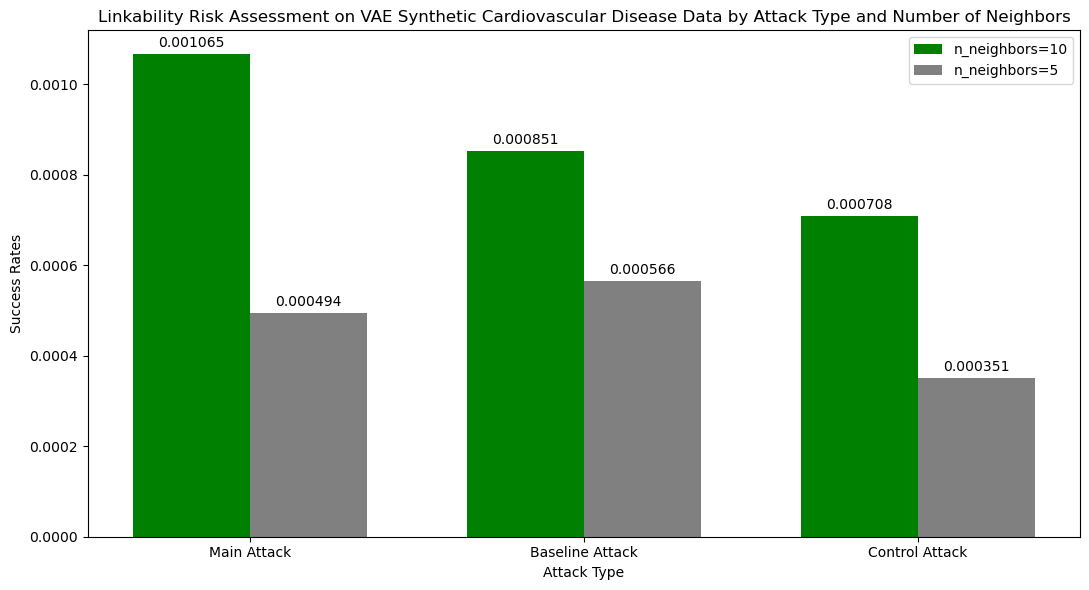

In [195]:
import matplotlib.pyplot as plt

# Corrected data for the attacks
attacks = ["Main Attack", "Baseline Attack", "Control Attack"]
success_rates_10_neighbors = [0.001065474031123713, 0.0008512470985479826, 0.0007084291434974956]
success_rates_5_neighbors = [0.0004942022109217651, 0.0005656111884470086, 0.00035138425587127805]

# Bar Chart
fig, ax = plt.subplots(figsize=(11, 6))
bar_width = 0.35
index = range(len(attacks))

bar1 = ax.bar(index, success_rates_10_neighbors, bar_width, label='n_neighbors=10', color='green')
bar2 = ax.bar([p + bar_width for p in index], success_rates_5_neighbors, bar_width, label='n_neighbors=5', color='grey')

# Success Rates by Attack Type and Number of Attacks
ax.set_xlabel('Attack Type')
ax.set_ylabel('Success Rates')
ax.set_title('Linkability Risk Assessment on VAE Synthetic Cardiovascular Disease Data by Attack Type and Number of Neighbors')
ax.set_xticks([p + bar_width/2 for p in index])
ax.set_xticklabels(attacks)
ax.legend()

ax.bar_label(bar1, padding=3, fmt='%.6f')
ax.bar_label(bar2, padding=3, fmt='%.6f')

plt.tight_layout()
plt.show()


The updated bar graph above visually compares the success rates of different attack types under two settings of nearest neighbors (10 and 5) in the context of linkability risk assessment on VAE Synthetic Cardiovascular Data. The graph highlights:


Main Attack: Shows a slight increase in success rate when the number of neighbors is higher, suggesting that the model may be more susceptible to revealing links when more data points are considered.


Baseline Attack: This type generally exhibits lower success rates, but interestingly, it's higher with fewer neighbors, suggesting that the baseline method might be catching specific patterns not as effectively obscured by the synthetic process.


Control Attack: The success rate decreases with fewer neighbors, which may indicate that the control setup, typically designed to mimic random guessing, finds it more challenging to accurately predict links in a more constrained environment.


Each bar is annotated with the exact success rate, providing a clear numeric understanding of the attack effectiveness. This graph is essential for evaluating the synthetic dataset's robustness against linkability attacks and understanding how variations in the evaluation parameters impact privacy risks.

Linkability Risk Assessment Success/Overall Success vs. Failure Rates via 10 and 5 Neighbors on 80% VAE Synthetic Cardiovascular Disease


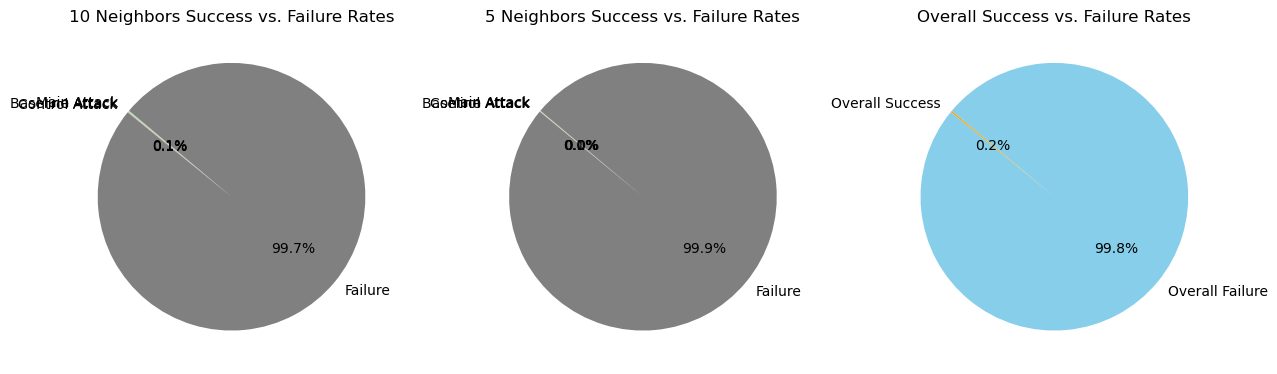

In [10]:
import matplotlib.pyplot as plt

print('Linkability Risk Assessment Success/Overall Success vs. Failure Rates via 10 and 5 Neighbors on 80% VAE Synthetic Cardiovascular Disease')

# Success rates for 10 neighbors recalculated to ensure totals to 1
success_rates_10_neighbors = {
    'Main Attack': 0.001065474031123713,
    'Baseline Attack': 0.0008512470985479826,
    'Control Attack': 0.0007084291434974956,
    'Failure': 0.9973748497268308  # corrected failure rate
}

# Success rates for 5 neighbors recalculated to ensure totals to 1
success_rates_5_neighbors = {
    'Main Attack': 0.0004942022109217651,
    'Baseline Attack': 0.0005656111884470086,
    'Control Attack': 0.00035138425587127805,
    'Failure': 0.998588802344761  # corrected failure rate
}

# Overall success vs. failure rates correctly computed
overall_success_rate = (0.001065474031123713 + 0.0008512470985479826 + 0.0007084291434974956 +
                        0.0004942022109217651 + 0.0005656111884470086 + 0.00035138425587127805) / 2
overall_failure_rate = 1 - overall_success_rate


# Colors for pie charts
colors_10 = ['lightblue', 'lightgreen', 'salmon', 'grey']
colors_5 = ['blue', 'green', 'red', 'grey']
colors_overall = ['orange', 'skyblue']


# Plotting all three pie charts side-by-side
fig, axs = plt.subplots(1, 3, figsize=(13, 6))

# Pie chart for 10 neighbors
axs[0].pie(success_rates_10_neighbors.values(), labels=success_rates_10_neighbors.keys(), colors=colors_10, autopct='%1.1f%%', startangle=140)
axs[0].set_title('10 Neighbors Success vs. Failure Rates')

# Pie chart for 5 neighbors
axs[1].pie(success_rates_5_neighbors.values(), labels=success_rates_5_neighbors.keys(), colors=colors_10, autopct='%1.1f%%', startangle=140)
axs[1].set_title('5 Neighbors Success vs. Failure Rates')

# Pie chart for overall success vs. failure
axs[2].pie([overall_success_rate, overall_failure_rate], labels=['Overall Success', 'Overall Failure'], colors=colors_overall, autopct='%1.1f%%', startangle=140)
axs[2].set_title('Overall Success vs. Failure Rates')

plt.tight_layout()
plt.show()


# STEP 5: PRIVACY RISK ASSESSMENT VIA INFERENCE PER-COLUMN ON 80% VAE-SYNTHETIC CARDIO DISEASE DATASET

C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.2769897631886646, baseline = 0.5039989027414137. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0001371573232955476, baseline = 0.0001371573232955476. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.0001371573232955476, baseline = 0.0001371573232955476. Analysis results cannot be trusted.
  self._sanity_check()
C:\Users\Ede\anaconda3\lib\site-packages\anonymeter\stats\confidence.py:218: UserWarning: Attack is as good or worse as baseline model. Estimated rates: attack = 0.00013715

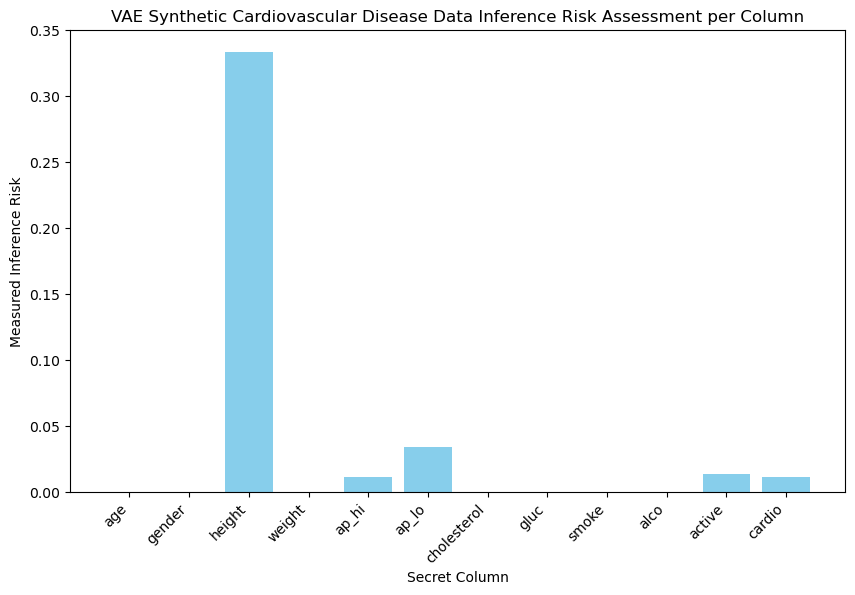

In [197]:
# Dynamically setting n_attacks based on the smallest dataset size
min_dataset_size = min(len(cardiovascular_train_dataframe), len(vae_synthetic_cardio_data_labels_df_newest), len(control_cardio_dataframe))
n_attacks_attempted = min_dataset_size  # Or some fraction of the smallest size, if desired 


columns = cardiovascular_train_dataframe.columns
inference_results = []

for secret in columns:
    aux_cols = [col for col in columns if col != secret]
    
    evaluator_inferensing = InferenceEvaluator(ori=cardiovascular_train_dataframe, 
                                   syn=vae_synthetic_cardio_data_labels_df_newest, 
                                   control=control_cardio_dataframe,
                                   aux_cols=aux_cols,
                                   secret=secret,
                                   n_attacks=n_attacks_attempted) # Use the dynamically set value
    evaluator_inferensing.evaluate(n_jobs=-1)  # Adjust 'n_jobs' as needed
    inference_results.append((secret,  evaluator_inferensing.risk()))

# Plotting the inference risks
import matplotlib.pyplot as plt

risks = [res[1].value for res in inference_results]
columns = [res[0] for res in inference_results]

plt.figure(figsize=(10, 6))
plt.bar(columns, risks, color='skyblue')
plt.xlabel('Secret Column')
plt.ylabel('Measured Inference Risk')
plt.xticks(rotation=45, ha='right')
plt.title('VAE Synthetic Cardiovascular Disease Data Inference Risk Assessment per Column')
plt.show()

In [198]:
print('Inference Risk Assessment on VAE Synthetic Cardiovascular Data when n_attempted_attacks = smallest dataset size used:', inference_results)

Inference Risk Assessment on VAE Synthetic Cardiovascular Data when n_attempted_attacks = smallest dataset size used: [('age', PrivacyRisk(value=0.0, ci=(0.0, 0.017709492870449015))), ('gender', PrivacyRisk(value=0.0, ci=(0.0, 0.015049479171211123))), ('height', PrivacyRisk(value=0.33357817535792833, ci=(0.13650091986458449, 0.5306554308512722))), ('weight', PrivacyRisk(value=0.0, ci=(0.0, 0.018218703094100085))), ('ap_hi', PrivacyRisk(value=0.01152015163616258, ci=(0.0, 0.02570054237369145))), ('ap_lo', PrivacyRisk(value=0.03425456589777431, ci=(0.0, 0.1089386986884259))), ('cholesterol', PrivacyRisk(value=0.0, ci=(0.0, 0.00019399635480410872))), ('gluc', PrivacyRisk(value=0.0, ci=(0.0, 0.00019399635480410872))), ('smoke', PrivacyRisk(value=0.0, ci=(0.0, 0.0303724004457995))), ('alco', PrivacyRisk(value=0.0, ci=(0.0, 0.00019399635480410872))), ('active', PrivacyRisk(value=0.013315214706804463, ci=(0.002894642789285891, 0.023735786624323033))), ('cardio', PrivacyRisk(value=0.0116073071

In [199]:
tellM = evaluator_inferensing.results()

print("Inference Risk When n_attacks_attempted = min_dataset_size for VAE Synthetic Cardiovascular Data:")
print("Successs rate of main attack:", tellM.attack_rate)
print("Successs rate of baseline attack:", tellM.baseline_rate)
print("Successs rate of control attack:", tellM.control_rate)

Inference Risk When n_attacks_attempted = min_dataset_size for VAE Synthetic Cardiovascular Data:
Successs rate of main attack: SuccessRate(value=0.6047569700295322, error=0.008097376146900075)
Successs rate of baseline attack: SuccessRate(value=0.5047129925166661, error=0.008280855439933114)
Successs rate of control attack: SuccessRate(value=0.6001153864903914, error=0.008113471923844963)


# GRAPHICAL REPRESENTATIONS OF THE ABOVE PRIVACY RISK NUMERICAL RESULTS

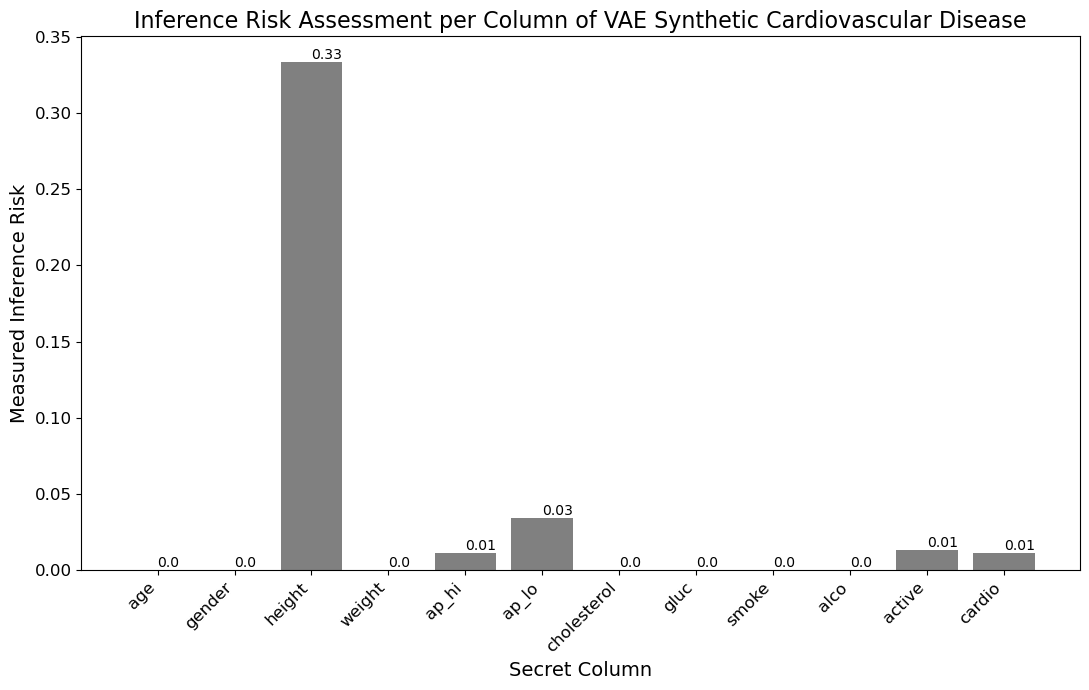

In [201]:
import matplotlib.pyplot as plt

# Extracting risk values and columns for plotting
risks = [res[1].value for res in inference_results]
columns = [res[0] for res in inference_results]

plt.figure(figsize=(11, 7))
bars = plt.bar(columns, risks, color='grey')

plt.xlabel('Secret Column', fontsize=14)
plt.ylabel('Measured Inference Risk', fontsize=14)
plt.xticks(rotation=45, ha='right', fontsize=12)
plt.yticks(fontsize=12)
plt.title('Inference Risk Assessment per Column of VAE Synthetic Cardiovascular Disease', fontsize=16)

# Adding the risk value above each bar for clarity
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2.0, yval, round(yval,2), va='bottom') # va: vertical alignment

plt.tight_layout()
plt.show()


Inference Risk Assessment Success vs. Failure Rates for Different Attacks on 80% VAE Synthetic Cardiovascular Disease


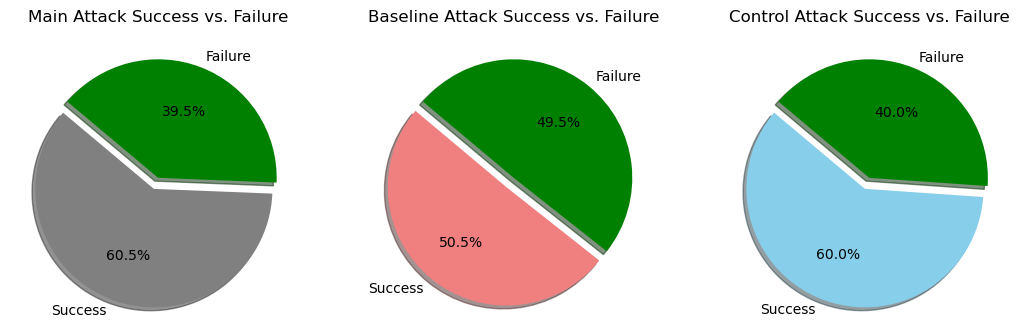

In [215]:
import matplotlib.pyplot as plt

print('Inference Risk Assessment Success vs. Failure Rates for Different Attacks on 80% VAE Synthetic Cardiovascular Disease')

# Success rates and failure for each attack based on provided data
attacks_data = {
    'Main Attack': 0.6048,
    'Baseline Attack': 0.5047,
    'Control Attack': 0.6001,
}

# Adding failure rates by calculating the complement to 1 for each
failure_rates = {key: 1 - value for key, value in attacks_data.items()}

# Colors for the pie chart
colors = ['grey', 'lightcoral', 'skyblue']

# Exploding the 1st slice (i.e. 'Overall Success')
explode = (0.1, 0) 

# Create pie charts for each type of attack
fig, axs = plt.subplots(1, 3, figsize=(13, 8))

for i, (key, value) in enumerate(attacks_data.items()):
    axs[i].pie([value, failure_rates[key]], labels=['Success', 'Failure'], explode=explode, colors=[colors[i], 'green'], autopct='%1.1f%%', shadow=True, startangle=140)
    axs[i].set_title(f'{key} Success vs. Failure')

plt.show()


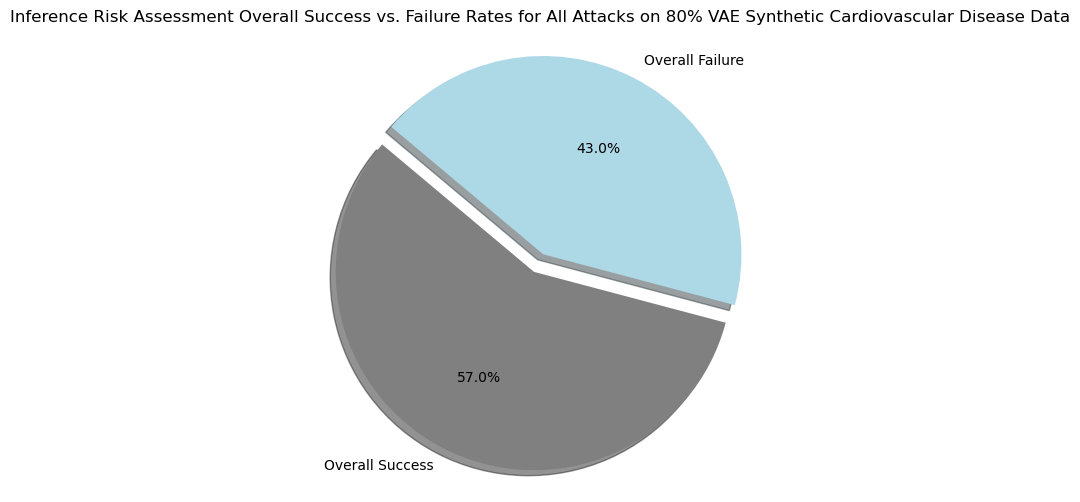

In [216]:
# Success rates for main, baseline, and control attacks
success_rate_main = 0.6047569700295322
success_rate_baseline = 0.5047129925166661
success_rate_control = 0.6001153864903914

# Calculating overall success vs. failure rates for all attack types combined
total_success = success_rate_main + success_rate_baseline + success_rate_control
total_attacks = 3  # Since each attack rate is calculated out of 1
overall_success_rate = total_success / total_attacks
overall_failure_rate = 1 - overall_success_rate

# Labels for the pie chart
labels = ['Overall Success', 'Overall Failure']

# Values for each section of the pie chart
sizes = [overall_success_rate, overall_failure_rate]

# Colors for each section
colors = ['grey', 'lightblue']

# Exploding the 1st slice (i.e. 'Overall Success')
explode = (0.1, 0)  

# Creating the pie chart
plt.figure(figsize=(10, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.

plt.title('Inference Risk Assessment Overall Success vs. Failure Rates for All Attacks on 80% VAE Synthetic Cardiovascular Disease Data')
plt.show()
